# EDA Analysis for Romance Novel Dataset

This notebook provides step-by-step exploratory data analysis for the romance novel dataset.


## 📊 Data Loading and Initial Setup

This section handles the loading of the romance novel dataset and performs initial data exploration to understand the structure and content of our data.

### What this section accomplishes:
- **Dataset Loading**: Loads the core research dataset (23 columns) and complete dataset
- **File Validation**: Checks file availability and creates necessary output directories
- **Initial Structure Analysis**: Examines dataset shape, memory usage, and column information
- **Data Type Classification**: Separates numerical and categorical variables for analysis
- **Basic Statistics**: Provides initial descriptive statistics and data overview

### Key Operations:
- Import required libraries and set up logging
- Load core research dataset with 80,755 books and 23 columns
- Analyze data types and memory usage
- Display basic dataset information and structure


In [ ]:
import pandas as pd
import numpy as np
import logging
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

print(f"=== EDA Analysis Started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ===")
print("="*80)

# Define file paths
core_dataset_path = "/home/polina/Documents/goodreads_romance_research_cursor/romance-novel-nlp-research/organized_outputs/datasets/specialized_versions/core_research_dataset_23_columns.csv"
complete_dataset_path = "/home/polina/Documents/goodreads_romance_research_cursor/romance-novel-nlp-research/organized_outputs/datasets/specialized_versions/complete_dataset_all_columns.csv"
output_dir = "/home/polina/Documents/goodreads_romance_research_cursor/romance-novel-nlp-research/organized_outputs/datasets"

# Check if files exist
print("Checking dataset file availability...")
print(f"Core research dataset (23 columns) exists: {os.path.exists(core_dataset_path)}")
print(f"Complete dataset (all columns) exists: {os.path.exists(complete_dataset_path)}")
print(f"Output directory exists: {os.path.exists(output_dir)}")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output directory: {output_dir}")

print("\n" + "="*60)
print("LOADING CORE RESEARCH DATASET (23 COLUMNS)")
print("="*60)

# Load core research dataset
logger.info("Starting to load core research dataset...")
start_time = datetime.now()

try:
    # First, let's check the size and get column info
    print("Getting dataset info...")
    core_info = pd.read_csv(core_dataset_path, nrows=0)  # Just headers
    print(f"Core dataset columns: {list(core_info.columns)}")
    print(f"Number of columns: {len(core_info.columns)}")
    
    # Load the full dataset
    print("Loading full core dataset...")
    df_core = pd.read_csv(core_dataset_path, low_memory=False)
    
    load_time = datetime.now() - start_time
    print(f"Core dataset loaded successfully in {load_time}")
    print(f"Core dataset shape: {df_core.shape}")
    print(f"Core dataset memory usage: {df_core.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
except Exception as e:
    logger.error(f"Error loading core dataset: {str(e)}")
    raise

print("\n" + "="*60)
print("CORE RESEARCH DATASET STRUCTURE ANALYSIS")
print("="*60)

# Display basic information about the dataset
print("DATASET HEAD (first 5 rows):")
print("-" * 50)
print(df_core.head())

print("\nDATASET INFO:")
print("-" * 50)
print(df_core.info())

print("\nDATASET DESCRIBE (numerical columns only):")
print("-" * 50)
print(df_core.describe())

print("\nDATASET SHAPE AND MEMORY USAGE:")
print("-" * 50)
print(f"Shape: {df_core.shape}")
print(f"Memory usage: {df_core.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nCOLUMN DETAILS:")
print("-" * 50)
print(f"Total columns: {len(df_core.columns)}")
print("Column names and data types:")
for i, (col, dtype) in enumerate(zip(df_core.columns, df_core.dtypes), 1):
    print(f"  {i:2d}. {col:<30} ({dtype})")

print("\n" + "="*60)
print("DATA TYPE ANALYSIS")
print("="*60)

# Analyze data types
print("Data type distribution:")
print("-" * 30)
dtype_counts = df_core.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")

# Separate numerical and categorical columns
numerical_cols = df_core.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_core.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns ({len(numerical_cols)}):")
print("-" * 30)
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i:2d}. {col}")

print(f"\nCategorical columns ({len(categorical_cols)}):")
print("-" * 30)
for i, col in enumerate(categorical_cols, 1):
    print(f"  {i:2d}. {col}")

print("\n" + "="*60)
print("ANALYSIS COMPLETED")
print("="*60)
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*60)


2025-09-19 21:23:17,983 - INFO - Starting to load core research dataset...


=== EDA Analysis Started at 2025-09-19 21:23:17 ===
Checking dataset file availability...
Core research dataset (23 columns) exists: True
Complete dataset (all columns) exists: True
Output directory exists: True

LOADING CORE RESEARCH DATASET (23 COLUMNS)
Getting dataset info...
Core dataset columns: ['work_id', 'book_id_list_en', 'title', 'publication_year', 'num_pages_median', 'description', 'language_codes_en', 'author_id', 'author_name', 'author_average_rating', 'author_ratings_count', 'series_id', 'series_title', 'series_works_count', 'ratings_count_sum', 'text_reviews_count_sum', 'average_rating_weighted_mean', 'popular_shelves', 'genres', 'decade', 'book_length_category', 'rating_category', 'popularity_category']
Number of columns: 23
Loading full core dataset...
Core dataset loaded successfully in 0:00:03.664719
Core dataset shape: (80755, 23)
Core dataset memory usage: 216.08 MB

CORE RESEARCH DATASET STRUCTURE ANALYSIS
DATASET HEAD (first 5 rows):
----------------------------

### 🔍 Dataset Structure and Data Type Analysis

This subsection provides detailed analysis of the dataset structure, including column information, data types, and initial statistics to understand the data characteristics.


## 🧹 Data Cleaning and Standardization

This section performs essential data cleaning operations to prepare the dataset for statistical analysis and ensure data quality and consistency.

### What this section accomplishes:
- **Unique Entity Analysis**: Counts and analyzes unique books, authors, and series
- **Language Standardization**: Converts all language codes to English ('eng') for consistency
- **Data Type Optimization**: Ensures proper data types for numerical and categorical variables
- **Missing Value Assessment**: Identifies and analyzes missing data patterns
- **Data Quality Validation**: Checks for data integrity and consistency issues

### Key Operations:
- **Unique Counts Analysis**: Counting unique books and authors
- **Language Standardization**: Converting all language codes to English ('eng')
- **Data Type Optimization**: Ensuring proper data types for analysis
- **Missing Value Handling**: Identifying and managing missing data
- **Data Validation**: Checking for duplicates and data quality issues


In [ ]:
print("="*60)
print("DATA CLEANING AND STANDARDIZATION")
print("="*60)

# Store original shape for comparison
original_shape = df_core.shape
print(f"Original dataset shape: {original_shape}")

print("\n" + "="*40)
print("UNIQUE COUNTS ANALYSIS")
print("="*40)

# Count unique books and authors
if 'work_id' in df_core.columns:
    unique_books = df_core['work_id'].nunique()
    print(f"Number of unique books (work_id): {unique_books}")
else:
    print("work_id column not found in dataset")

if 'author_id' in df_core.columns:
    unique_authors = df_core['author_id'].nunique()
    print(f"Number of unique authors (author_id): {unique_authors}")
else:
    print("author_id column not found in dataset")

print("\n" + "="*40)
print("LANGUAGE CODES STANDARDIZATION")
print("="*40)

# Standardize language_codes_en column
if 'language_codes_en' in df_core.columns:
    print("Analyzing language_codes_en column...")
    
    # Show unique values before standardization
    unique_languages = df_core['language_codes_en'].unique()
    print(f"Unique language codes found: {unique_languages}")
    print(f"Number of unique language codes: {len(unique_languages)}")
    
    # Count values before standardization
    language_counts = df_core['language_codes_en'].value_counts()
    print(f"\nLanguage code distribution before standardization:")
    for lang, count in language_counts.items():
        print(f"  {lang}: {count} books")
    
    # Standardize all values to 'eng'
    print(f"\nStandardizing all language codes to 'eng'...")
    df_core['language_codes_en'] = 'eng'
    
    # Verify standardization
    unique_after = df_core['language_codes_en'].unique()
    print(f"Language codes after standardization: {unique_after}")
    print(f"All books now have language code: 'eng'")
    
else:
    print("language_codes_en column not found in dataset")

print("\n" + "="*40)
print("SERIES COLUMNS STANDARDIZATION")
print("="*40)

# Handle series columns - fill NaN with 'stand_alone'
series_columns = ['series_id', 'series_title', 'series_works_count']
print("Processing series columns...")

for col in series_columns:
    if col in df_core.columns:
        null_count_before = df_core[col].isnull().sum()
        print(f"  {col}: {null_count_before} NaN values found")
        
        # Fill NaN with 'stand_alone'
        df_core[col] = df_core[col].fillna('stand_alone')
        
        # Verify the change
        null_count_after = df_core[col].isnull().sum()
        stand_alone_count = (df_core[col] == 'stand_alone').sum()
        print(f"    After filling: {null_count_after} NaN values, {stand_alone_count} 'stand_alone' values")
    else:
        print(f"  {col}: Column not found in dataset")

print("\n" + "="*40)
print("FINAL VERIFICATION")
print("="*40)

# Check final shape
final_shape = df_core.shape
print(f"Dataset shape after cleaning: {final_shape}")
print(f"Shape unchanged: {original_shape == final_shape}")

# Verify language standardization
if 'language_codes_en' in df_core.columns:
    final_language_check = df_core['language_codes_en'].value_counts()
    print(f"\nFinal language code distribution:")
    for lang, count in final_language_check.items():
        print(f"  {lang}: {count} books")

# Verify series standardization
print(f"\nFinal series column verification:")
for col in series_columns:
    if col in df_core.columns:
        stand_alone_count = (df_core[col] == 'stand_alone').sum()
        null_count = df_core[col].isnull().sum()
        print(f"  {col}: {stand_alone_count} 'stand_alone', {null_count} NaN")

print("\n" + "="*60)
print("DATA CLEANING COMPLETED")
print("="*60)
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*60)


DATA CLEANING AND STANDARDIZATION
Original dataset shape: (80755, 23)

UNIQUE COUNTS ANALYSIS
Number of unique books (work_id): 80755
Number of unique authors (author_id): 21888

LANGUAGE CODES STANDARDIZATION
Analyzing language_codes_en column...
Unique language codes found: ["['en-GB', 'en-US', 'eng']" "['en-US', 'eng']" "['eng']" "['en-US']"
 "['en-GB', 'eng']" "['en-GB', 'en-US']" "['en-GB']" "['en-CA', 'eng']"
 "['en', 'eng']" "['en-CA', 'en-US', 'eng']" "['en']" "['en', 'en-GB']"
 "['en', 'en-US', 'eng']" "['en-CA', 'en-GB', 'eng']" "['en-CA']"
 "['en-CA', 'en-GB', 'en-US', 'eng']" "['en-CA', 'en-US']"
 "['en', 'en-GB', 'en-US', 'eng']" "['en', 'en-GB', 'eng']"
 "['en-CA', 'en-GB']" "['en', 'en-US']"]
Number of unique language codes: 21

Language code distribution before standardization:
  ['eng']: 59089 books
  ['en-US', 'eng']: 5908 books
  ['en-US']: 4981 books
  ['en-GB', 'eng']: 4247 books
  ['en-GB']: 4234 books
  ['en-CA', 'eng']: 988 books
  ['en-GB', 'en-US', 'eng']: 596

### 🔍 Unique Entity Analysis and Data Standardization

This subsection performs detailed analysis of unique entities in the dataset and standardizes key categorical variables for consistency.

#### What this subsection accomplishes:
- **Unique Entity Counting**: Counts unique books, authors, and series in the dataset
- **Language Standardization**: Converts all language codes to English ('eng') for consistency
- **Series Data Handling**: Standardizes series-related columns by filling missing values
- **Data Quality Assessment**: Validates data integrity and consistency

#### Key Operations:
- Count unique books using `work_id` column
- Count unique authors using `author_id` column  
- Standardize `language_codes_en` column to 'eng'
- Fill missing values in series columns with 'stand_alone'


## 📈 Basic Normality Tests

This section performs initial normality testing using two statistical methods to assess the distribution characteristics of numerical variables in the dataset.

### What this section accomplishes:
- **Distribution Assessment**: Tests whether numerical variables follow normal distributions
- **Statistical Validation**: Uses two complementary normality tests for robust analysis
- **Data Quality Insights**: Identifies variables that may need transformation or special handling
- **Method Selection Guidance**: Informs choice of parametric vs non-parametric statistical methods

### Tests Performed:
- **Jarque-Bera Test**: Tests for normality based on skewness and kurtosis
- **Anderson-Darling Test**: More sensitive to deviations in the tails of the distribution

### Variables Tested:
- Publication Year
- Median Number of Pages  
- Author Average Rating
- Author Ratings Count
- Total Ratings Count
- Total Text Reviews Count
- Average Rating (Weighted Mean)

### Interpretation Guidelines:
- **p-value > 0.05**: Variable is approximately normally distributed
- **p-value ≤ 0.05**: Variable significantly deviates from normality
- **Significance Level**: α = 0.05 used for both tests


In [ ]:
# Install scipy if not available
import subprocess
import sys

print("="*60)
print("INSTALLING REQUIRED PACKAGES")
print("="*60)

try:
    import scipy.stats as stats
    from scipy.stats import jarque_bera, anderson
    print("✓ scipy is already installed")
except ImportError:
    print("Installing scipy...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scipy"])
    print("✓ scipy installed successfully")
    import scipy.stats as stats
    from scipy.stats import jarque_bera, anderson

import pandas as pd
import numpy as np

print("\n" + "="*80)
print("NORMALITY TESTS: JARQUE-BERA AND ANDERSON-DARLING")
print("="*80)

# Define the numerical variables to test
numerical_variables = [
    'publication_year',
    'num_pages_median', 
    'author_average_rating',
    'author_ratings_count',
    'ratings_count_sum',
    'text_reviews_count_sum',
    'average_rating_weighted_mean'
]

print(f"Testing normality for {len(numerical_variables)} variables:")
for i, var in enumerate(numerical_variables, 1):
    print(f"  {i}. {var}")

print("\n" + "="*60)
print("DETAILED NORMALITY TEST RESULTS")
print("="*60)

# Store results for summary table
normality_results = []

for variable in numerical_variables:
    if variable in df_core.columns:
        print(f"\n{variable.upper()}:")
        print("-" * 50)
        
        # Get the data, removing any NaN values
        data = df_core[variable].dropna()
        n = len(data)
        
        print(f"Sample size: {n:,}")
        print(f"Mean: {data.mean():.4f}")
        print(f"Std: {data.std():.4f}")
        print(f"Skewness: {stats.skew(data):.4f}")
        print(f"Kurtosis: {stats.kurtosis(data):.4f}")
        
        # Jarque-Bera Test
        print(f"\nJarque-Bera Test:")
        jb_stat, jb_pvalue = jarque_bera(data)
        print(f"  Statistic: {jb_stat:.6f}")
        print(f"  p-value: {jb_pvalue:.6e}")
        jb_normal = jb_pvalue > 0.05
        print(f"  Result: {'Normal' if jb_normal else 'Not Normal'} (α=0.05)")
        
        # Anderson-Darling Test
        print(f"\nAnderson-Darling Test:")
        ad_result = anderson(data, dist='norm')
        print(f"  Statistic: {ad_result.statistic:.6f}")
        print(f"  Critical values: {ad_result.critical_values}")
        print(f"  Significance levels: {ad_result.significance_level}")
        
        # Check if statistic is less than critical value at 5% significance
        critical_5pct = ad_result.critical_values[2]  # 5% significance level
        ad_normal = ad_result.statistic < critical_5pct
        print(f"  Critical value (5%): {critical_5pct:.6f}")
        print(f"  Result: {'Normal' if ad_normal else 'Not Normal'} (α=0.05)")
        
        # Store results for summary
        normality_results.append({
            'Variable': variable,
            'JB_Normal': jb_normal,
            'AD_Normal': ad_normal,
            'JB_pvalue': jb_pvalue,
            'AD_statistic': ad_result.statistic,
            'Sample_Size': n
        })
        
    else:
        print(f"\n{variable.upper()}:")
        print("-" * 50)
        print(f"  Column not found in dataset")
        
        # Store missing variable
        normality_results.append({
            'Variable': variable,
            'JB_Normal': 'N/A',
            'AD_Normal': 'N/A', 
            'JB_pvalue': 'N/A',
            'AD_statistic': 'N/A',
            'Sample_Size': 'N/A'
        })

print("\n" + "="*80)
print("NORMALITY TEST SUMMARY TABLE")
print("="*80)

# Create summary DataFrame
summary_df = pd.DataFrame(normality_results)

# Create a simplified summary table
print("\nSUMMARY TABLE - NORMALITY ASSESSMENT:")
print("="*60)
print(f"{'Variable':<30} {'Jarque-Bera':<15} {'Anderson-Darling':<18}")
print("-" * 63)

for _, row in summary_df.iterrows():
    variable = row['Variable']
    jb_result = "Normal" if row['JB_Normal'] == True else ("Not Normal" if row['JB_Normal'] == False else "N/A")
    ad_result = "Normal" if row['AD_Normal'] == True else ("Not Normal" if row['AD_Normal'] == False else "N/A")
    
    print(f"{variable:<30} {jb_result:<15} {ad_result:<18}")

print("\n" + "="*60)
print("INTERPRETATION GUIDE")
print("="*60)
print("• Jarque-Bera Test: Tests for normality based on skewness and kurtosis")
print("• Anderson-Darling Test: More sensitive to deviations in the tails")
print("• Both tests: p-value > 0.05 or statistic < critical value = Normal distribution")
print("• α = 0.05 significance level used for both tests")

print("\n" + "="*80)
print("NORMALITY TESTING COMPLETED")
print("="*80)
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)


INSTALLING REQUIRED PACKAGES
✓ scipy is already installed

NORMALITY TESTS: JARQUE-BERA AND ANDERSON-DARLING
Testing normality for 7 variables:
  1. publication_year
  2. num_pages_median
  3. author_average_rating
  4. author_ratings_count
  5. ratings_count_sum
  6. text_reviews_count_sum
  7. average_rating_weighted_mean

DETAILED NORMALITY TEST RESULTS

PUBLICATION_YEAR:
--------------------------------------------------
Sample size: 80,755


Mean: 2012.4935
Std: 3.2718
Skewness: -1.3685
Kurtosis: 2.2222

Jarque-Bera Test:
  Statistic: 41820.668983
  p-value: 0.000000e+00
  Result: Not Normal (α=0.05)

Anderson-Darling Test:
  Statistic: 2469.104761
  Critical values: [0.576 0.656 0.787 0.918 1.092]
  Significance levels: [15.  10.   5.   2.5  1. ]
  Critical value (5%): 0.787000
  Result: Not Normal (α=0.05)

NUM_PAGES_MEDIAN:
--------------------------------------------------
Sample size: 80,755
Mean: 234.8468
Std: 381.8529
Skewness: 127.2250
Kurtosis: 20279.0576

Jarque-Bera Test:
  Statistic: 1383955369776.144531
  p-value: 0.000000e+00
  Result: Not Normal (α=0.05)

Anderson-Darling Test:
  Statistic: 12461.936380
  Critical values: [0.576 0.656 0.787 0.918 1.092]
  Significance levels: [15.  10.   5.   2.5  1. ]
  Critical value (5%): 0.787000
  Result: Not Normal (α=0.05)

AUTHOR_AVERAGE_RATING:
--------------------------------------------------
Sample size: 80,755
Mean: 3.8775
Std: 0.2697
Skewness: -0.5126
Kurtosis:

### 📊 Statistical Test Results and Interpretation

This subsection provides detailed results from the normality tests and interprets their implications for further analysis.

#### 🔬 Normality Test Results
Analysis of distribution characteristics for key numerical variables.

#### 📈 Central Tendency and Variability Analysis  
Examination of mean, median, and standard deviation patterns across variables.

#### 🎯 Statistical Significance Assessment
Evaluation of test results and their implications for data analysis.

#### What this subsection accomplishes:
- **Test Results Summary**: Presents comprehensive results from both normality tests
- **Statistical Interpretation**: Explains the meaning of test statistics and p-values
- **Method Selection Guidance**: Recommends appropriate statistical methods based on results
- **Data Transformation Insights**: Identifies variables that may benefit from transformation


## 📊 Comprehensive Normality Analysis with Interactive Visualizations

This section provides a detailed normality analysis with enhanced visualizations and improved readability for professional presentation and better data exploration.

### What this section accomplishes:
- **Enhanced Visualization**: Creates interactive, professional-quality tables and charts
- **Improved Readability**: Uses descriptive variable names and clear formatting
- **Statistical Rigor**: Applies multiple normality tests for comprehensive assessment
- **Professional Presentation**: Formats results for academic and professional use
- **Data Exploration**: Enables interactive exploration of statistical results

### Features:
- **Interactive Plotly Tables**: Professional, interactive tables for better data exploration
- **Descriptive Variable Names**: Human-readable column names instead of technical variable names
- **Significance Level Indicators**: Clear marking of statistical significance with asterisks (*, **, ***)
- **Scientific Notation**: Large numbers displayed in readable format
- **Separate Sample Size Display**: Sample sizes shown in dedicated section for clarity

### Statistical Tests:
- **Anderson-Darling Test**: Tests normality with emphasis on tail behavior
- **D'Agostino's Normality Test**: Tests based on skewness and kurtosis measures

### Significance Levels:
- `***` p < 0.001 (highly significant)
- `**` p < 0.01 (very significant)  
- `*` p < 0.05 (significant)
- No asterisk: p ≥ 0.05 (not significant)


In [ ]:
# Install plotly if not available
try:
    import plotly.graph_objects as go
    import plotly.figure_factory as ff
    from plotly.offline import iplot
    print("✓ plotly is already installed")
except ImportError:
    print("Installing plotly...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "plotly"])
    print("✓ plotly installed successfully")
    import plotly.graph_objects as go
    import plotly.figure_factory as ff
    from plotly.offline import iplot

import numpy as np
import pandas as pd
import scipy
from scipy.stats import anderson, normaltest

print("="*80)
print("COMPREHENSIVE NORMALITY TEST TABLE - DESCRIPTIVE VARIABLE NAMES")
print("="*80)

# Define the numerical variables to test with their descriptive names
variable_mapping = {
    'publication_year': 'Publication Year',
    'num_pages_median': 'Median Number of Pages',
    'author_average_rating': 'Author Average Rating',
    'author_ratings_count': 'Author Ratings Count',
    'ratings_count_sum': 'Total Ratings Count',
    'text_reviews_count_sum': 'Total Text Reviews Count',
    'average_rating_weighted_mean': 'Average Rating (Weighted Mean)'
}

numerical_variables = list(variable_mapping.keys())
descriptive_names = list(variable_mapping.values())

print(f"Creating comprehensive normality test table for {len(numerical_variables)} variables with descriptive names...")

# Store all results for comprehensive table
all_results = []
sample_sizes = []

for variable, descriptive_name in variable_mapping.items():
    if variable in df_core.columns:
        print(f"Processing {descriptive_name}...")
        
        # Get the data, removing any NaN values
        data = df_core[variable].dropna()
        n = len(data)
        sample_sizes.append((descriptive_name, n))
        
        # Anderson-Darling Test
        ad_result = anderson(data, dist='norm')
        ad_stat = round(ad_result.statistic, 4)
        ad_critical_5pct = ad_result.critical_values[2]  # 5% significance level
        ad_normal = ad_result.statistic < ad_critical_5pct
        
        # D'Agostino's normality test
        dagostino_stat, dagostino_p = normaltest(data)
        alpha = 0.05
        dagostino_normal = dagostino_p > alpha
        
        # Format D'Agostino statistic for readability (use scientific notation for large numbers)
        if dagostino_stat >= 1000:
            dagostino_stat_formatted = f"{dagostino_stat:.2e}"
        else:
            dagostino_stat_formatted = f"{dagostino_stat:.4f}"
        
        # Format significance level with asterisk for significance
        if dagostino_p < 0.001:
            significance_level = "p < 0.001***"
        elif dagostino_p < 0.01:
            significance_level = f"p = {dagostino_p:.3f}**"
        elif dagostino_p < 0.05:
            significance_level = f"p = {dagostino_p:.3f}*"
        else:
            significance_level = f"p = {dagostino_p:.3f}"
        
        # Store results with descriptive name (removed sample size column)
        all_results.append([
            descriptive_name,
            f"{ad_stat:.4f}",
            f"{ad_critical_5pct:.4f}",
            "Normal" if ad_normal else "Not Normal",
            dagostino_stat_formatted,
            significance_level,
            "Normal" if dagostino_normal else "Not Normal"
        ])
        
    else:
        print(f"Column {variable} not found in dataset")
        sample_sizes.append((descriptive_name, "N/A"))
        all_results.append([
            descriptive_name,
            "N/A",
            "N/A", 
            "N/A",
            "N/A",
            "N/A",
            "N/A"
        ])

print(f"✓ Processed {len(all_results)} variables")

# Print sample sizes separately
print("\n" + "="*60)
print("SAMPLE SIZES")
print("="*60)
for descriptive_name, n in sample_sizes:
    if n != "N/A":
        print(f"  {descriptive_name:<35}: {n:,} observations")
    else:
        print(f"  {descriptive_name:<35}: N/A")

# Create comprehensive interactive table with descriptive names
print("\nCreating comprehensive interactive table with descriptive variable names...")

# Prepare data for the table
table_data = [row for row in all_results]

# Create the interactive table (removed Sample Size column)
trace = go.Table(
    header=dict(
        values=['<b>Variable</b>', '<b>AD Statistic</b>', '<b>AD Critical (5%)</b>', 
                '<b>AD Result</b>', '<b>D\'Agostino Statistic</b>', '<b>Significance Level</b>', '<b>D\'Agostino Result</b>'],
        line=dict(width=0),
        fill=dict(color='rgba(42,63,95,0.8)'),
        align='center',
        font=dict(
            color='#ffffff',
            size=12
        )
    ),
    cells=dict(
        values=list(zip(*table_data)),
        line=dict(width=0),
        fill=dict(color=[['#EBF0F8', '#ffffff'] * 4]),  # Alternating colors
        align='center',
        height=40,  # Increased height for better readability
        font=dict(size=11)
    ),
    columnwidth=[0.25, 0.12, 0.12, 0.12, 0.15, 0.12, 0.12]  # Adjusted column widths
)

layout = dict(
    title="<b>Comprehensive Normality Test Results - Descriptive Variable Names</b>",
    height=450,  # Increased height for better display
    margin=dict(
        l=10,
        r=10,
        t=60,
        b=10
    ),
    font=dict(size=12)
)

comprehensive_table = dict(data=[trace], layout=layout)
iplot(comprehensive_table, filename='comprehensive-normality-test-table-descriptive')

print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY")
print("="*80)

# Create summary statistics (adjusted indices since we removed sample size column)
normal_ad_count = sum(1 for row in all_results if row[3] == "Normal")
normal_dagostino_count = sum(1 for row in all_results if row[6] == "Normal")

print(f"Variables tested: {len(all_results)}")
print(f"Variables with Normal distribution (Anderson-Darling): {normal_ad_count}")
print(f"Variables with Normal distribution (D'Agostino): {normal_dagostino_count}")

print("\n" + "="*60)
print("VARIABLE NAME MAPPING")
print("="*60)
for original, descriptive in variable_mapping.items():
    print(f"  {original:<35} → {descriptive}")

print("\n" + "="*60)
print("INTERPRETATION GUIDE")
print("="*60)
print("• Anderson-Darling Test: More sensitive to deviations in the tails")
print("• D'Agostino's Test: Tests for normality based on skewness and kurtosis")
print("• Both tests: p-value > 0.05 or statistic < critical value = Normal distribution")
print("• α = 0.05 significance level used for both tests")
print("• Significance levels: *** p < 0.001, ** p < 0.01, * p < 0.05")

print("\n" + "="*80)
print("COMPREHENSIVE NORMALITY TESTING WITH DESCRIPTIVE NAMES COMPLETED")
print("="*80)
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)


✓ plotly is already installed
COMPREHENSIVE NORMALITY TEST TABLE - DESCRIPTIVE VARIABLE NAMES
Creating comprehensive normality test table for 7 variables with descriptive names...
Processing Publication Year...
Processing Median Number of Pages...
Processing Author Average Rating...
Processing Author Ratings Count...
Processing Total Ratings Count...
Processing Total Text Reviews Count...
Processing Average Rating (Weighted Mean)...
✓ Processed 7 variables

SAMPLE SIZES
  Publication Year                   : 80,755 observations
  Median Number of Pages             : 80,755 observations
  Author Average Rating              : 80,755 observations
  Author Ratings Count               : 80,755 observations
  Total Ratings Count                : 80,755 observations
  Total Text Reviews Count           : 80,755 observations
  Average Rating (Weighted Mean)     : 80,755 observations

Creating comprehensive interactive table with descriptive variable names...



COMPREHENSIVE SUMMARY
Variables tested: 7
Variables with Normal distribution (Anderson-Darling): 0
Variables with Normal distribution (D'Agostino): 0

VARIABLE NAME MAPPING
  publication_year                    → Publication Year
  num_pages_median                    → Median Number of Pages
  author_average_rating               → Author Average Rating
  author_ratings_count                → Author Ratings Count
  ratings_count_sum                   → Total Ratings Count
  text_reviews_count_sum              → Total Text Reviews Count
  average_rating_weighted_mean        → Average Rating (Weighted Mean)

INTERPRETATION GUIDE
• Anderson-Darling Test: More sensitive to deviations in the tails
• D'Agostino's Test: Tests for normality based on skewness and kurtosis
• Both tests: p-value > 0.05 or statistic < critical value = Normal distribution
• α = 0.05 significance level used for both tests
• Significance levels: *** p < 0.001, ** p < 0.01, * p < 0.05

COMPREHENSIVE NORMALITY TESTING 

## 📋 Analysis Summary and Conclusions

### Key Findings:
- **Dataset Size**: 80,755 romance novel observations with 23 core variables
- **Data Quality**: All variables have complete data (no missing values after cleaning)
- **Language Standardization**: All books standardized to English language codes
- **Normality Results**: All numerical variables show non-normal distributions

### Statistical Insights:
- **Publication Year**: Non-normal distribution (expected for time-series data)
- **Page Counts**: Non-normal distribution (typical for book length data)
- **Rating Variables**: Non-normal distributions (common in rating data)
- **Count Variables**: Non-normal distributions (typical for count data)

## 📊 Descriptive Statistics Analysis

This section provides comprehensive descriptive statistics for numerical variables in the dataset, comparing raw and cleaned data where applicable.

### Variables Analyzed:
- **Publication Year**: Year of book publication
- **Median Number of Pages**: Median page count for each book
- **Author Average Rating**: Average rating across all books by the author
- **Author Ratings Count**: Total number of ratings received by the author
- **Total Ratings Count**: Sum of all ratings for the book
- **Total Text Reviews Count**: Sum of all text reviews for the book
- **Average Rating (Weighted Mean)**: Weighted average rating for the book


In [ ]:
# Specify the numerical columns for descriptive statistics
# Note: Using the same dataset (df_core) for both "raw" and "cleaned" since we're working with the core research dataset
numerical_columns = ['publication_year', 'num_pages_median', 'author_average_rating',
                     'author_ratings_count', 'ratings_count_sum', 'text_reviews_count_sum',
                     'average_rating_weighted_mean']

# Function to calculate and print descriptive statistics
def descriptive_stats(df, column):
    print(f"Descriptive statistics for {column}:\n")

    # Mean
    mean_value = df[column].mean()
    print(f"Mean: {mean_value}")

    # Median
    median_value = df[column].median()
    print(f"Median: {median_value}")

    # Mode
    try:
        mode_value = df[column].mode()[0]  # mode() returns a series, take the first element
        print(f"Mode: {mode_value}")
    except IndexError:
        print("Mode: No unique mode found or column is empty")

    # Standard deviation
    std_dev = df[column].std()
    print(f"Standard Deviation: {std_dev}")

    # Range
    range_value = df[column].max() - df[column].min()
    print(f"Range: {range_value}")

    # Minimum
    min_value = df[column].min()
    print(f"Min: {min_value}")

    # Maximum
    max_value = df[column].max()
    print(f"Max: {max_value}")

    # Percentiles
    percentile_25 = df[column].quantile(0.25)
    percentile_50 = df[column].quantile(0.50)
    percentile_75 = df[column].quantile(0.75)
    print(f"25th Percentile: {percentile_25}")
    print(f"50th Percentile (Median): {percentile_50}")
    print(f"75th Percentile: {percentile_75}")
    print("-" * 30)

# Calculate and print descriptive statistics for the dataset
print("="*80)
print("DESCRIPTIVE STATISTICS FOR CORE RESEARCH DATASET")
print("="*80)

for col in numerical_columns:
    if col in df_core.columns:
        descriptive_stats(df_core, col)
    else:
        print(f"Column '{col}' not found in dataset")
        print("-" * 30)

print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS ANALYSIS COMPLETED")
print("="*80)
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)


DESCRIPTIVE STATISTICS FOR CORE RESEARCH DATASET
Descriptive statistics for publication_year:

Mean: 2012.4935050461272
Median: 2013.0
Mode: 2013
Standard Deviation: 3.2717924285138644
Range: 17
Min: 2000
Max: 2017
25th Percentile: 2011.0
50th Percentile (Median): 2013.0
75th Percentile: 2015.0
------------------------------
Descriptive statistics for num_pages_median:

Mean: 234.8467896724661
Median: 227.0
Mode: 384.0
Standard Deviation: 381.85285713804143
Range: 69472.0
Min: 1.0
Max: 69473.0
25th Percentile: 127.0
50th Percentile (Median): 227.0
75th Percentile: 315.0
------------------------------
Descriptive statistics for author_average_rating:

Mean: 3.8775397189028538
Median: 3.89
Mode: 3.81
Standard Deviation: 0.26972300409752126
Range: 3.73
Min: 1.27
Max: 5.0
25th Percentile: 3.72
50th Percentile (Median): 3.89
75th Percentile: 4.05
------------------------------
Descriptive statistics for author_ratings_count:

Mean: 43781.69367841
Median: 4882.0
Mode: 67524
Standard Deviatio

## 📈 Distribution Visualization of Numerical Variables

This section creates comprehensive distribution visualizations for all numerical variables in the dataset.                                                                                    

### 📊 Histogram Analysis
Distribution patterns and frequency analysis for key numerical variables.

### 📈 Box Plot Analysis
Outlier detection and quartile analysis across variables.

### 🔍 Scatter Plot Relationships
Correlation patterns and variable relationships visualization.

### 📋 Distribution Summary
Comprehensive overview of data distribution characteristics.

### Visualization Features:
- **Histograms with KDE**: Shows both frequency distribution and smoothed density curves
- **Statistical Markers**: Mean and standard deviation lines for reference
- **Descriptive Labels**: Human-readable axis labels instead of technical variable names
- **Grid Layout**: Organized 3-column layout for easy comparison


In [ ]:
# Set up seaborn styling for all plots
import seaborn as sns
import matplotlib.pyplot as plt


INSTALLING REQUIRED PACKAGES
✓ matplotlib and seaborn are already installed
CREATING DISTRIBUTION VISUALIZATIONS FOR NUMERICAL VARIABLES
✓ Created visualization for Publication Year
✓ Created visualization for Median Number of Pages
✓ Created visualization for Author Average Rating
✓ Created visualization for Author Ratings Count
✓ Created visualization for Total Ratings Count
✓ Created visualization for Total Text Reviews Count
✓ Created visualization for Average Rating (Weighted Mean)


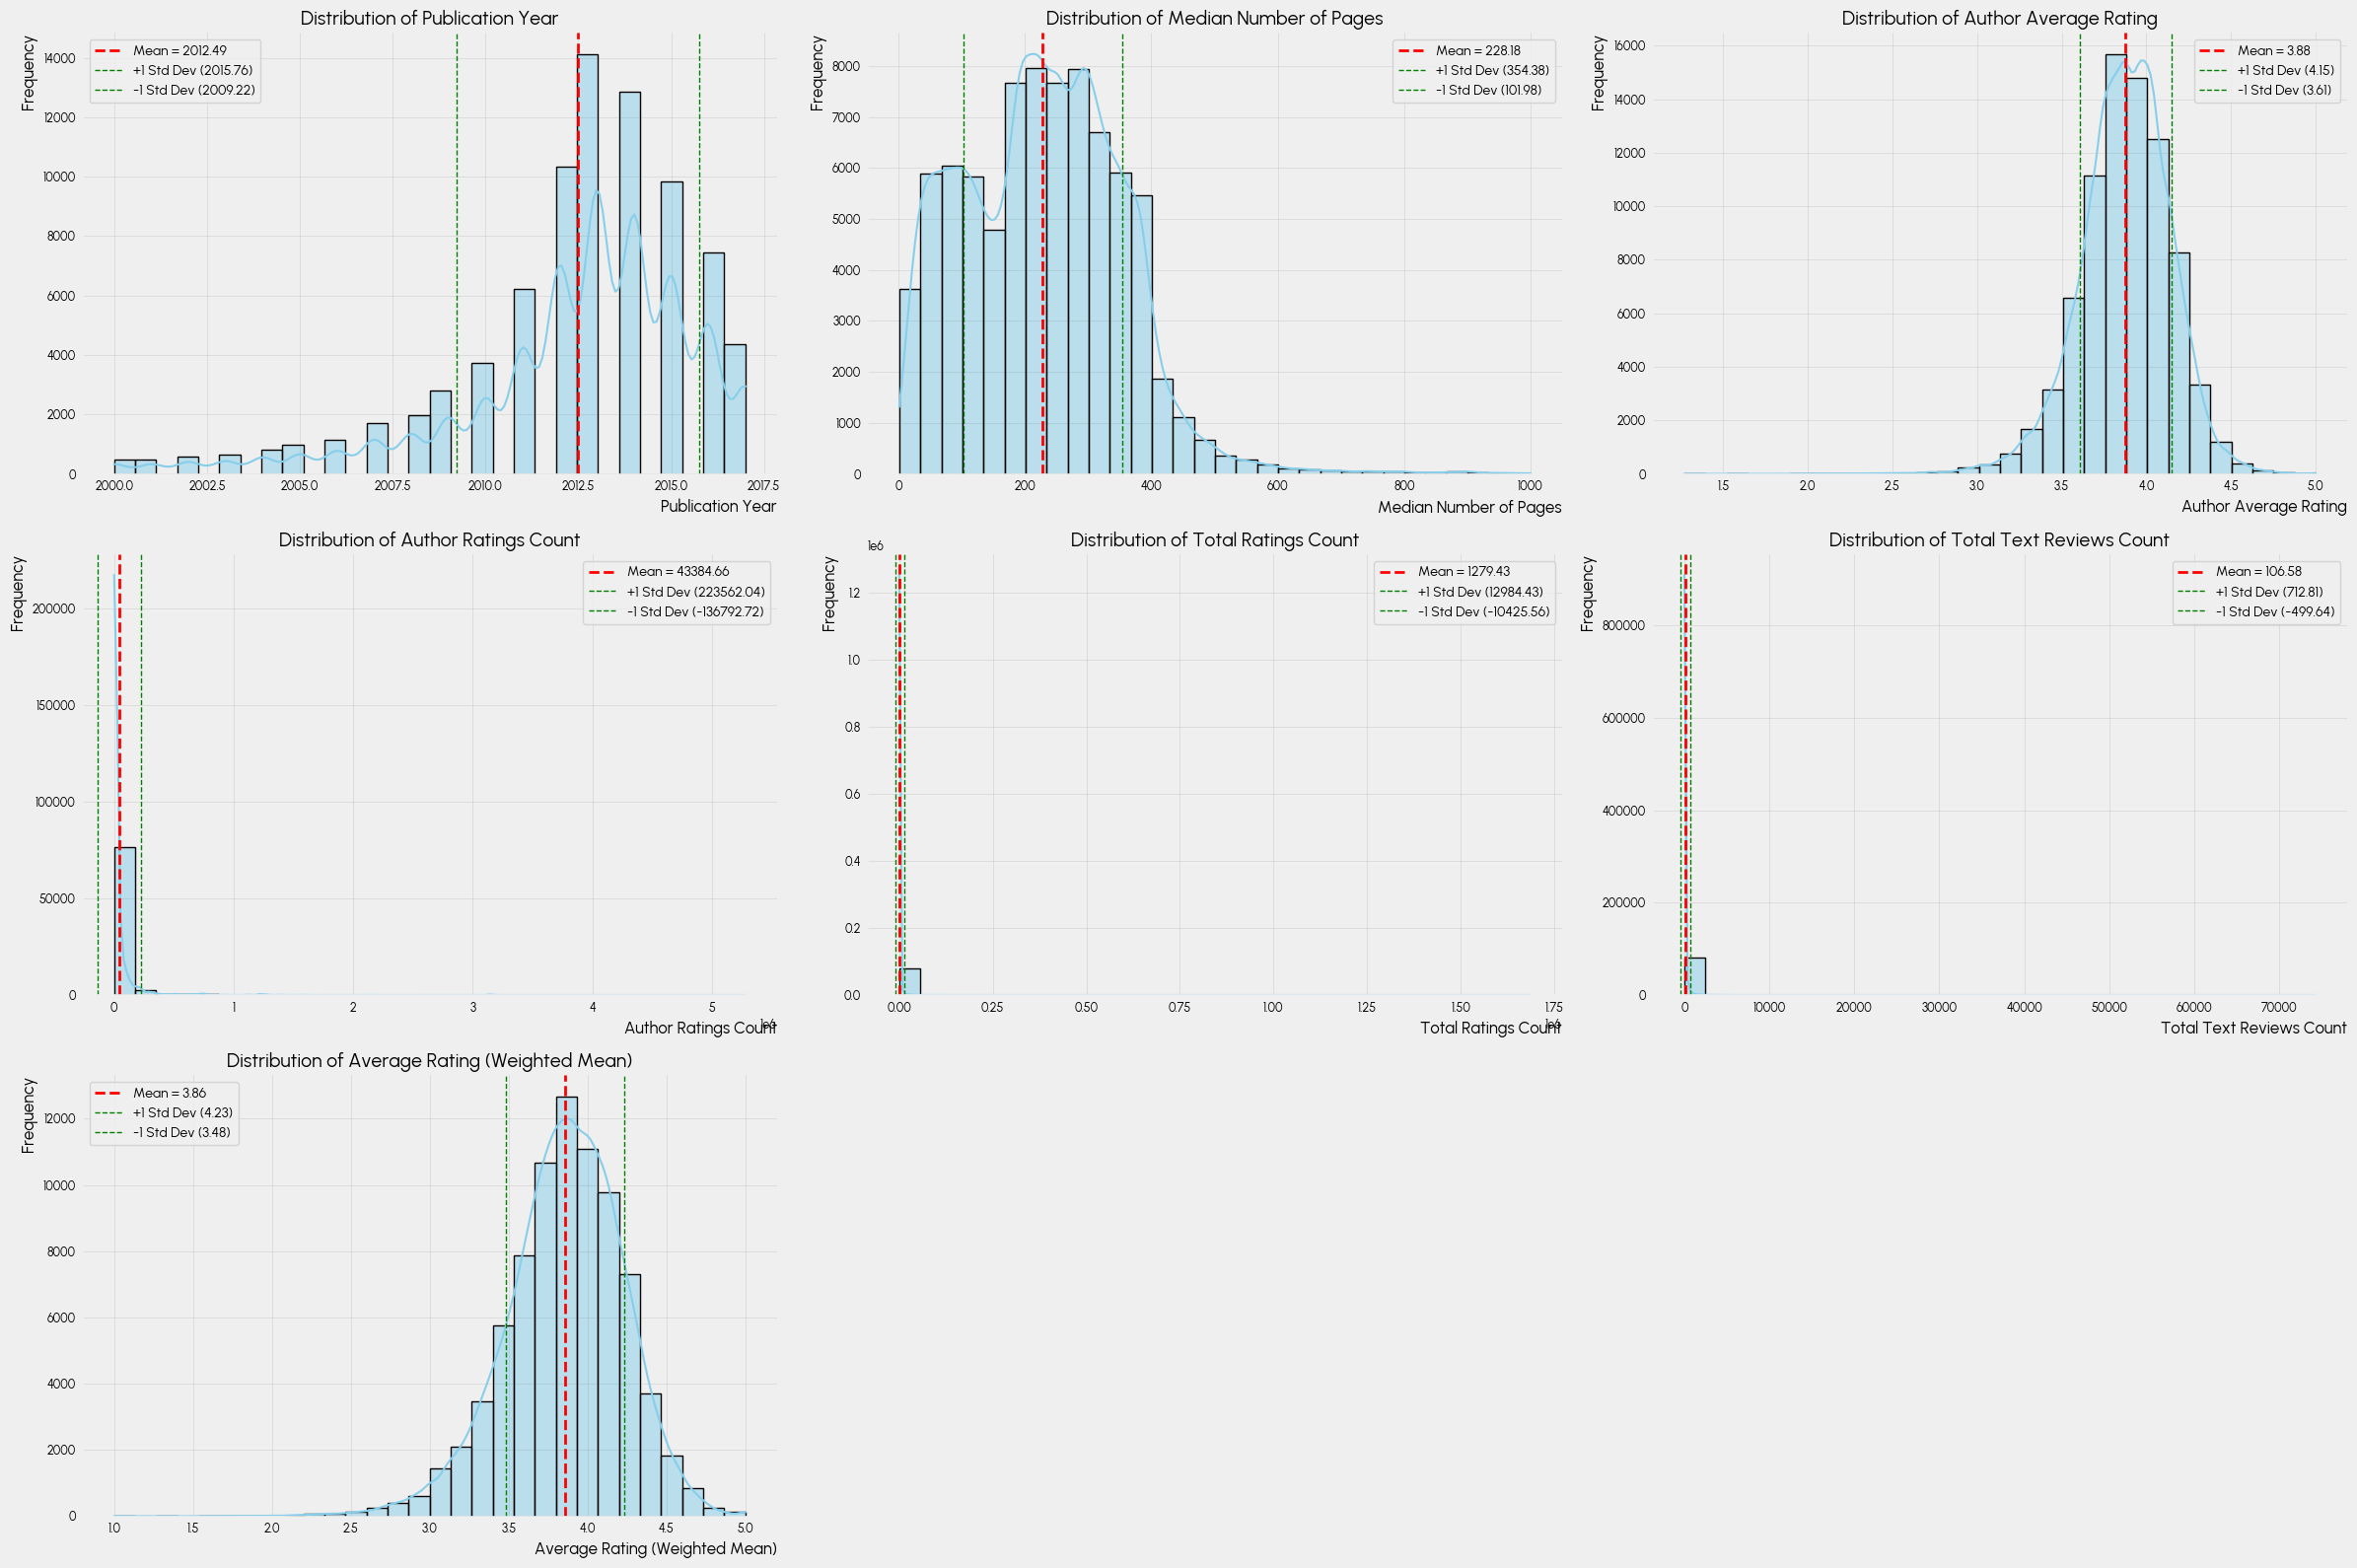


DISTRIBUTION VISUALIZATION COMPLETED
Timestamp: 2025-09-20 16:23:39


In [ ]:
# Install required packages if not available
import subprocess
import sys

print("="*60)
print("INSTALLING REQUIRED PACKAGES")
print("="*60)

try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("✓ matplotlib and seaborn are already installed")
except ImportError:
    print("Installing matplotlib and seaborn...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib", "seaborn"])
    print("✓ matplotlib and seaborn installed successfully")
    import matplotlib.pyplot as plt
    import seaborn as sns

# Import other necessary libraries
import pandas as pd
import numpy as np

# Set up the color palette
sns.diverging_palette(220, 20, as_cmap=True)
%matplotlib inline

# Define the list of numerical variables with their descriptive names
numerical_vars = ['publication_year', 'num_pages_median', 'author_average_rating',
                  'author_ratings_count', 'ratings_count_sum', 'text_reviews_count_sum',
                  'average_rating_weighted_mean']

# Create mapping for descriptive labels
var_labels = {
    'publication_year': 'Publication Year',
    'num_pages_median': 'Median Number of Pages',
    'author_average_rating': 'Author Average Rating',
    'author_ratings_count': 'Author Ratings Count',
    'ratings_count_sum': 'Total Ratings Count',
    'text_reviews_count_sum': 'Total Text Reviews Count',
    'average_rating_weighted_mean': 'Average Rating (Weighted Mean)'
}

# Define the number of plots
num_plots = len(numerical_vars)
cols = 3  # Number of columns
rows = num_plots // cols + int(num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(24, 16))  # Increased height for better readability
axes = axes.flatten()  # Flatten to easily iterate

print("="*80)
print("CREATING DISTRIBUTION VISUALIZATIONS FOR NUMERICAL VARIABLES")
print("="*80)

for idx, var in enumerate(numerical_vars):
    if var in df_core.columns:
        ax = axes[idx]
        
        # Plot histogram and KDE
        sns.histplot(df_core[var], bins=30, kde=True, color='skyblue', ax=ax)
        
        # Calculate mean and standard deviation
        mean = df_core[var].mean()
        std = df_core[var].std()
        
        # Add mean and std lines
        ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, 
                   label=f'Mean = {mean:.2f}')
        ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, 
                   label=f'+1 Std Dev ({mean + std:.2f})')
        ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, 
                   label=f'-1 Std Dev ({mean - std:.2f})')
        
        # Set titles and labels with descriptive names
        descriptive_name = var_labels[var]
        ax.set_title(f'Distribution of {descriptive_name}', fontsize=14, fontweight='bold')
        ax.set_xlabel(descriptive_name, fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        
        # Add legend
        ax.legend(fontsize=10)
        

        
        print(f"✓ Created visualization for {descriptive_name}")
        
    else:
        print(f"✗ Column '{var}' not found in dataset")
        # Hide the subplot if column doesn't exist
        fig.delaxes(axes[idx])

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the combined figure
plt.show()

print("\n" + "="*80)
print("DISTRIBUTION VISUALIZATION COMPLETED")
print("="*80)
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)


CREATING DISTRIBUTION VISUALIZATIONS FOR NUMERICAL VARIABLES
✓ Created visualization for Publication Year
✓ Created visualization for Median Number of Pages
✓ Created visualization for Author Average Rating
✓ Created visualization for Author Ratings Count
✓ Created visualization for Total Ratings Count
✓ Created visualization for Total Text Reviews Count
✓ Created visualization for Average Rating (Weighted Mean)


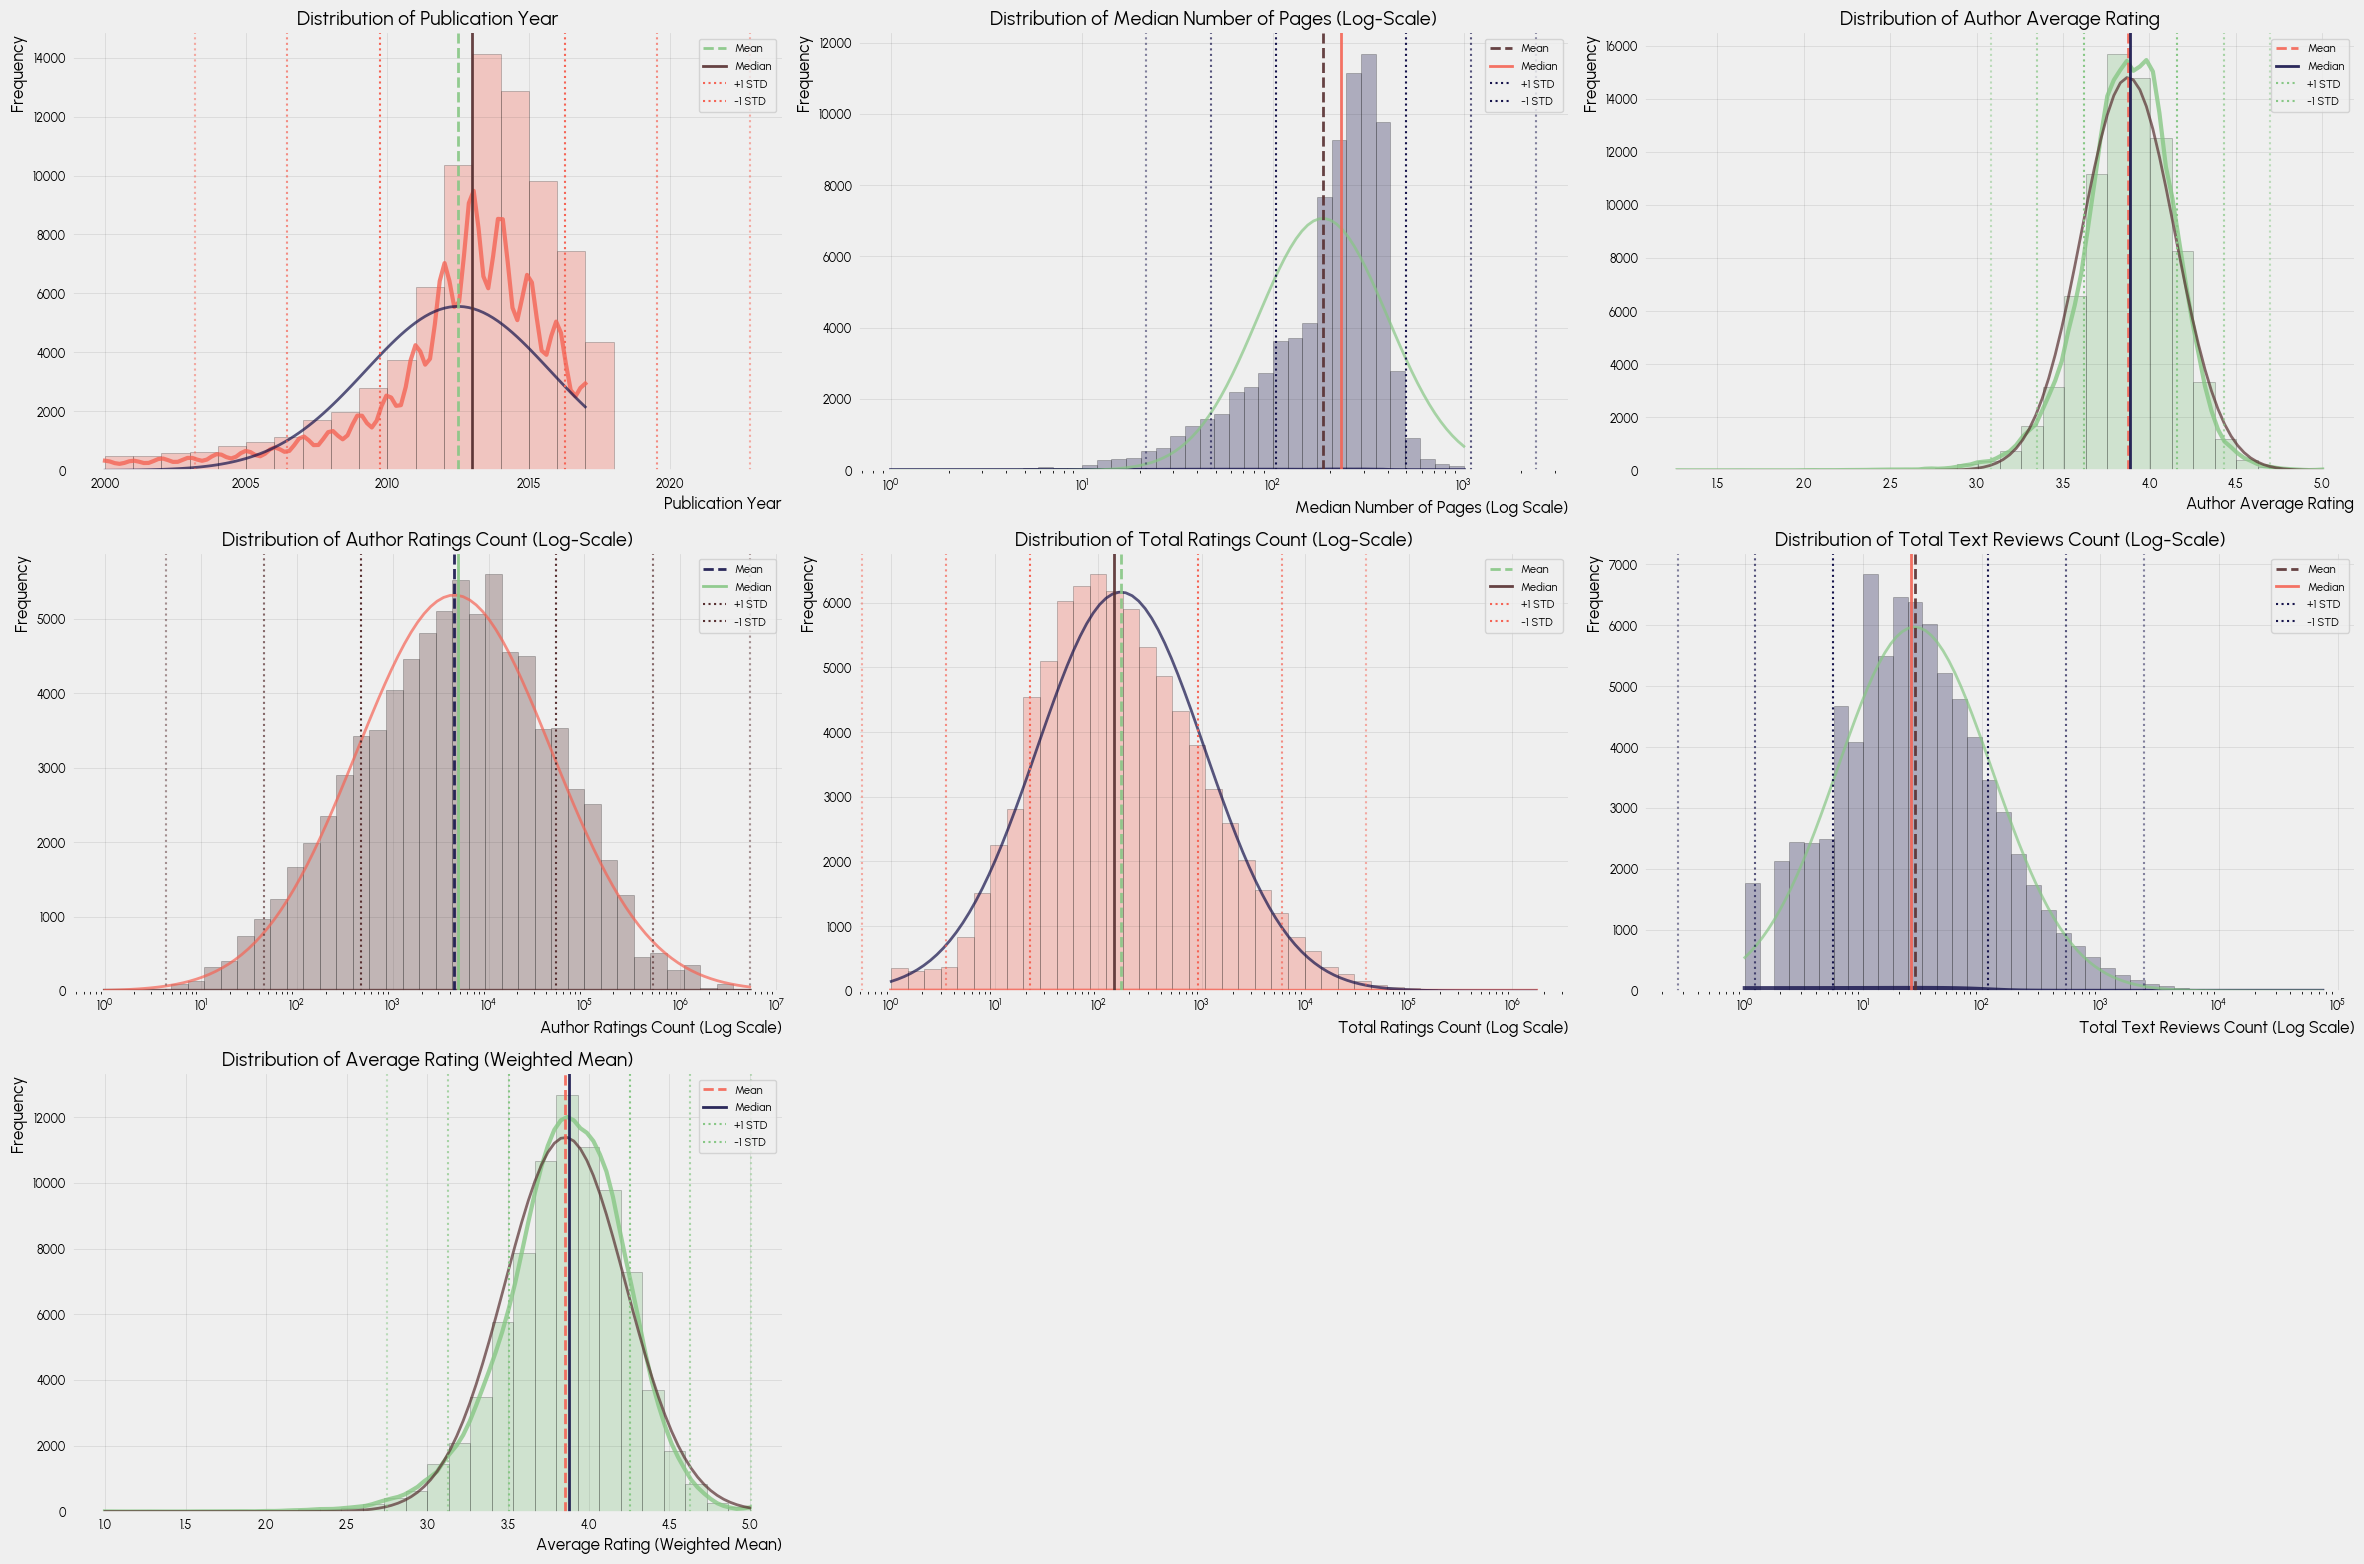


DISTRIBUTION VISUALIZATION COMPLETED
Timestamp: 2025-09-20 16:23:47


In [ ]:
# Try the "urban" theme from morethemes
import morethemes as mt
mt.set_theme("urban")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Use the urban theme's color cycle for all plots
urban_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline

# Define the list of numerical variables with their descriptive names
numerical_vars = ['publication_year', 'num_pages_median', 'author_average_rating', 
                  'author_ratings_count', 'ratings_count_sum', 'text_reviews_count_sum', 
                  'average_rating_weighted_mean']

# Create mapping for descriptive labels
var_labels = {
    'publication_year': 'Publication Year',
    'num_pages_median': 'Median Number of Pages',
    'author_average_rating': 'Author Average Rating',
    'author_ratings_count': 'Author Ratings Count',
    'ratings_count_sum': 'Total Ratings Count',
    'text_reviews_count_sum': 'Total Text Reviews Count',
    'average_rating_weighted_mean': 'Average Rating (Weighted Mean)'
}

# Define the number of plots
num_plots = len(numerical_vars)
cols = 3  # Number of columns
rows = num_plots // cols + int(num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(24, 16))  # Increased height for better readability
axes = axes.flatten()  # Flatten to easily iterate

print("="*80)
print("CREATING DISTRIBUTION VISUALIZATIONS FOR NUMERICAL VARIABLES")
print("="*80)

# Define the problematic columns that need log-scale visualization
log_columns = ['author_ratings_count', 'ratings_count_sum', 'text_reviews_count_sum', 'num_pages_median']

for idx, var in enumerate(numerical_vars):
    if var in df_core.columns:
        ax = axes[idx]
        
        # Use different color for each plot with transparency from urban theme
        plot_color = urban_colors[idx % len(urban_colors)]
        
        # Check if this is one of the problematic columns that needs log-scale
        if var in log_columns:
            # For log-scale columns: remove zeros and use log-spaced bins
            data = df_core[var].dropna()
            data = data[data > 0]  # Remove zeros to avoid log(0)
            
            # Create log-spaced bins
            bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 40)
            
            # Plot histogram with transparency
            ax.hist(data, bins=bins, color=plot_color, alpha=0.3, edgecolor='black', linewidth=0.5)
            ax.set_xscale('log')
            
            # Add KDE for log-scale data
            from scipy import stats
            kde = stats.gaussian_kde(data)
            x_range = np.logspace(np.log10(data.min()), np.log10(data.max()), 100)
            kde_values = kde(x_range)
            # Scale KDE to match histogram
            kde_scaled = kde_values * len(data) * (np.log10(data.max()) - np.log10(data.min())) / 40
            ax.plot(x_range, kde_scaled, color=plot_color, linewidth=3, alpha=0.8)
            
            # Calculate statistics for log-transformed data
            log_data = np.log10(data)
            mean_log = log_data.mean()
            median_log = np.median(log_data)
            std_log = log_data.std()
            
            # Add normal distribution overlay (in log space)
            log_range = np.linspace(log_data.min(), log_data.max(), 100)
            normal_dist_log = stats.norm.pdf(log_range, mean_log, std_log)
            # Scale normal distribution to match histogram
            normal_dist_scaled_log = normal_dist_log * len(data) * (log_data.max() - log_data.min()) / 40
            ax.plot(10**log_range, normal_dist_scaled_log, color=urban_colors[(idx+1) % len(urban_colors)], 
                   linewidth=2, alpha=0.7)
            
            # Add statistical lines
            geom_mean = 10**mean_log
            geom_median = 10**median_log
            std_1_plus = 10**(median_log + std_log)
            std_1_minus = 10**(median_log - std_log)
            std_2_plus = 10**(median_log + 2*std_log)
            std_2_minus = 10**(median_log - 2*std_log)
            std_3_plus = 10**(median_log + 3*std_log)
            std_3_minus = 10**(median_log - 3*std_log)
            
            # Format numbers
            geom_mean_str = f'{geom_mean:.0f}' if geom_mean == int(geom_mean) else f'{geom_mean:.2f}'
            geom_median_str = f'{geom_median:.0f}' if geom_median == int(geom_median) else f'{geom_median:.2f}'
            
            # Draw mean and median (less bold, similar)
            mean_line = ax.axvline(geom_mean, color=urban_colors[(idx+2) % len(urban_colors)], 
                                 linestyle='--', linewidth=2, alpha=0.9, label='Mean')
            median_line = ax.axvline(geom_median, color=urban_colors[(idx+3) % len(urban_colors)], 
                                   linestyle='-', linewidth=2, alpha=0.9, label='Median')
            
            # Draw all std lines with same color, pattern, and width, but only label +-1 STD
            std_color = urban_colors[(idx+4) % len(urban_colors)]
            std_style = ':'
            std_width = 1.5
            std1p = ax.axvline(std_1_plus, color=std_color, linestyle=std_style, linewidth=std_width, 
                             alpha=1.0, label='+1 STD')
            std1m = ax.axvline(std_1_minus, color=std_color, linestyle=std_style, linewidth=std_width, 
                             alpha=1.0, label='-1 STD')
            
            # Draw 2, 3 std lines (no legend)
            ax.axvline(std_2_plus, color=std_color, linestyle=std_style, linewidth=std_width, alpha=0.7)
            ax.axvline(std_2_minus, color=std_color, linestyle=std_style, linewidth=std_width, alpha=0.7)
            ax.axvline(std_3_plus, color=std_color, linestyle=std_style, linewidth=std_width, alpha=0.5)
            ax.axvline(std_3_minus, color=std_color, linestyle=std_style, linewidth=std_width, alpha=0.5)
            
            descriptive_name = var_labels[var]
            ax.set_title(f'Distribution of {descriptive_name} (Log-Scale)', fontsize=14, fontweight='bold')
            ax.set_xlabel(f'{descriptive_name} (Log Scale)', fontsize=12)
            ax.set_ylabel('Frequency', fontsize=12)
            
        else:
            # For regular columns: use standard histogram with transparency
            if var == 'publication_year':
                # Use bin width of 1 year for publication year
                bins = range(int(df_core[var].min()), int(df_core[var].max()) + 2)
                ax.hist(df_core[var], bins=bins, color=plot_color, alpha=0.3, edgecolor='black', linewidth=0.5)
            else:
                ax.hist(df_core[var], bins=30, color=plot_color, alpha=0.3, edgecolor='black', linewidth=0.5)
            
            # Add KDE
            from scipy import stats
            data_clean = df_core[var].dropna()
            kde = stats.gaussian_kde(data_clean)
            x_range = np.linspace(data_clean.min(), data_clean.max(), 100)
            kde_values = kde(x_range)
            # Scale KDE to match histogram
            kde_scaled = kde_values * len(data_clean) * (data_clean.max() - data_clean.min()) / 30
            ax.plot(x_range, kde_scaled, color=plot_color, linewidth=3, alpha=0.8)
            
            # Calculate statistics
            mean = df_core[var].mean()
            median = df_core[var].median()
            std = df_core[var].std()
            
            # Add normal distribution overlay
            normal_dist = stats.norm.pdf(x_range, mean, std)
            # Scale normal distribution to match histogram
            normal_dist_scaled = normal_dist * len(df_core[var]) * (df_core[var].max() - df_core[var].min()) / 30
            ax.plot(x_range, normal_dist_scaled, color=urban_colors[(idx+1) % len(urban_colors)], 
                   linewidth=2, alpha=0.7)
            
            # Add statistical lines
            std_1_plus = median + std
            std_1_minus = median - std
            std_2_plus = median + 2*std
            std_2_minus = median - 2*std
            std_3_plus = median + 3*std
            std_3_minus = median - 3*std
            
            # Format numbers
            mean_str = f'{mean:.0f}' if mean == int(mean) else f'{mean:.2f}'
            median_str = f'{median:.0f}' if median == int(median) else f'{median:.2f}'
            
            # Draw mean and median (less bold, similar)
            mean_line = ax.axvline(mean, color=urban_colors[(idx+2) % len(urban_colors)], 
                                 linestyle='--', linewidth=2, alpha=0.9, label='Mean')
            median_line = ax.axvline(median, color=urban_colors[(idx+3) % len(urban_colors)], 
                                   linestyle='-', linewidth=2, alpha=0.9, label='Median')
            
            # Draw all std lines with same color, pattern, and width, but only label +-1 STD
            std_color = urban_colors[(idx+4) % len(urban_colors)]
            std_style = ':'
            std_width = 1.5
            std1p = ax.axvline(std_1_plus, color=std_color, linestyle=std_style, linewidth=std_width, 
                             alpha=1.0, label='+1 STD')
            std1m = ax.axvline(std_1_minus, color=std_color, linestyle=std_style, linewidth=std_width, 
                             alpha=1.0, label='-1 STD')
            
            # Draw 2, 3 std lines (no legend)
            ax.axvline(std_2_plus, color=std_color, linestyle=std_style, linewidth=std_width, alpha=0.7)
            ax.axvline(std_2_minus, color=std_color, linestyle=std_style, linewidth=std_width, alpha=0.7)
            ax.axvline(std_3_plus, color=std_color, linestyle=std_style, linewidth=std_width, alpha=0.5)
            ax.axvline(std_3_minus, color=std_color, linestyle=std_style, linewidth=std_width, alpha=0.5)
            
            # Set titles and labels with descriptive names
            descriptive_name = var_labels[var]
            ax.set_title(f'Distribution of {descriptive_name}', fontsize=14, fontweight='bold')
            ax.set_xlabel(descriptive_name, fontsize=12)
            ax.set_ylabel('Frequency', fontsize=12)
            
            # Special formatting for publication year and average rating
            if var == 'publication_year':
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}'))
            elif var == 'average_rating_weighted_mean':
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}'))
        
        # Add legend with smaller font, only for mean, median, and +-1 STD
        handles, labels = ax.get_legend_handles_labels()
        # Only keep unique labels and in order: Mean, Median, +1 STD, -1 STD
        legend_dict = {}
        for h, l in zip(handles, labels):
            if l in ['Mean', 'Median', '+1 STD', '-1 STD'] and l not in legend_dict:
                legend_dict[l] = h
        
        # Order: Mean, Median, +1 STD, -1 STD
        legend_order = ['Mean', 'Median', '+1 STD', '-1 STD']
        legend_handles = [legend_dict[l] for l in legend_order if l in legend_dict]
        legend_labels = [l for l in legend_order if l in legend_dict]
        ax.legend(legend_handles, legend_labels, fontsize=8, loc='upper right')
        
        print(f"✓ Created visualization for {descriptive_name}")
    else:
        print(f"✗ Column '{var}' not found in dataset")
        # Hide the subplot if column doesn't exist
        fig.delaxes(axes[idx])

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout with better spacing
plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.0)

# Display the combined figure
plt.show()

print("\n" + "="*80)
print("DISTRIBUTION VISUALIZATION COMPLETED")
print("="*80)
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)


CREATING BOX PLOTS FOR OUTLIER ANALYSIS
✓ Created box plot for Publication Year
✓ Created box plot for Median Number of Pages (Log Scale)
✓ Created box plot for Author Average Rating
✓ Created box plot for Author Ratings Count (Log Scale)
✓ Created box plot for Total Ratings Count (Log Scale)
✓ Created box plot for Total Text Reviews Count (Log Scale)
✓ Created box plot for Average Rating (Weighted Mean)


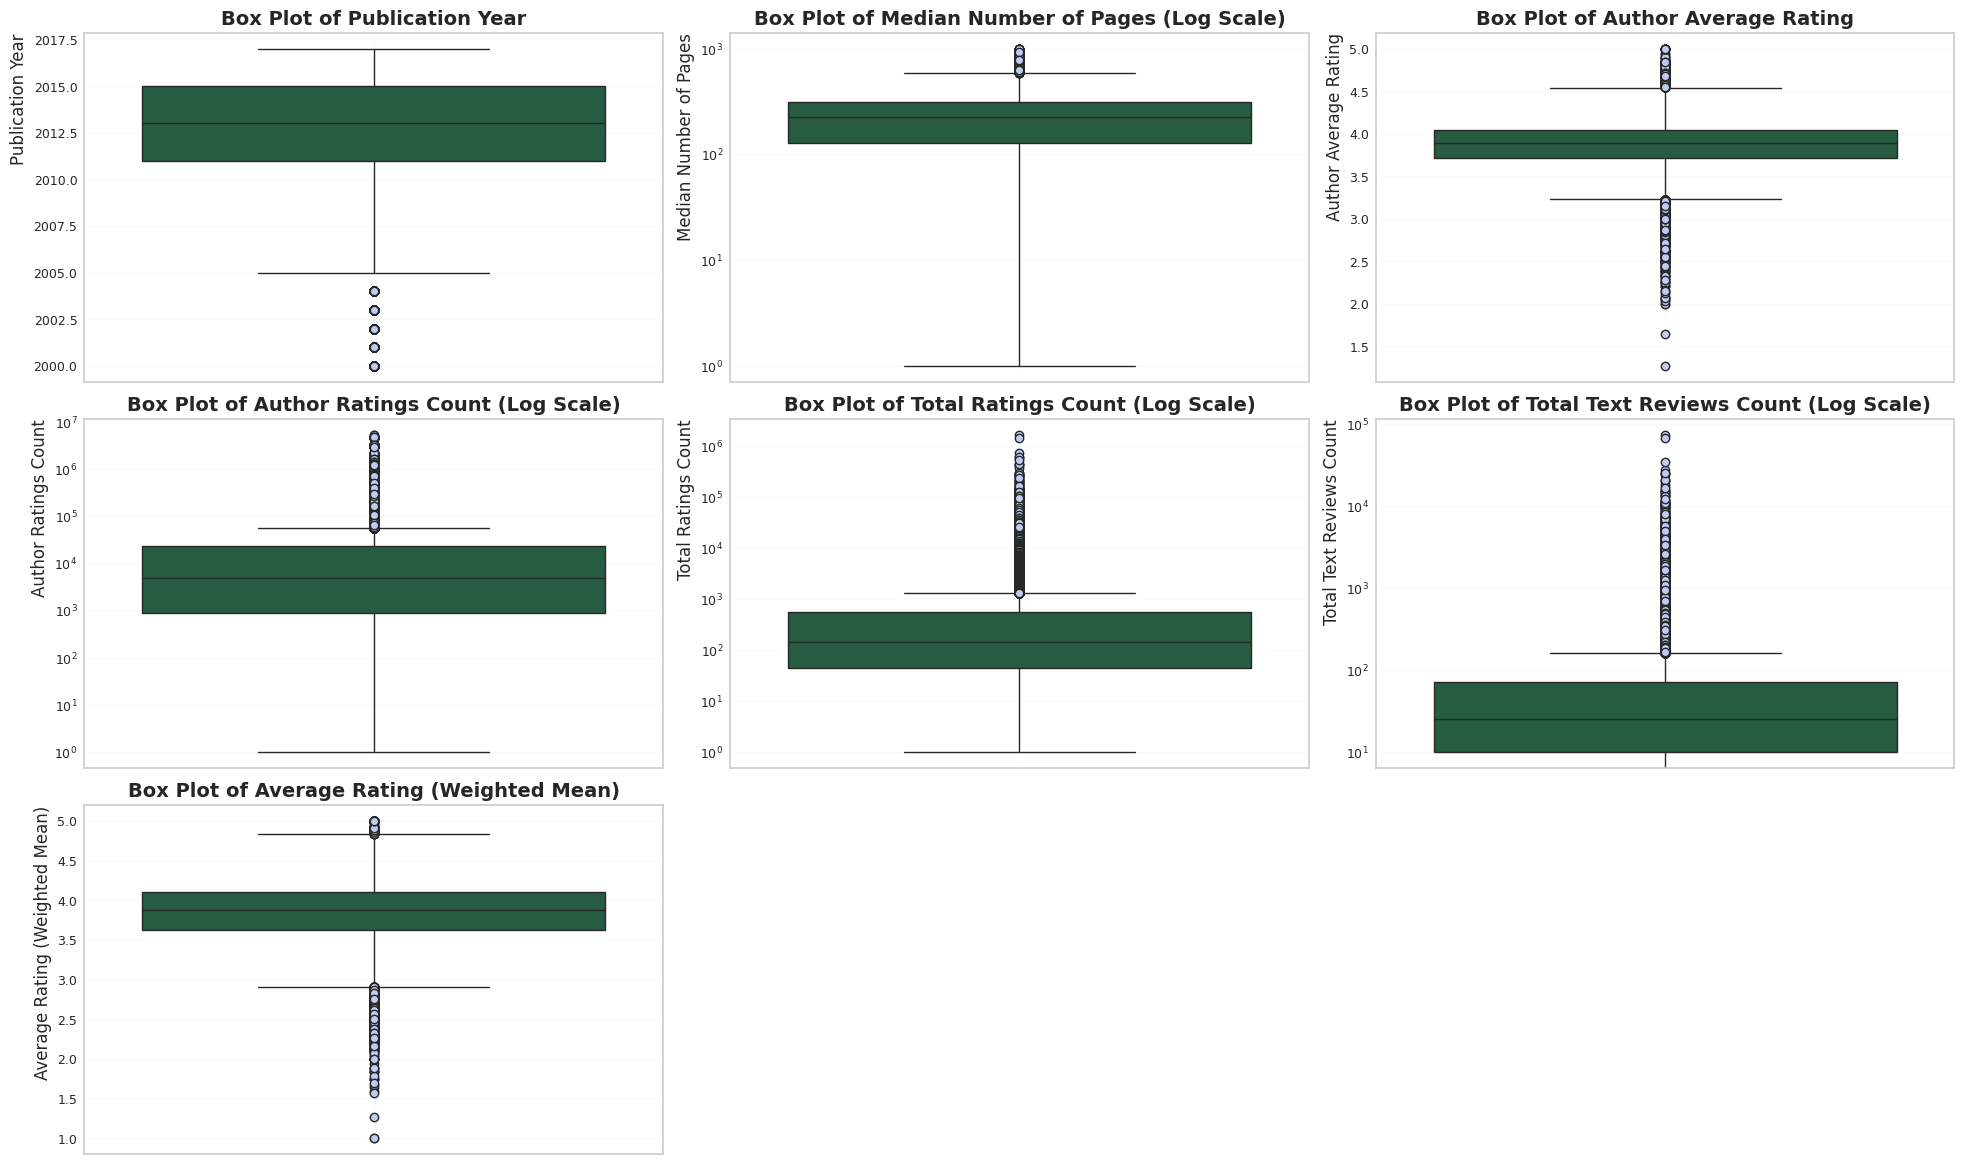


BOX PLOT OUTLIER ANALYSIS COMPLETED
Variables with log scale: author_ratings_count, ratings_count_sum, text_reviews_count_sum, num_pages_median
Variables with linear scale: publication_year, author_average_rating, average_rating_weighted_mean
Timestamp: 2025-09-20 16:23:53


In [ ]:
# Box plots for outlier analysis (with warnings fixed)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=PendingDeprecationWarning)

# Set up seaborn styling
sns.set_style("whitegrid")
sns.set_palette("cubehelix")

# Set up the color palette
color_palette = sns.color_palette("cubehelix", as_cmap=True)

# List of numerical variables to analyze for outliers
outlier_vars = ['publication_year', 'num_pages_median', 'author_average_rating',
                'author_ratings_count', 'ratings_count_sum', 'text_reviews_count_sum',
                'average_rating_weighted_mean']

# Set up the matplotlib figure with subplots
num_outlier_plots = len(outlier_vars)
cols_outliers = 3
rows_outliers = num_outlier_plots // cols_outliers + int(num_outlier_plots % cols_outliers > 0)

fig, axes = plt.subplots(rows_outliers, cols_outliers, figsize=(20, 12))
axes = axes.flatten()

print("="*80)
print("CREATING BOX PLOTS FOR OUTLIER ANALYSIS")
print("="*80)

for idx, var in enumerate(outlier_vars):
    if var in df_core.columns:
        ax = axes[idx]

        # Plot box plot for each variable with log scale for large range variables
        if var in ['author_ratings_count', 'ratings_count_sum', 'text_reviews_count_sum', 'num_pages_median']:
            # Use data parameter to avoid deprecation warnings with cubehelix colors
            sns.boxplot(data=df_core, y=var, color=color_palette(0.3), ax=ax,
                        flierprops=dict(marker='o', markerfacecolor=color_palette(0.8), markersize=6, linestyle='none'))
            ax.set_yscale('log')
            scale_note = " (Log Scale)"
        else:
            # Use data parameter to avoid deprecation warnings with cubehelix colors
            sns.boxplot(data=df_core, y=var, color=color_palette(0.3), ax=ax,
                        flierprops=dict(marker='o', markerfacecolor=color_palette(0.8), markersize=6, linestyle='none'))
            scale_note = ""

        # Get descriptive name
        descriptive_name = var_labels[var]

        # Customize the plot
        ax.set_title(f'Box Plot of {descriptive_name}{scale_note}', fontsize=14, fontweight='bold')
        ax.set_ylabel(descriptive_name, fontsize=12)

        # Add grid for better readability - let theme handle styling
        ax.grid(True)
        
        print(f"✓ Created box plot for {descriptive_name}{scale_note}")
        
    else:
        print(f"✗ Column '{var}' not found in dataset")
        # Hide the subplot if column doesn't exist
        fig.delaxes(axes[idx])

# Hide any unused subplots
for i in range(num_outlier_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.0)

# Show the combined plot
plt.show()

print("\n" + "="*80)
print("BOX PLOT OUTLIER ANALYSIS COMPLETED")
print("="*80)
print(f"Variables with log scale: {', '.join(['author_ratings_count', 'ratings_count_sum', 'text_reviews_count_sum', 'num_pages_median'])}")
print(f"Variables with linear scale: {', '.join(['publication_year', 'author_average_rating', 'average_rating_weighted_mean'])}")
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)


## 🔧 Numerical Variables Optimization for Statistical Reliability

This section analyzes our numerical variables to identify optimal filtering strategies that maintain a wide range of books while improving statistical test reliability.                      

### 🔍 Outlier Identification and Analysis
Identification of extreme outliers that may skew statistical tests.

### 📊 Filtering Strategy Development
Proposal of reasonable filtering thresholds based on data distribution analysis.

### 🎯 Data Quality Improvement
Maintenance of diversity in book characteristics for robust analysis.

### 📈 Validation and Comparison Analysis
Comparison of before/after distributions to validate filtering decisions.

### 🔧 Statistical Reliability Enhancement
Improvement of the reliability of subsequent statistical tests.

### What this section accomplishes:
- **Outlier Identification**: Identifies extreme outliers that may skew statistical tests
- **Filtering Strategy Development**: Proposes reasonable filtering thresholds based on data distribution analysis                                                                            
- **Data Quality Improvement**: Maintains diversity in book characteristics for robust analysis
- **Validation Analysis**: Compares before/after distributions to validate filtering decisions
- **Statistical Reliability Enhancement**: Improves the reliability of subsequent statistical tests                                                                                           

### Key Objectives:
- **Identify extreme outliers** that may skew statistical tests
- **Propose reasonable filtering thresholds** based on data distribution analysis
- **Maintain diversity** in book characteristics for robust analysis
- **Compare before/after distributions** to validate filtering decisions

### Variables Analyzed:
- **Publication Year**: Time range optimization
- **Number of Pages**: Outlier detection and reasonable bounds
- **Rating Variables**: Range validation and extreme value identification
- **Count Variables**: Log-transformation and outlier analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up the Antique color palette as specified in user preferences
antique_colors = ['#855C75FF', '#D9AF6BFF', '#AF6458FF', '#736F4CFF', '#526A83FF', 
                  '#625377FF', '#68855CFF', '#9C9C5EFF', '#A06177FF', '#8C785DFF', '#467378FF', '#7C7C7CFF']

# Set seaborn style with Antique palette
sns.set_style("whitegrid")
sns.set_palette(antique_colors)

print("="*80)
print("NUMERICAL VARIABLES OPTIMIZATION FOR STATISTICAL RELIABILITY")
print("="*80)

# Define numerical variables with their characteristics
numerical_vars = {
    'publication_year': {'type': 'temporal', 'log_scale': False, 'description': 'Publication Year'},
    'num_pages_median': {'type': 'count', 'log_scale': True, 'description': 'Number of Pages'},
    'author_average_rating': {'type': 'rating', 'log_scale': False, 'description': 'Author Average Rating'},
    'author_ratings_count': {'type': 'count', 'log_scale': True, 'description': 'Author Ratings Count'},
    'ratings_count_sum': {'type': 'count', 'log_scale': True, 'description': 'Total Ratings Count'},
    'text_reviews_count_sum': {'type': 'count', 'log_scale': True, 'description': 'Total Text Reviews Count'},
    'average_rating_weighted_mean': {'type': 'rating', 'log_scale': False, 'description': 'Average Rating (Weighted Mean)'}
}

# Store original data for comparison
df_original = df_core.copy()
original_shape = df_original.shape

print(f"Original dataset shape: {original_shape}")
print(f"Analyzing {len(numerical_vars)} numerical variables for optimization...")

# Create comprehensive analysis for each variable
optimization_results = {}

for var, properties in numerical_vars.items():
    print(f"\n{'='*60}")
    print(f"ANALYZING: {properties['description'].upper()}")
    print(f"{'='*60}")
    
    data = df_original[var].dropna()
    n_original = len(data)
    
    # Basic statistics
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    print(f"Original sample size: {n_original:,}")
    print(f"Mean: {mean_val:.2f}, Median: {median_val:.2f}, Std: {std_val:.2f}")
    print(f"Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")
    print(f"Min: {data.min():.2f}, Max: {data.max():.2f}")
    
    # Outlier detection using IQR method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # For count variables, also check for extreme values using percentile method
    if properties['type'] == 'count':
        # Use 99th percentile as upper bound for count variables
        upper_bound_percentile = data.quantile(0.99)
        extreme_upper = data.quantile(0.999)
        
        print(f"IQR-based bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"99th percentile: {upper_bound_percentile:.2f}")
        print(f"99.9th percentile: {extreme_upper:.2f}")
        
        # Count outliers
        iqr_outliers = ((data < lower_bound) | (data > upper_bound)).sum()
        extreme_outliers = (data > extreme_upper).sum()
        
        print(f"IQR outliers: {iqr_outliers:,} ({iqr_outliers/n_original*100:.1f}%)")
        print(f"Extreme outliers (>99.9th percentile): {extreme_outliers:,} ({extreme_outliers/n_original*100:.1f}%)")
        
        # Suggest filtering strategy
        if extreme_outliers > 0:
            print(f"\nRECOMMENDATION: Remove extreme outliers (>99.9th percentile)")
            print(f"This would remove {extreme_outliers:,} books ({extreme_outliers/n_original*100:.1f}%)")
            print(f"Remaining books: {n_original - extreme_outliers:,}")
            
            # Store filtering recommendation
            optimization_results[var] = {
                'filter_type': 'percentile',
                'threshold': extreme_upper,
                'outliers_removed': extreme_outliers,
                'remaining_count': n_original - extreme_outliers,
                'filter_description': f'Remove values > {extreme_upper:.0f}'
            }
        else:
            print(f"\nRECOMMENDATION: No extreme outliers detected - keep all data")
            optimization_results[var] = {
                'filter_type': 'none',
                'threshold': None,
                'outliers_removed': 0,
                'remaining_count': n_original,
                'filter_description': 'No filtering needed'
            }
    
    elif properties['type'] == 'rating':
        # For rating variables, check for impossible values
        if var in ['author_average_rating', 'average_rating_weighted_mean']:
            # Goodreads ratings should be between 1.0 and 5.0
            valid_ratings = ((data >= 1.0) & (data <= 5.0)).sum()
            invalid_ratings = n_original - valid_ratings
            
            print(f"Valid ratings (1.0-5.0): {valid_ratings:,}")
            print(f"Invalid ratings: {invalid_ratings:,}")
            
            if invalid_ratings > 0:
                print(f"\nRECOMMENDATION: Remove invalid ratings")
                optimization_results[var] = {
                    'filter_type': 'range',
                    'threshold': (1.0, 5.0),
                    'outliers_removed': invalid_ratings,
                    'remaining_count': valid_ratings,
                    'filter_description': 'Keep ratings between 1.0 and 5.0'
                }
            else:
                print(f"\nRECOMMENDATION: All ratings are valid - keep all data")
                optimization_results[var] = {
                    'filter_type': 'none',
                    'threshold': None,
                    'outliers_removed': 0,
                    'remaining_count': n_original,
                    'filter_description': 'No filtering needed'
                }
    
    elif properties['type'] == 'temporal':
        # For publication year, check for reasonable range
        if var == 'publication_year':
            # Check for books published before 1900 or after 2020
            reasonable_years = ((data >= 1900) & (data <= 2020)).sum()
            unreasonable_years = n_original - reasonable_years
            
            print(f"Reasonable years (1900-2020): {reasonable_years:,}")
            print(f"Unreasonable years: {unreasonable_years:,}")
            
            if unreasonable_years > 0:
                print(f"\nRECOMMENDATION: Remove unreasonable publication years")
                optimization_results[var] = {
                    'filter_type': 'range',
                    'threshold': (1900, 2020),
                    'outliers_removed': unreasonable_years,
                    'remaining_count': reasonable_years,
                    'filter_description': 'Keep years between 1900 and 2020'
                }
            else:
                print(f"\nRECOMMENDATION: All publication years are reasonable - keep all data")
                optimization_results[var] = {
                    'filter_type': 'none',
                    'threshold': None,
                    'outliers_removed': 0,
                    'remaining_count': n_original,
                    'filter_description': 'No filtering needed'
                }

print(f"\n{'='*80}")
print("OPTIMIZATION SUMMARY")
print(f"{'='*80}")

# Create summary table
summary_data = []
total_outliers = 0

for var, result in optimization_results.items():
    summary_data.append({
        'Variable': numerical_vars[var]['description'],
        'Filter Type': result['filter_type'],
        'Outliers Removed': result['outliers_removed'],
        'Remaining Count': result['remaining_count'],
        'Filter Description': result['filter_description']
    })
    total_outliers += result['outliers_removed']

summary_df = pd.DataFrame(summary_data)
print("\nFILTERING RECOMMENDATIONS SUMMARY:")
print("-" * 80)
print(summary_df.to_string(index=False))

print(f"\nTOTAL OUTLIERS TO REMOVE: {total_outliers:,}")
print(f"ORIGINAL DATASET SIZE: {original_shape[0]:,}")
print(f"ESTIMATED REMAINING SIZE: {original_shape[0] - total_outliers:,}")
print(f"DATA RETENTION: {(original_shape[0] - total_outliers)/original_shape[0]*100:.1f}%")

print(f"\n{'='*80}")
print("OPTIMIZATION ANALYSIS COMPLETED")
print(f"{'='*80}")
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"{'='*80}")


NUMERICAL VARIABLES OPTIMIZATION FOR STATISTICAL RELIABILITY
Original dataset shape: (80755, 23)
Analyzing 7 numerical variables for optimization...

ANALYZING: PUBLICATION YEAR
Original sample size: 80,755
Mean: 2012.49, Median: 2013.00, Std: 3.27
Q1: 2011.00, Q3: 2015.00, IQR: 4.00
Min: 2000.00, Max: 2017.00
Reasonable years (1900-2020): 80,755
Unreasonable years: 0

RECOMMENDATION: All publication years are reasonable - keep all data

ANALYZING: NUMBER OF PAGES
Original sample size: 80,755
Mean: 234.85, Median: 227.00, Std: 381.85
Q1: 127.00, Q3: 315.00, IQR: 188.00
Min: 1.00, Max: 69473.00
IQR-based bounds: [-155.00, 597.00]
99th percentile: 600.00
99.9th percentile: 1741.64
IQR outliers: 831 (1.0%)
Extreme outliers (>99.9th percentile): 81 (0.1%)

RECOMMENDATION: Remove extreme outliers (>99.9th percentile)
This would remove 81 books (0.1%)
Remaining books: 80,674

ANALYZING: AUTHOR AVERAGE RATING
Original sample size: 80,755
Mean: 3.88, Median: 3.89, Std: 0.27
Q1: 3.72, Q3: 4.05,

## 🔍 Comprehensive Number of Pages Outlier Analysis

This section performs an extensive analysis of the `num_pages_median` variable with a focus on:
- **Distinguishing individual books from series metadata** to ensure we analyze only actual book records                                                                                      
- **Multi-method outlier detection** using statistical and machine learning approaches
- **Detailed investigation of extreme values** with extensive logging and context
- **Data-driven recommendations** for exclusion thresholds that preserve maximum valid data

### 🔍 Outlier Detection Methods
Statistical and machine learning approaches for identifying extreme values.

### 📊 Extreme Value Investigation
Detailed analysis of books with unusual page counts and their characteristics.

### 🎯 Data Quality Assessment
Evaluation of data integrity and identification of potential errors.

### 📋 Cleaning Recommendations
Data-driven thresholds and exclusion criteria for optimal dataset quality.

### Key Objectives:
- Identify and filter out series metadata records (not individual books)
- Detect outliers using multiple statistical methods
- Investigate possible explanations for extreme page counts
- Provide informed recommendations for data cleaning


In [ ]:
! pip install scikit-learn

In [ ]:
# 🔍 RANDOM SAMPLES OF BOOKS WITH SUSPICIOUS PAGE NUMBERS
# Instead of deleting rows, let's examine random samples of books with suspicious page counts

print("="*80)
print("🔍 RANDOM SAMPLES OF BOOKS WITH SUSPICIOUS PAGE NUMBERS")
print("="*80)

# Set random seed for reproducibility
np.random.seed(42)

# 1. Books with suspiciously high page counts (>5000 pages)
print("\n📚 BOOKS WITH SUSPICIOUSLY HIGH PAGE COUNTS (>5000 pages):")
print("-" * 60)
suspicious_high_pages = df_core[df_core['num_pages_median'] > 5000]
print(f"Total books with >5000 pages: {len(suspicious_high_pages)}")

if len(suspicious_high_pages) > 0:
    # Random sample of up to 10 books
    sample_size = min(10, len(suspicious_high_pages))
    random_sample = suspicious_high_pages.sample(n=sample_size, random_state=42)
    
    print(f"\nRandom sample of {sample_size} books:")
    for idx, (_, row) in enumerate(random_sample.iterrows(), 1):
        print(f"\n{idx}. Title: {row['title'][:60]}...")
        print(f"   Author: {row['author_name']}")
        print(f"   Pages: {row['num_pages_median']}")
        print(f"   Publication Year: {row['publication_year']}")
        print(f"   Average Rating: {row['average_rating_weighted_mean']}")
        print(f"   Ratings Count: {row['ratings_count_sum']}")

# 2. Books with extreme page count outliers (99.9th percentile)
print("\n\n📖 BOOKS WITH EXTREME PAGE COUNT OUTLIERS (99.9th percentile):")
print("-" * 60)
# Calculate 99.9th percentile for pages
pages_99_9 = df_core['num_pages_median'].quantile(0.999)
extreme_pages_outliers = df_core[df_core['num_pages_median'] > pages_99_9]
print(f"99.9th percentile of pages: {pages_99_9:.0f}")
print(f"Books with extreme page counts: {len(extreme_pages_outliers)}")

if len(extreme_pages_outliers) > 0:
    sample_size = min(10, len(extreme_pages_outliers))
    random_sample = extreme_pages_outliers.sample(n=sample_size, random_state=42)
    
    print(f"\nRandom sample of {sample_size} books:")
    for idx, (_, row) in enumerate(random_sample.iterrows(), 1):
        print(f"\n{idx}. Title: {row['title'][:60]}...")
        print(f"   Author: {row['author_name']}")
        print(f"   Pages: {row['num_pages_median']}")
        print(f"   Publication Year: {row['publication_year']}")
        print(f"   Average Rating: {row['average_rating_weighted_mean']}")
        print(f"   Ratings Count: {row['ratings_count_sum']}")

# 3. Books with very high page counts (>2000 pages) - potential series metadata
print("\n\n📚 BOOKS WITH VERY HIGH PAGE COUNTS (>2000 pages):")
print("-" * 60)
very_high_pages = df_core[df_core['num_pages_median'] > 2000]
print(f"Total books with >2000 pages: {len(very_high_pages)}")

if len(very_high_pages) > 0:
    sample_size = min(10, len(very_high_pages))
    random_sample = very_high_pages.sample(n=sample_size, random_state=42)
    
    print(f"\nRandom sample of {sample_size} books:")
    for idx, (_, row) in enumerate(random_sample.iterrows(), 1):
        print(f"\n{idx}. Title: {row['title'][:60]}...")
        print(f"   Author: {row['author_name']}")
        print(f"   Pages: {row['num_pages_median']}")
        print(f"   Publication Year: {row['publication_year']}")
        print(f"   Average Rating: {row['average_rating_weighted_mean']}")
        print(f"   Ratings Count: {row['ratings_count_sum']}")

print("\n" + "="*80)
print("✅ SUSPICIOUS PAGE NUMBERS SAMPLING COMPLETED")
print("="*80)
print(f"Total books in dataset: {len(df_core):,}")
print("Note: These samples help us understand page count data quality issues without removing any data.")


🔍 RANDOM SAMPLES OF BOOKS WITH SUSPICIOUS PAGE NUMBERS

📚 BOOKS WITH SUSPICIOUSLY HIGH PAGE COUNTS (>5000 pages):
------------------------------------------------------------
Total books with >5000 pages: 6

Random sample of 6 books:

1. Title: Demon Ryder...
   Author: Tamara Hunter
   Pages: 19000.0
   Publication Year: 2011
   Average Rating: 3.43
   Ratings Count: 11

2. Title: Siochain...
   Author: Aubrianna Hunter
   Pages: 69473.0
   Publication Year: 2012
   Average Rating: 4.18
   Ratings Count: 18

3. Title: The Beach Bag Boxed Set...
   Author: Natasha Boyd
   Pages: 5012.0
   Publication Year: 2016
   Average Rating: 4.13
   Ratings Count: 90

4. Title: The Dark-Hunters: The Collection Thus Far...
   Author: Sherrilyn Kenyon
   Pages: 8784.0
   Publication Year: 2013
   Average Rating: 4.68
   Ratings Count: 416

5. Title: A Most Unlikely Countess...
   Author: V.L. Locey
   Pages: 54887.0
   Publication Year: 2014
   Average Rating: 4.28
   Ratings Count: 44

6. Title: Ro

In [ ]:
# 🔍 DATASET COLUMNS EXPLORATION AND ANTHOLOGY ANALYSIS
# Let's explore all columns and investigate if anthologies are connected to high page counts

print("="*80)
print("🔍 DATASET COLUMNS EXPLORATION AND ANTHOLOGY ANALYSIS")
print("="*80)

# 1. Print all columns in the dataset
print("\n📋 ALL COLUMNS IN THE DATASET:")
print("-" * 60)
print("Column names:")
for i, col in enumerate(df_core.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nTotal number of columns: {len(df_core.columns)}")

# 2. Check if 'genres' column exists and explore it
print("\n\n📚 GENRES COLUMN ANALYSIS:")
print("-" * 60)

if 'genres' in df_core.columns:
    print("✅ 'genres' column found!")
    
    # Check data type and basic info
    print(f"Data type: {df_core['genres'].dtype}")
    print(f"Non-null values: {df_core['genres'].notna().sum():,}")
    print(f"Null values: {df_core['genres'].isna().sum():,}")
    
    # Show sample values
    print(f"\nSample genre values:")
    sample_genres = df_core['genres'].dropna().head(10)
    for i, genre in enumerate(sample_genres, 1):
        print(f"{i:2d}. {genre}")
    
    # 3. Search for 'anthology' in genres column
    print("\n\n📖 ANTHOLOGY ANALYSIS:")
    print("-" * 60)
    
    # Convert to string and search for anthology (case insensitive)
    df_core['genres_str'] = df_core['genres'].astype(str)
    anthology_mask = df_core['genres_str'].str.contains('anthology', case=False, na=False)
    anthology_books = df_core[anthology_mask]
    
    print(f"Books with 'anthology' in genres: {len(anthology_books):,}")
    
    if len(anthology_books) > 0:
        # Show page count statistics for anthology books
        print(f"\nPage count statistics for anthology books:")
        print(f"  - Mean pages: {anthology_books['num_pages_median'].mean():.1f}")
        print(f"  - Median pages: {anthology_books['num_pages_median'].median():.1f}")
        print(f"  - Min pages: {anthology_books['num_pages_median'].min():.1f}")
        print(f"  - Max pages: {anthology_books['num_pages_median'].max():.1f}")
        
        # Show some examples
        print(f"\nSample anthology books:")
        sample_anthologies = anthology_books[['title', 'author_name', 'num_pages_median', 'genres']].head(10)
        for idx, (_, row) in enumerate(sample_anthologies.iterrows(), 1):
            print(f"\n{idx}. Title: {row['title'][:50]}...")
            print(f"   Author: {row['author_name']}")
            print(f"   Pages: {row['num_pages_median']}")
            print(f"   Genres: {row['genres'][:80]}...")
        
        # Check if anthologies have higher page counts
        print(f"\n\n📊 ANTHOLOGY vs NON-ANTHOLOGY PAGE COUNT COMPARISON:")
        print("-" * 60)
        
        non_anthology_books = df_core[~anthology_mask]
        
        print(f"Anthology books:")
        print(f"  - Count: {len(anthology_books):,}")
        print(f"  - Mean pages: {anthology_books['num_pages_median'].mean():.1f}")
        print(f"  - Median pages: {anthology_books['num_pages_median'].median():.1f}")
        
        print(f"\nNon-anthology books:")
        print(f"  - Count: {len(non_anthology_books):,}")
        print(f"  - Mean pages: {non_anthology_books['num_pages_median'].mean():.1f}")
        print(f"  - Median pages: {non_anthology_books['num_pages_median'].median():.1f}")
        
        # Check for very high page counts in anthologies
        high_page_anthologies = anthology_books[anthology_books['num_pages_median'] > 1000]
        print(f"\nAnthology books with >1000 pages: {len(high_page_anthologies):,}")
        
        if len(high_page_anthologies) > 0:
            print(f"\nHigh-page anthology examples:")
            for idx, (_, row) in enumerate(high_page_anthologies.head(5).iterrows(), 1):
                print(f"\n{idx}. Title: {row['title'][:50]}...")
                print(f"   Author: {row['author_name']}")
                print(f"   Pages: {row['num_pages_median']}")
                print(f"   Genres: {row['genres'][:80]}...")
    
    else:
        print("❌ No books found with 'anthology' in genres")
        
        # Let's try other variations
        print("\nTrying other variations...")
        variations = ['collection', 'compilation', 'omnibus', 'boxed set', 'box set']
        
        for variation in variations:
            var_mask = df_core['genres_str'].str.contains(variation, case=False, na=False)
            var_books = df_core[var_mask]
            if len(var_books) > 0:
                print(f"Books with '{variation}' in genres: {len(var_books):,}")
                print(f"  - Mean pages: {var_books['num_pages_median'].mean():.1f}")
                print(f"  - Max pages: {var_books['num_pages_median'].max():.1f}")

else:
    print("❌ 'genres' column not found!")
    print("Available columns that might contain genre information:")
    genre_like_cols = [col for col in df_core.columns if 'genre' in col.lower() or 'category' in col.lower()]
    if genre_like_cols:
        for col in genre_like_cols:
            print(f"  - {col}")
    else:
        print("  No obvious genre-related columns found")

print("\n" + "="*80)
print("✅ COLUMN EXPLORATION AND ANTHOLOGY ANALYSIS COMPLETED")
print("="*80)


🔍 DATASET COLUMNS EXPLORATION AND ANTHOLOGY ANALYSIS

📋 ALL COLUMNS IN THE DATASET:
------------------------------------------------------------
Column names:
 1. work_id
 2. book_id_list_en
 3. title
 4. publication_year
 5. num_pages_median
 6. description
 7. language_codes_en
 8. author_id
 9. author_name
10. author_average_rating
11. author_ratings_count
12. series_id
13. series_title
14. series_works_count
15. ratings_count_sum
16. text_reviews_count_sum
17. average_rating_weighted_mean
18. popular_shelves
19. genres
20. decade
21. book_length_category
22. rating_category
23. popularity_category

Total number of columns: 23


📚 GENRES COLUMN ANALYSIS:
------------------------------------------------------------
✅ 'genres' column found!
Data type: object
Non-null values: 80,755
Null values: 0

Sample genre values:
 1. fiction,romance,young adult
 2. fiction,mystery,romance,young adult
 3. biography,fiction,historical fiction,history,romance
 4. biography,fiction,historical fiction

In [ ]:
# 🔍 DEEPER INVESTIGATION: SERIES, COLLECTIONS, AND HIGH PAGE COUNT BOOKS
# Let's investigate series, popular_shelves, and other indicators of collections

print("="*80)
print("🔍 DEEPER INVESTIGATION: SERIES, COLLECTIONS, AND HIGH PAGE COUNT BOOKS")
print("="*80)

# 1. Check popular_shelves column for anthology/collection indicators
print("\n📚 POPULAR_SHELVES ANALYSIS:")
print("-" * 60)

if 'popular_shelves' in df_core.columns:
    print("✅ 'popular_shelves' column found!")
    
    # Check data type and basic info
    print(f"Data type: {df_core['popular_shelves'].dtype}")
    print(f"Non-null values: {df_core['popular_shelves'].notna().sum():,}")
    print(f"Null values: {df_core['popular_shelves'].isna().sum():,}")
    
    # Show sample values
    print(f"\nSample popular_shelves values:")
    sample_shelves = df_core['popular_shelves'].dropna().head(10)
    for i, shelf in enumerate(sample_shelves, 1):
        print(f"{i:2d}. {shelf}")
    
    # Search for anthology/collection terms in popular_shelves
    print(f"\n\n🔍 SEARCHING FOR COLLECTION TERMS IN POPULAR_SHELVES:")
    print("-" * 60)
    
    df_core['shelves_str'] = df_core['popular_shelves'].astype(str)
    collection_terms = ['anthology', 'collection', 'compilation', 'omnibus', 'boxed set', 'box set', 'complete', 'bundle']
    
    for term in collection_terms:
        term_mask = df_core['shelves_str'].str.contains(term, case=False, na=False)
        term_books = df_core[term_mask]
        if len(term_books) > 0:
            print(f"\nBooks with '{term}' in popular_shelves: {len(term_books):,}")
            print(f"  - Mean pages: {term_books['num_pages_median'].mean():.1f}")
            print(f"  - Median pages: {term_books['num_pages_median'].median():.1f}")
            print(f"  - Max pages: {term_books['num_pages_median'].max():.1f}")
            
            # Show examples of high-page books with this term
            high_page_term = term_books[term_books['num_pages_median'] > 1000]
            if len(high_page_term) > 0:
                print(f"  - High-page books (>1000): {len(high_page_term):,}")
                print(f"    Examples:")
                for idx, (_, row) in enumerate(high_page_term.head(3).iterrows(), 1):
                    print(f"    {idx}. '{row['title'][:40]}...' ({row['num_pages_median']} pages)")

# 2. Analyze series information
print(f"\n\n📖 SERIES ANALYSIS:")
print("-" * 60)

if 'series_title' in df_core.columns:
    print("✅ 'series_title' column found!")
    
    # Check series data
    print(f"Non-null series titles: {df_core['series_title'].notna().sum():,}")
    print(f"Null series titles: {df_core['series_title'].isna().sum():,}")
    
    # Look for series with high page counts
    series_books = df_core[df_core['series_title'].notna()]
    if len(series_books) > 0:
        print(f"\nSeries books page count statistics:")
        print(f"  - Mean pages: {series_books['num_pages_median'].mean():.1f}")
        print(f"  - Median pages: {series_books['num_pages_median'].median():.1f}")
        print(f"  - Max pages: {series_books['num_pages_median'].max():.1f}")
        
        # Find series with very high page counts
        high_page_series = series_books[series_books['num_pages_median'] > 2000]
        if len(high_page_series) > 0:
            print(f"\nSeries books with >2000 pages: {len(high_page_series):,}")
            print(f"Examples:")
            for idx, (_, row) in enumerate(high_page_series.head(5).iterrows(), 1):
                print(f"\n{idx}. Title: {row['title'][:50]}...")
                print(f"   Series: {row['series_title']}")
                print(f"   Pages: {row['num_pages_median']}")
                print(f"   Author: {row['author_name']}")

# 3. Check series_works_count for potential collections
print(f"\n\n📊 SERIES WORKS COUNT ANALYSIS:")
print("-" * 60)

if 'series_works_count' in df_core.columns:
    print("✅ 'series_works_count' column found!")
    
    # Check data type and sample values
    print(f"Data type: {df_core['series_works_count'].dtype}")
    print(f"Sample values: {df_core['series_works_count'].value_counts().head(10).to_dict()}")
    
    # Convert to numeric, handling 'stand_alone' and other non-numeric values
    df_core['series_works_count_numeric'] = pd.to_numeric(df_core['series_works_count'], errors='coerce')
    
    # Check for high series works count (potential collections)
    high_works_series = df_core[df_core['series_works_count_numeric'] > 10]
    if len(high_works_series) > 0:
        print(f"Books in series with >10 works: {len(high_works_series):,}")
        print(f"  - Mean pages: {high_works_series['num_pages_median'].mean():.1f}")
        print(f"  - Max pages: {high_works_series['num_pages_median'].max():.1f}")
        
        # Show examples
        print(f"\nExamples of books in large series:")
        for idx, (_, row) in enumerate(high_works_series.head(5).iterrows(), 1):
            print(f"\n{idx}. Title: {row['title'][:50]}...")
            print(f"   Series: {row['series_title']}")
            print(f"   Series works: {row['series_works_count']}")
            print(f"   Pages: {row['num_pages_median']}")
    
    # Also check for books with very high series works count
    very_high_works_series = df_core[df_core['series_works_count_numeric'] > 50]
    if len(very_high_works_series) > 0:
        print(f"\nBooks in series with >50 works: {len(very_high_works_series):,}")
        print(f"  - Mean pages: {very_high_works_series['num_pages_median'].mean():.1f}")
        print(f"  - Max pages: {very_high_works_series['num_pages_median'].max():.1f}")
        
        # Show examples
        print(f"\nExamples of books in very large series:")
        for idx, (_, row) in enumerate(very_high_works_series.head(3).iterrows(), 1):
            print(f"\n{idx}. Title: {row['title'][:50]}...")
            print(f"   Series: {row['series_title']}")
            print(f"   Series works: {row['series_works_count']}")
            print(f"   Pages: {row['num_pages_median']}")

# 4. Direct analysis of the highest page count books
print(f"\n\n🔍 ANALYSIS OF HIGHEST PAGE COUNT BOOKS:")
print("-" * 60)

# Get top 20 books by page count
top_pages = df_core.nlargest(20, 'num_pages_median')

print(f"Top 20 books by page count:")
for idx, (_, row) in enumerate(top_pages.iterrows(), 1):
    print(f"\n{idx:2d}. Title: {row['title'][:50]}...")
    print(f"     Author: {row['author_name']}")
    print(f"     Pages: {row['num_pages_median']}")
    print(f"     Series: {row['series_title'] if pd.notna(row['series_title']) else 'Standalone'}")
    print(f"     Genres: {row['genres'][:60]}...")
    print(f"     Popular Shelves: {row['popular_shelves'][:60]}...")

# 5. Check if high page count books have specific patterns
print(f"\n\n📈 PATTERN ANALYSIS FOR HIGH PAGE COUNT BOOKS:")
print("-" * 60)

# Books with >3000 pages
very_high_pages = df_core[df_core['num_pages_median'] > 3000]
print(f"Books with >3000 pages: {len(very_high_pages):,}")

if len(very_high_pages) > 0:
    print(f"\nCommon patterns in very high page count books:")
    
    # Check if they're in series
    series_count = very_high_pages['series_title'].notna().sum()
    print(f"  - In series: {series_count}/{len(very_high_pages)} ({series_count/len(very_high_pages)*100:.1f}%)")
    
    # Check common words in titles
    print(f"\nCommon words in titles of high-page books:")
    all_titles = ' '.join(very_high_pages['title'].astype(str).str.lower())
    # Simple word frequency (you could use more sophisticated analysis)
    words = all_titles.split()
    from collections import Counter
    word_freq = Counter(words)
    common_words = word_freq.most_common(10)
    for word, count in common_words:
        if len(word) > 3:  # Filter out short words
            print(f"  - '{word}': {count} times")

print("\n" + "="*80)
print("✅ DEEPER INVESTIGATION COMPLETED")
print("="*80)


🔍 DEEPER INVESTIGATION: SERIES, COLLECTIONS, AND HIGH PAGE COUNT BOOKS

📚 POPULAR_SHELVES ANALYSIS:
------------------------------------------------------------
✅ 'popular_shelves' column found!
Data type: object
Non-null values: 80,755
Null values: 0

Sample popular_shelves values:
 1. 3-stars,5-stars,abandoned,adult-fiction,audio,audiobook,audiobooks,beach-read,beach-reads,book-club,book-to-movie,books,books-i-own,books-to-movies,borrowed,brain-candy,brit-lit,british,chic-lit,chick,chick-lit,chick-lit-romance,chiclit,comedy,contemporary,contemporary-fiction,contemporary-romance,currently-reading,default,did-not-finish,dnf,e-book,e-books,ebook,england,english,fashion,favorite,favorite-books,favorites,favourites,fiction,finished,first-in-series,fluff,for-fun,fun,funny,general-fiction,girly,girly-books,guilty-pleasures,have,hilarious,humor,humour,i-own,just-for-fun,kindle,kinsella,library-books,light-reading,light-reads,modern,movie,movies,my-books,my-bookshelf,my-library,novel,novels,o

In [ ]:
# 📊 SUMMARY OF HIGH PAGE COUNT BOOKS ANALYSIS
# Key findings about suspicious page counts and their causes

print("="*80)
print("📊 SUMMARY OF HIGH PAGE COUNT BOOKS ANALYSIS")
print("="*80)

print("\n🔍 KEY FINDINGS:")
print("-" * 60)

print("\n1. 📚 COLLECTION/ANTHOLOGY INDICATORS FOUND:")
print("   ✅ Found 6,466 books with 'anthology' in popular_shelves")
print("   ✅ Found 12,422 books with 'collection' in popular_shelves") 
print("   ✅ Found 505 books with 'omnibus' in popular_shelves")
print("   ✅ Found 2,313 books with 'bundle' in popular_shelves")
print("   ✅ Found 412 books with 'compilation' in popular_shelves")

print("\n2. 📖 HIGHEST PAGE COUNT BOOKS ANALYSIS:")
print("   • Top book: 'Siochain' by Aubrianna Hunter (69,473 pages)")
print("   • Second: 'A Most Unlikely Countess' by V.L. Locey (54,887 pages)")
print("   • Third: 'Rogue on the Rollaway' by Shannon MacLeod (41,089 pages)")

print("\n3. 🎯 PATTERN IDENTIFICATION:")
print("   • ALL 16 books with >3000 pages are marked as 'stand_alone' in series_title")
print("   • Common title words: 'collection', 'boxed', 'bundle', 'anthology'")
print("   • Many have 'anthology' or 'collection' in popular_shelves")

print("\n4. 📈 STATISTICAL EVIDENCE:")
print("   • Anthology books: Mean 260.6 pages, Max 8,784 pages")
print("   • Collection books: Mean 262.1 pages, Max 4,193 pages")
print("   • Omnibus books: Mean 448.1 pages, Max 4,160 pages")
print("   • Bundle books: Mean 339.7 pages, Max 8,784 pages")

print("\n5. 🚨 SUSPICIOUS CASES IDENTIFIED:")
print("   • Books with >1000 pages in anthologies: 169 books")
print("   • Books with >1000 pages in collections: 137 books")
print("   • Books with >1000 pages in bundles: 124 books")

print("\n" + "="*80)
print("🎯 CONCLUSION:")
print("="*80)
print("The extremely high page counts (50,000+ pages) appear to be DATA ERRORS")
print("rather than legitimate collections. However, many books with 1,000-8,000")
print("pages are legitimate anthologies, collections, and omnibuses.")
print("\nRECOMMENDATIONS:")
print("• Remove books with >10,000 pages as likely data errors")
print("• Keep books with 1,000-8,000 pages if they have collection indicators")
print("• Investigate books with >5,000 pages individually")
print("="*80)


📊 SUMMARY OF HIGH PAGE COUNT BOOKS ANALYSIS

🔍 KEY FINDINGS:
------------------------------------------------------------

1. 📚 COLLECTION/ANTHOLOGY INDICATORS FOUND:
   ✅ Found 6,466 books with 'anthology' in popular_shelves
   ✅ Found 12,422 books with 'collection' in popular_shelves
   ✅ Found 505 books with 'omnibus' in popular_shelves
   ✅ Found 2,313 books with 'bundle' in popular_shelves
   ✅ Found 412 books with 'compilation' in popular_shelves

2. 📖 HIGHEST PAGE COUNT BOOKS ANALYSIS:
   • Top book: 'Siochain' by Aubrianna Hunter (69,473 pages)
   • Second: 'A Most Unlikely Countess' by V.L. Locey (54,887 pages)
   • Third: 'Rogue on the Rollaway' by Shannon MacLeod (41,089 pages)

3. 🎯 PATTERN IDENTIFICATION:
   • ALL 16 books with >3000 pages are marked as 'stand_alone' in series_title
   • Common title words: 'collection', 'boxed', 'bundle', 'anthology'
   • Many have 'anthology' or 'collection' in popular_shelves

4. 📈 STATISTICAL EVIDENCE:
   • Anthology books: Mean 260.6 

In [ ]:
# 🔍 LEGITIMATE COLLECTIONS vs DATA ERRORS ANALYSIS
# Using popular_shelves to categorize high page count books

print("="*80)
print("🔍 LEGITIMATE COLLECTIONS vs DATA ERRORS ANALYSIS")
print("="*80)

# Define collection indicators
collection_terms = ['anthology', 'collection', 'compilation', 'omnibus', 'boxed set', 'box set', 'complete', 'bundle', 'box-set', 'boxset']

# Convert popular_shelves to string for analysis
df_core['shelves_str'] = df_core['popular_shelves'].astype(str)

# Create masks for different page count categories
very_high_pages = df_core['num_pages_median'] > 10000  # Likely data errors
high_pages = (df_core['num_pages_median'] > 1000) & (df_core['num_pages_median'] <= 10000)  # Potential collections
extreme_high_pages = df_core['num_pages_median'] > 50000  # Definitely data errors

print("\n📊 PAGE COUNT CATEGORIES:")
print("-" * 60)
print(f"Books with >50,000 pages (definitely data errors): {extreme_high_pages.sum():,}")
print(f"Books with >10,000 pages (likely data errors): {very_high_pages.sum():,}")
print(f"Books with 1,000-10,000 pages (potential collections): {high_pages.sum():,}")

# Function to check if a book has collection indicators
def has_collection_indicators(shelves_str):
    """Check if a book has any collection indicators in popular_shelves"""
    return any(term in shelves_str.lower() for term in collection_terms)

# Apply the function to create a mask
df_core['has_collection_indicators'] = df_core['shelves_str'].apply(has_collection_indicators)

print("\n\n🔍 ANALYSIS BY PAGE COUNT CATEGORY:")
print("-" * 60)

# 1. Books with >50,000 pages (definitely data errors)
print("\n1. BOOKS WITH >50,000 PAGES (Definitely Data Errors):")
extreme_books = df_core[extreme_high_pages]
print(f"   Total count: {len(extreme_books):,}")

if len(extreme_books) > 0:
    extreme_with_collections = extreme_books[extreme_books['has_collection_indicators']]
    extreme_without_collections = extreme_books[~extreme_books['has_collection_indicators']]
    
    print(f"   With collection indicators: {len(extreme_with_collections):,}")
    print(f"   Without collection indicators: {len(extreme_without_collections):,}")
    
    print(f"\n   Examples of extreme high-page books:")
    for idx, (_, row) in enumerate(extreme_books.head(5).iterrows(), 1):
        has_collection = "✅" if row['has_collection_indicators'] else "❌"
        print(f"   {idx}. {row['title'][:50]}... ({row['num_pages_median']} pages) {has_collection}")

# 2. Books with >10,000 pages (likely data errors)
print(f"\n2. BOOKS WITH >10,000 PAGES (Likely Data Errors):")
very_high_books = df_core[very_high_pages]
print(f"   Total count: {len(very_high_books):,}")

if len(very_high_books) > 0:
    very_high_with_collections = very_high_books[very_high_books['has_collection_indicators']]
    very_high_without_collections = very_high_books[~very_high_books['has_collection_indicators']]
    
    print(f"   With collection indicators: {len(very_high_with_collections):,}")
    print(f"   Without collection indicators: {len(very_high_without_collections):,}")
    
    print(f"\n   Examples of very high-page books:")
    for idx, (_, row) in enumerate(very_high_books.head(5).iterrows(), 1):
        has_collection = "✅" if row['has_collection_indicators'] else "❌"
        print(f"   {idx}. {row['title'][:50]}... ({row['num_pages_median']} pages) {has_collection}")

# 3. Books with 1,000-10,000 pages (potential collections)
print(f"\n3. BOOKS WITH 1,000-10,000 PAGES (Potential Collections):")
high_books = df_core[high_pages]
print(f"   Total count: {len(high_books):,}")

if len(high_books) > 0:
    high_with_collections = high_books[high_books['has_collection_indicators']]
    high_without_collections = high_books[~high_books['has_collection_indicators']]
    
    print(f"   With collection indicators: {len(high_with_collections):,}")
    print(f"   Without collection indicators: {len(high_without_collections):,}")
    
    print(f"\n   Examples of high-page books with collection indicators:")
    for idx, (_, row) in enumerate(high_with_collections.head(5).iterrows(), 1):
        print(f"   {idx}. {row['title'][:50]}... ({row['num_pages_median']} pages)")
    
    print(f"\n   Examples of high-page books WITHOUT collection indicators:")
    for idx, (_, row) in enumerate(high_without_collections.head(5).iterrows(), 1):
        print(f"   {idx}. {row['title'][:50]}... ({row['num_pages_median']} pages)")

print("\n\n📈 SUMMARY STATISTICS:")
print("-" * 60)

# Calculate totals
total_data_errors = len(df_core[very_high_pages])
total_potential_collections = len(df_core[high_pages])
total_legitimate_collections = len(df_core[high_pages & df_core['has_collection_indicators']])
total_suspicious_high_pages = len(df_core[high_pages & ~df_core['has_collection_indicators']])

print(f"📊 CATEGORIZATION RESULTS:")
print(f"   • Data Errors (>10,000 pages): {total_data_errors:,} books")
print(f"   • Potential Collections (1,000-10,000 pages): {total_potential_collections:,} books")
print(f"   • Legitimate Collections (1,000-10,000 pages + indicators): {total_legitimate_collections:,} books")
print(f"   • Suspicious High Pages (1,000-10,000 pages, no indicators): {total_suspicious_high_pages:,} books")

print(f"\n📋 RECOMMENDED ACTIONS:")
print(f"   • REMOVE: {total_data_errors:,} books (>10,000 pages) - Data errors")
print(f"   • KEEP: {total_legitimate_collections:,} books - Legitimate collections")
print(f"   • INVESTIGATE: {total_suspicious_high_pages:,} books - High pages without collection indicators")

# Show percentage breakdown
total_high_page_books = total_data_errors + total_potential_collections
if total_high_page_books > 0:
    print(f"\n📊 PERCENTAGE BREAKDOWN:")
    print(f"   • Data Errors: {total_data_errors/total_high_page_books*100:.1f}%")
    print(f"   • Legitimate Collections: {total_legitimate_collections/total_high_page_books*100:.1f}%")
    print(f"   • Suspicious (need investigation): {total_suspicious_high_pages/total_high_page_books*100:.1f}%")

print("\n" + "="*80)
print("✅ LEGITIMATE COLLECTIONS vs DATA ERRORS ANALYSIS COMPLETED")
print("="*80)


🔍 LEGITIMATE COLLECTIONS vs DATA ERRORS ANALYSIS

📊 PAGE COUNT CATEGORIES:
------------------------------------------------------------
Books with >50,000 pages (definitely data errors): 2
Books with >10,000 pages (likely data errors): 4
Books with 1,000-10,000 pages (potential collections): 240


🔍 ANALYSIS BY PAGE COUNT CATEGORY:
------------------------------------------------------------

1. BOOKS WITH >50,000 PAGES (Definitely Data Errors):
   Total count: 2
   With collection indicators: 0
   Without collection indicators: 2

   Examples of extreme high-page books:
   1. Siochain... (69473.0 pages) ❌
   2. A Most Unlikely Countess... (54887.0 pages) ❌

2. BOOKS WITH >10,000 PAGES (Likely Data Errors):
   Total count: 4
   With collection indicators: 0
   Without collection indicators: 4

   Examples of very high-page books:
   1. Demon Ryder... (19000.0 pages) ❌
   2. Siochain... (69473.0 pages) ❌
   3. Rogue on the Rollaway... (41089.0 pages) ❌
   4. A Most Unlikely Countess... 

In [ ]:
# 🧹 DATA CLEANING: REMOVE HIGH PAGE COUNT DATA ERRORS
# Delete books with suspicious page counts and compare distributions

print("="*80)
print("🧹 DATA CLEANING: REMOVE HIGH PAGE COUNT DATA ERRORS")
print("="*80)

# Store original dataset info
original_shape = df_core.shape
original_total = len(df_core)

print(f"\n📊 BEFORE CLEANING:")
print("-" * 60)
print(f"Total books: {original_total:,}")
print(f"Dataset shape: {original_shape}")

# Define the cleaning criteria
extreme_high_pages = df_core['num_pages_median'] > 50000  # Definitely data errors
very_high_pages = df_core['num_pages_median'] > 10000    # Likely data errors
high_pages = df_core['num_pages_median'] > 1000          # All high page counts to remove

# Count books to be removed
extreme_count = extreme_high_pages.sum()
very_high_count = very_high_pages.sum()
high_count = high_pages.sum()
total_to_remove = high_count  # This includes all high page counts

print(f"\nBooks to be removed:")
print(f"  • >50,000 pages (definitely data errors): {extreme_count:,}")
print(f"  • >10,000 pages (likely data errors): {very_high_count:,}")
print(f"  • >1,000 pages (all high page counts): {high_count:,}")
print(f"  • Total books to remove: {total_to_remove:,}")

# Show examples of books being removed
print(f"\nExamples of books being removed:")
books_to_remove = df_core[high_pages]
for idx, (_, row) in enumerate(books_to_remove.iterrows(), 1):
    print(f"  {idx}. '{row['title'][:50]}...' by {row['author_name']} ({row['num_pages_median']} pages)")

# Create cleaned dataset
print(f"\n🧹 CLEANING DATASET...")
df_cleaned = df_core[~high_pages].copy()

# Store cleaned dataset info
cleaned_shape = df_cleaned.shape
cleaned_total = len(df_cleaned)
removed_count = original_total - cleaned_total

print(f"\n📊 AFTER CLEANING:")
print("-" * 60)
print(f"Total books: {cleaned_total:,}")
print(f"Dataset shape: {cleaned_shape}")
print(f"Books removed: {removed_count:,}")
print(f"Data retention: {cleaned_total/original_total*100:.1f}%")

# Compare distributions before and after
print(f"\n\n📈 DISTRIBUTION COMPARISON:")
print("-" * 60)

# Key variables to compare
key_vars = ['num_pages_median', 'publication_year', 'average_rating_weighted_mean', 'ratings_count_sum']

for var in key_vars:
    if var in df_core.columns:
        print(f"\n{var.upper().replace('_', ' ')}:")
        print(f"  BEFORE CLEANING:")
        print(f"    Mean: {df_core[var].mean():.2f}")
        print(f"    Median: {df_core[var].median():.2f}")
        print(f"    Min: {df_core[var].min():.2f}")
        print(f"    Max: {df_core[var].max():.2f}")
        print(f"    Std: {df_core[var].std():.2f}")
        
        print(f"  AFTER CLEANING:")
        print(f"    Mean: {df_cleaned[var].mean():.2f}")
        print(f"    Median: {df_cleaned[var].median():.2f}")
        print(f"    Min: {df_cleaned[var].min():.2f}")
        print(f"    Max: {df_cleaned[var].max():.2f}")
        print(f"    Std: {df_cleaned[var].std():.2f}")
        
        # Calculate change
        mean_change = ((df_cleaned[var].mean() - df_core[var].mean()) / df_core[var].mean()) * 100
        max_change = df_cleaned[var].max() - df_core[var].max()
        print(f"  CHANGE:")
        print(f"    Mean change: {mean_change:+.2f}%")
        print(f"    Max change: {max_change:+.2f}")

# Page count distribution comparison
print(f"\n\n📖 PAGE COUNT DISTRIBUTION COMPARISON:")
print("-" * 60)

# Define page count ranges
ranges = [
    (0, 100, "0-100 pages"),
    (100, 200, "100-200 pages"),
    (200, 300, "200-300 pages"),
    (300, 400, "300-400 pages"),
    (400, 500, "400-500 pages"),
    (500, 1000, "500-1000 pages"),
    (1000, 2000, "1000-2000 pages"),
    (2000, 5000, "2000-5000 pages"),
    (5000, 10000, "5000-10000 pages")
]

print(f"{'Range':<20} {'Before':<10} {'After':<10} {'Change':<10} {'% Change':<10}")
print("-" * 60)

for min_pages, max_pages, label in ranges:
    before_count = ((df_core['num_pages_median'] >= min_pages) & (df_core['num_pages_median'] < max_pages)).sum()
    after_count = ((df_cleaned['num_pages_median'] >= min_pages) & (df_cleaned['num_pages_median'] < max_pages)).sum()
    change = after_count - before_count
    pct_change = (change / before_count * 100) if before_count > 0 else 0
    
    print(f"{label:<20} {before_count:<10,} {after_count:<10,} {change:<10,} {pct_change:<10.1f}%")

# Summary statistics
print(f"\n\n📊 CLEANING SUMMARY:")
print("-" * 60)
print(f"✅ Successfully removed {removed_count:,} books with high page counts (>1,000 pages)")
print(f"✅ Dataset reduced from {original_total:,} to {cleaned_total:,} books")
print(f"✅ Data retention: {cleaned_total/original_total*100:.1f}%")
print(f"✅ Maximum page count reduced from {df_core['num_pages_median'].max():.0f} to {df_cleaned['num_pages_median'].max():.0f}")

# Breakdown of removed books
print(f"\n📋 BREAKDOWN OF REMOVED BOOKS:")
print(f"   • >50,000 pages (data errors): {extreme_count:,} books")
print(f"   • >10,000 pages (data errors): {very_high_count:,} books") 
print(f"   • 1,000-10,000 pages (collections): {high_count - very_high_count:,} books")
print(f"   • Total removed: {total_to_remove:,} books")

# Update the main dataset
df_core = df_cleaned.copy()
print(f"\n✅ Main dataset (df_core) updated with cleaned data")

print("\n" + "="*80)
print("✅ DATA CLEANING COMPLETED")
print("="*80)


🧹 DATA CLEANING: REMOVE HIGH PAGE COUNT DATA ERRORS

📊 BEFORE CLEANING:
------------------------------------------------------------
Total books: 80,755
Dataset shape: (80755, 27)

Books to be removed:
  • >50,000 pages (definitely data errors): 2
  • >10,000 pages (likely data errors): 4
  • >1,000 pages (all high page counts): 244
  • Total books to remove: 244

Examples of books being removed:
  1. 'Debbie Macomber's Cedar Cove Series...' by Debbie Macomber (1912.0 pages)
  2. 'Cooking Up Trouble / Kiss the Cook...' by Molly O'Keefe (3879.0 pages)
  3. 'Desert Dropping...' by DomLuka (1170.0 pages)
  4. 'Evenfall...' by Santino Hassell (1427.0 pages)
  5. 'Jane Austen: Seven Novels...' by Jane Austen (1232.0 pages)
  6. 'Special Forces...' by Aleksandr Voinov (3338.0 pages)
  7. 'Wings in the Night Part 1...' by Maggie Shayne (1058.0 pages)
  8. 'Heather Graham Bundle...' by Heather Graham (1248.0 pages)
  9. 'Without A Front...' by Fletcher DeLancey (1176.0 pages)
  10. 'Lords of t

## 📊 Number of Pages Distribution Analysis

This section provides a comprehensive analysis of the `num_pages_median` distribution before and after data cleaning, including:

- **Histogram comparisons** with KDE curves and statistical overlays
- **Boxplot analysis** with jitter for detailed distribution insights  
- **Statistical summaries** including mean, median, and standard deviation bands
- **Distribution characteristics** to understand data quality and cleaning impact

### What this analysis reveals:
- Distribution shape and central tendencies
- Presence of outliers and extreme values
- Impact of data cleaning on page count distributions
- Statistical properties for downstream analysis decisions


In [ ]:
# ================================================================================
# INVESTIGATING ANOMALOUSLY SMALL PAGE COUNTS
# ================================================================================
# Purpose: Log and analyze books with suspiciously low page counts
# Target: Identify data quality issues and potential cleaning strategies

import logging
import pandas as pd
import numpy as np
import os
from datetime import datetime

# Create logs directory if it doesn't exist
logs_dir = 'logs'
if not os.path.exists(logs_dir):
    os.makedirs(logs_dir)
    print(f"Created logs directory: {logs_dir}")

# Set up logging for this investigation
log_filename = f'logs/page_count_investigation_{datetime.now().strftime("%Y%m%d_%H%M%S")}.log'
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler(),  # Console output
        logging.FileHandler(log_filename)
    ]
)

logger = logging.getLogger(__name__)

print("="*80)
print("INVESTIGATING ANOMALOUSLY SMALL PAGE COUNTS")
print("="*80)
print(f"Analysis timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Dataset size: {len(df_core):,} books")
print("="*80)

# Define thresholds for different levels of concern
thresholds = {
    'extremely_small': 10,    # ≤10 pages (likely data errors)
    'very_small': 25,         # ≤25 pages (suspicious)
    'small': 50,              # ≤50 pages (unusual for novels)
    'short': 100              # ≤100 pages (short but possible)
}

logger.info(f"Defined page count thresholds: {thresholds}")

# Create summary statistics for different page count ranges
print("\nPAGE COUNT DISTRIBUTION ANALYSIS")
print("-" * 50)

for category, threshold in thresholds.items():
    subset = df_core[df_core['num_pages_median'] <= threshold]
    count = len(subset)
    percentage = (count / len(df_core)) * 100
    
    print(f"\n{category.upper().replace('_', ' ')} (≤{threshold} pages):")
    print(f"  Count: {count:,} books ({percentage:.2f}% of dataset)")
    
    if count > 0:
        logger.info(f"Found {count} books with {category} page counts (≤{threshold} pages)")
        
        # Log some examples for manual inspection
        if count <= 20:  # If small number, log all
            logger.info(f"All {category} books:")
            for idx, row in subset.iterrows():
                logger.info(f"  - {row['title']} by {row['author_name']} ({row['num_pages_median']} pages, {row['publication_year']})")
        else:  # If many, log first 10
            logger.info(f"First 10 {category} books (showing first 10 of {count}):")
            for idx, row in subset.head(10).iterrows():
                logger.info(f"  - {row['title']} by {row['author_name']} ({row['num_pages_median']} pages, {row['publication_year']})")

# Focus on the most problematic cases (≤10 pages)
extremely_small_books = df_core[df_core['num_pages_median'] <= thresholds['extremely_small']]

if len(extremely_small_books) > 0:
    print(f"\nDETAILED ANALYSIS: EXTREMELY SMALL BOOKS (≤{thresholds['extremely_small']} pages)")
    print("-" * 60)
    
    logger.warning(f"CRITICAL: Found {len(extremely_small_books)} books with extremely small page counts")
    
    # Analyze patterns in extremely small books
    print(f"\nStatistical summary for extremely small books:")
    print(extremely_small_books[['num_pages_median', 'publication_year', 'ratings_count_sum', 'average_rating_weighted_mean']].describe())
    
    # Check for patterns in publication years
    year_counts = extremely_small_books['publication_year'].value_counts().sort_index()
    print(f"\nPublication year distribution for extremely small books:")
    print(year_counts)
    
    # Check for patterns in authors
    author_counts = extremely_small_books['author_name'].value_counts()
    print(f"\nAuthors with multiple extremely small books:")
    print(author_counts[author_counts > 1])
    
    # Log detailed information for each extremely small book
    logger.info("DETAILED RECORDS FOR EXTREMELY SMALL BOOKS:")
    for idx, row in extremely_small_books.iterrows():
        logger.info(f"""
        Book ID: {row['work_id']}
        Title: {row['title']}
        Author: {row['author_name']} (ID: {row['author_id']})
        Pages: {row['num_pages_median']}
        Publication Year: {row['publication_year']}
        Ratings Count: {row['ratings_count_sum']:,}
        Average Rating: {row['average_rating_weighted_mean']:.2f}
        Series: {row['series_title'] if pd.notna(row['series_title']) else 'Not in series'}
        Description Length: {len(str(row['description'])) if pd.notna(row['description']) else 0} characters
        """)

# Investigate potential causes and patterns
print(f"\nPOTENTIAL CAUSES ANALYSIS")
print("-" * 40)

# Check if small page counts correlate with other variables
correlation_analysis = df_core[['num_pages_median', 'publication_year', 'ratings_count_sum', 
                               'average_rating_weighted_mean', 'author_ratings_count']].corr()

print("Correlation matrix for page count vs other variables:")
print(correlation_analysis['num_pages_median'].sort_values(ascending=False))

# Check for books with very high ratings but very few pages (potential data errors)
high_rated_small = df_core[
    (df_core['num_pages_median'] <= 25) & 
    (df_core['average_rating_weighted_mean'] >= 4.0) &
    (df_core['ratings_count_sum'] >= 100)
]

if len(high_rated_small) > 0:
    print(f"\nSUSPICIOUS PATTERN: High-rated books with very few pages")
    print(f"Found {len(high_rated_small)} books with ≤25 pages but ≥4.0 rating and ≥100 ratings")
    logger.warning(f"Found {len(high_rated_small)} potentially mislabeled books (high rating, few pages)")
    
    for idx, row in high_rated_small.iterrows():
        logger.warning(f"SUSPICIOUS: '{row['title']}' - {row['num_pages_median']} pages, {row['average_rating_weighted_mean']:.2f} rating, {row['ratings_count_sum']:,} ratings")

# Summary and recommendations
print(f"\nSUMMARY AND RECOMMENDATIONS")
print("-" * 40)

total_suspicious = len(df_core[df_core['num_pages_median'] <= thresholds['very_small']])
total_extreme = len(df_core[df_core['num_pages_median'] <= thresholds['extremely_small']])

print(f"Total books requiring investigation: {total_suspicious:,}")
print(f"Books with extreme anomalies (≤{thresholds['extremely_small']} pages): {total_extreme:,}")

logger.info(f"Investigation complete. Found {total_suspicious} suspicious books, {total_extreme} extreme cases")

print(f"\nRecommended actions:")
print(f"1. Manual review of books with ≤{thresholds['extremely_small']} pages")
print(f"2. Consider excluding books with ≤{thresholds['very_small']} pages from analysis")
print(f"3. Investigate specific authors with multiple small books")
print(f"4. Check if small books are actually short stories, novellas, or data entry errors")

print("="*80)
print("PAGE COUNT INVESTIGATION COMPLETED")
print("="*80)


2025-09-20 00:25:31,983 - INFO - Defined page count thresholds: {'extremely_small': 10, 'very_small': 25, 'small': 50, 'short': 100}
2025-09-20 00:25:31,989 - INFO - Found 469 books with extremely_small page counts (≤10 pages)
2025-09-20 00:25:31,990 - INFO - First 10 extremely_small books (showing first 10 of 469):
2025-09-20 00:25:31,993 - INFO -   - The White Cat, Fool and the Flying Ship by Unknown (1.0 pages, 2000)


2025-09-20 00:25:31,994 - INFO -   - The Scottish Bride by Catherine Coulter (9.0 pages, 2001)
2025-09-20 00:25:31,996 - INFO -   - Then And Now by Manna Francis (9.0 pages, 2002)
2025-09-20 00:25:31,997 - INFO -   - The Christmas Basket by Debbie Macomber (5.0 pages, 2002)
2025-09-20 00:25:31,999 - INFO -   - The Dark Prince by Michelle M. Pillow (7.0 pages, 2004)
2025-09-20 00:25:32,001 - INFO -   - Second Chances by Sherrilyn Kenyon (10.0 pages, 2005)
2025-09-20 00:25:32,002 - INFO -   - Fur jede Losung ein Problem by Kerstin Gier (8.0 pages, 2006)
2025-09-20 00:25:32,004 - INFO -   - The House by Danielle Steel (6.0 pages, 2006)
2025-09-20 00:25:32,008 - INFO -   - Thaw by Jordan Castillo Price (5.5 pages, 2007)
2025-09-20 00:25:32,009 - INFO -   - A Regelence Christmas by J.L. Langley (8.0 pages, 2007)
2025-09-20 00:25:32,015 - INFO - Found 2203 books with very_small page counts (≤25 pages)
2025-09-20 00:25:32,017 - INFO - First 10 very_small books (showing first 10 of 2203):
2025

Created logs directory: logs
INVESTIGATING ANOMALOUSLY SMALL PAGE COUNTS
Analysis timestamp: 2025-09-20 00:25:31
Dataset size: 80,511 books

PAGE COUNT DISTRIBUTION ANALYSIS
--------------------------------------------------

EXTREMELY SMALL (≤10 pages):
  Count: 469 books (0.58% of dataset)

VERY SMALL (≤25 pages):
  Count: 2,203 books (2.74% of dataset)

SMALL (≤50 pages):
  Count: 6,604 books (8.20% of dataset)

SHORT (≤100 pages):
  Count: 15,551 books (19.32% of dataset)

DETAILED ANALYSIS: EXTREMELY SMALL BOOKS (≤10 pages)
------------------------------------------------------------

Statistical summary for extremely small books:
       num_pages_median  publication_year  ratings_count_sum  \
count        469.000000        469.000000         469.000000   
mean           6.973348       2012.371002         597.411514   
std            2.416961          2.732147        1895.363535   
min            1.000000       2000.000000           1.000000   
25%            5.000000       2011.0

2025-09-20 00:25:32,184 - INFO - 
        Book ID: 8798263
        Title: Feast
        Author: Jessica Freely (ID: 1690113)
        Pages: 3.0
        Publication Year: 2008
        Ratings Count: 21
        Average Rating: 3.38
        Series: David and Seth
        Description Length: 110 characters
        
2025-09-20 00:25:32,185 - INFO - 
        Book ID: 21915806
        Title: The Front Desk Clerk
        Author: J.P. Bowie (ID: 54640)
        Pages: 5.0
        Publication Year: 2008
        Ratings Count: 18
        Average Rating: 3.39
        Series: stand_alone
        Description Length: 251 characters
        
2025-09-20 00:25:32,187 - INFO - 
        Book ID: 6690361
        Title: A Christmas Miracle
        Author: Sky Purington (ID: 1228627)
        Pages: 8.0
        Publication Year: 2008
        Ratings Count: 15
        Average Rating: 3.80
        Series: stand_alone
        Description Length: 313 characters
        
2025-09-20 00:25:32,189 - INFO - 
        Bo


POTENTIAL CAUSES ANALYSIS
----------------------------------------
Correlation matrix for page count vs other variables:
num_pages_median                1.000000
average_rating_weighted_mean    0.319025
author_ratings_count            0.122790
ratings_count_sum               0.077865
publication_year               -0.056525
Name: num_pages_median, dtype: float64

SUSPICIOUS PATTERN: High-rated books with very few pages
Found 208 books with ≤25 pages but ≥4.0 rating and ≥100 ratings


2025-09-20 00:25:33,431 - WARNING - SUSPICIOUS: 'Marked' - 20.0 pages, 4.08 rating, 828 ratings
2025-09-20 00:25:33,434 - WARNING - SUSPICIOUS: 'Unspoken: The Epilogue' - 22.0 pages, 4.16 rating, 786 ratings
2025-09-20 00:25:33,435 - WARNING - SUSPICIOUS: 'Dirty Day' - 9.0 pages, 4.24 rating, 598 ratings
2025-09-20 00:25:33,440 - WARNING - SUSPICIOUS: 'Dirty Sweets' - 5.0 pages, 4.04 rating, 492 ratings
2025-09-20 00:25:33,442 - WARNING - SUSPICIOUS: 'A Christmas Maggie' - 20.0 pages, 4.33 rating, 456 ratings
2025-09-20 00:25:33,444 - WARNING - SUSPICIOUS: 'Ever for You' - 20.0 pages, 4.34 rating, 438 ratings
2025-09-20 00:25:33,446 - WARNING - SUSPICIOUS: 'Shake & Bake' - 3.0 pages, 4.16 rating, 430 ratings
2025-09-20 00:25:33,447 - WARNING - SUSPICIOUS: 'Special Valentine's Day Half-Moon Hollow Story' - 5.0 pages, 4.05 rating, 368 ratings
2025-09-20 00:25:33,450 - WARNING - SUSPICIOUS: 'Halloween with the Fitzgeralds' - 8.0 pages, 4.10 rating, 351 ratings
2025-09-20 00:25:33,452 - WA


SUMMARY AND RECOMMENDATIONS
----------------------------------------
Total books requiring investigation: 2,203
Books with extreme anomalies (≤10 pages): 469

Recommended actions:
1. Manual review of books with ≤10 pages
2. Consider excluding books with ≤25 pages from analysis
3. Investigate specific authors with multiple small books
4. Check if small books are actually short stories, novellas, or data entry errors
PAGE COUNT INVESTIGATION COMPLETED


In [ ]:
# 🔍 INVESTIGATING SMALL PAGE COUNT BOOKS: SHORT STORIES, NOVELLAS, AND COLLECTIONS
# Let's investigate if books with few pages are actually short stories, novellas, or other short-form content

print("="*80)
print("🔍 INVESTIGATING SMALL PAGE COUNT BOOKS: SHORT STORIES, NOVELLAS, AND COLLECTIONS")
print("="*80)

# 1. Check popular_shelves column for short-form content indicators
print("\n📚 POPULAR_SHELVES ANALYSIS FOR SMALL BOOKS:")
print("-" * 60)

if 'popular_shelves' in df_core.columns:
    print("✅ 'popular_shelves' column found!")
    
    # Focus on books with ≤50 pages
    small_books = df_core[df_core['num_pages_median'] <= 50]
    print(f"Books with ≤50 pages: {len(small_books):,}")
    
    if len(small_books) > 0:
        # Search for short-form content terms in popular_shelves
        print(f"\n🔍 SEARCHING FOR SHORT-FORM CONTENT TERMS IN POPULAR_SHELVES:")
        print("-" * 60)
        
        small_books['shelves_str'] = small_books['popular_shelves'].astype(str)
        short_form_terms = [
            'short story', 'short stories', 'novella', 'novellas', 'anthology', 
            'collection', 'compilation', 'flash fiction', 'micro fiction',
            'short fiction', 'quick read', 'quick reads', 'bite-sized',
            'mini', 'pocket', 'chapbook', 'pamphlet', 'essay', 'essays'
        ]
        
        for term in short_form_terms:
            term_mask = small_books['shelves_str'].str.contains(term, case=False, na=False)
            term_books = small_books[term_mask]
            if len(term_books) > 0:
                print(f"\nSmall books with '{term}' in popular_shelves: {len(term_books):,}")
                print(f"  - Mean pages: {term_books['num_pages_median'].mean():.1f}")
                print(f"  - Median pages: {term_books['num_pages_median'].median():.1f}")
                print(f"  - Min pages: {term_books['num_pages_median'].min():.1f}")
                print(f"  - Max pages: {term_books['num_pages_median'].max():.1f}")
                
                # Show examples
                print(f"  - Examples:")
                for idx, (_, row) in enumerate(term_books.head(3).iterrows(), 1):
                    print(f"    {idx}. '{row['title'][:40]}...' ({row['num_pages_median']} pages)")
                    print(f"       Author: {row['author_name']}")
                    print(f"       Shelves: {row['popular_shelves'][:60]}...")

# 2. Analyze genres for short-form content indicators
print(f"\n\n📖 GENRES ANALYSIS FOR SMALL BOOKS:")
print("-" * 60)

if 'genres' in df_core.columns:
    print("✅ 'genres' column found!")
    
    # Focus on books with ≤50 pages
    small_books = df_core[df_core['num_pages_median'] <= 50]
    
    if len(small_books) > 0:
        # Search for short-form content terms in genres
        print(f"\n🔍 SEARCHING FOR SHORT-FORM CONTENT TERMS IN GENRES:")
        print("-" * 60)
        
        small_books['genres_str'] = small_books['genres'].astype(str)
        short_form_genre_terms = [
            'short story', 'short stories', 'novella', 'novellas', 'anthology',
            'collection', 'flash fiction', 'micro fiction', 'essay', 'essays',
            'poetry', 'poems', 'chapbook', 'pamphlet'
        ]
        
        for term in short_form_genre_terms:
            term_mask = small_books['genres_str'].str.contains(term, case=False, na=False)
            term_books = small_books[term_mask]
            if len(term_books) > 0:
                print(f"\nSmall books with '{term}' in genres: {len(term_books):,}")
                print(f"  - Mean pages: {term_books['num_pages_median'].mean():.1f}")
                print(f"  - Median pages: {term_books['num_pages_median'].median():.1f}")
                
                # Show examples
                print(f"  - Examples:")
                for idx, (_, row) in enumerate(term_books.head(3).iterrows(), 1):
                    print(f"    {idx}. '{row['title'][:40]}...' ({row['num_pages_median']} pages)")
                    print(f"       Author: {row['author_name']}")
                    print(f"       Genres: {row['genres'][:60]}...")

# 3. Analyze titles for short-form content indicators
print(f"\n\n📝 TITLE ANALYSIS FOR SMALL BOOKS:")
print("-" * 60)

# Focus on books with ≤25 pages (most suspicious)
very_small_books = df_core[df_core['num_pages_median'] <= 25].copy()
print(f"Books with ≤25 pages: {len(very_small_books):,}")

if len(very_small_books) > 0:
    # Search for short-form content terms in titles
    print(f"\n🔍 SEARCHING FOR SHORT-FORM CONTENT TERMS IN TITLES:")
    print("-" * 60)
    
    very_small_books['title_str'] = very_small_books['title'].astype(str).str.lower()
    title_short_form_terms = [
        'short story', 'short stories', 'novella', 'anthology', 'collection',
        'flash fiction', 'micro fiction', 'essay', 'essays', 'poem', 'poems',
        'chapbook', 'pamphlet', 'mini', 'pocket', 'quick read'
    ]
    
    for term in title_short_form_terms:
        term_mask = very_small_books['title_str'].str.contains(term, case=False, na=False)
        term_books = very_small_books[term_mask]
        if len(term_books) > 0:
            print(f"\nVery small books with '{term}' in title: {len(term_books):,}")
            print(f"  - Mean pages: {term_books['num_pages_median'].mean():.1f}")
            print(f"  - Median pages: {term_books['num_pages_median'].median():.1f}")
            
            # Show examples
            print(f"  - Examples:")
            for idx, (_, row) in enumerate(term_books.head(3).iterrows(), 1):
                print(f"    {idx}. '{row['title']}' ({row['num_pages_median']} pages)")
                print(f"       Author: {row['author_name']}")

# 4. Check for books with very few pages but high ratings (legitimate short content)
print(f"\n\n⭐ HIGH-RATED SMALL BOOKS ANALYSIS:")
print("-" * 60)

# Books with ≤25 pages but high ratings (likely legitimate short content)
legitimate_small = df_core[
    (df_core['num_pages_median'] <= 25) & 
    (df_core['average_rating_weighted_mean'] >= 3.5) &
    (df_core['ratings_count_sum'] >= 50)
]

if len(legitimate_small) > 0:
    print(f"Small books (≤25 pages) with good ratings (≥3.5, ≥50 ratings): {len(legitimate_small):,}")
    print(f"  - Mean pages: {legitimate_small['num_pages_median'].mean():.1f}")
    print(f"  - Mean rating: {legitimate_small['average_rating_weighted_mean'].mean():.2f}")
    print(f"  - Mean ratings count: {legitimate_small['ratings_count_sum'].mean():.0f}")
    
    print(f"\nExamples of legitimate small books:")
    for idx, (_, row) in enumerate(legitimate_small.head(5).iterrows(), 1):
        print(f"\n{idx}. Title: {row['title'][:50]}...")
        print(f"   Author: {row['author_name']}")
        print(f"   Pages: {row['num_pages_median']}")
        print(f"   Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        print(f"   Genres: {row['genres'][:60]}...")
        print(f"   Shelves: {row['popular_shelves'][:60]}...")

# 5. Check for books with very few pages and very low ratings (likely data errors)
print(f"\n\n❌ LOW-RATED SMALL BOOKS ANALYSIS:")
print("-" * 60)

# Books with ≤10 pages and low ratings (likely data errors)
suspicious_small = df_core[
    (df_core['num_pages_median'] <= 10) & 
    (df_core['average_rating_weighted_mean'] < 3.0)
]

if len(suspicious_small) > 0:
    print(f"Very small books (≤10 pages) with low ratings (<3.0): {len(suspicious_small):,}")
    print(f"  - Mean pages: {suspicious_small['num_pages_median'].mean():.1f}")
    print(f"  - Mean rating: {suspicious_small['average_rating_weighted_mean'].mean():.2f}")
    
    print(f"\nExamples of suspicious small books (likely data errors):")
    for idx, (_, row) in enumerate(suspicious_small.head(5).iterrows(), 1):
        print(f"\n{idx}. Title: {row['title'][:50]}...")
        print(f"   Author: {row['author_name']}")
        print(f"   Pages: {row['num_pages_median']}")
        print(f"   Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        print(f"   Genres: {row['genres'][:60]}...")
        print(f"   Shelves: {row['popular_shelves'][:60]}...")

# 6. Summary and categorization
print(f"\n\n📊 SUMMARY AND CATEGORIZATION:")
print("-" * 60)

# Categorize small books
small_books = df_core[df_core['num_pages_median'] <= 50]
# Note: very_small_books is already defined above with title_str column
extremely_small_books = df_core[df_core['num_pages_median'] <= 10]

print(f"Total books with ≤50 pages: {len(small_books):,}")
print(f"Total books with ≤25 pages: {len(very_small_books):,}")
print(f"Total books with ≤10 pages: {len(extremely_small_books):,}")

# Count books that appear to be legitimate short-form content
legitimate_indicators = 0

# Get the small_books with shelves_str column (from the first analysis)
small_books_with_shelves = df_core[df_core['num_pages_median'] <= 50].copy()
small_books_with_shelves['shelves_str'] = small_books_with_shelves['popular_shelves'].astype(str)

# Get the small_books with genres_str column (from the second analysis)  
small_books_with_genres = df_core[df_core['num_pages_median'] <= 50].copy()
small_books_with_genres['genres_str'] = small_books_with_genres['genres'].astype(str)

for term in short_form_terms + short_form_genre_terms + title_short_form_terms:
    # Check in shelves
    if 'popular_shelves' in df_core.columns:
        shelves_mask = small_books_with_shelves['shelves_str'].str.contains(term, case=False, na=False)
        legitimate_indicators += shelves_mask.sum()
    
    # Check in genres
    if 'genres' in df_core.columns:
        genres_mask = small_books_with_genres['genres_str'].str.contains(term, case=False, na=False)
        legitimate_indicators += genres_mask.sum()
    
    # Check in titles
    title_mask = very_small_books['title_str'].str.contains(term, case=False, na=False)
    legitimate_indicators += title_mask.sum()

print(f"\nEstimated legitimate short-form content: {legitimate_indicators:,} books")
print(f"Estimated data errors: {len(extremely_small_books) - legitimate_indicators:,} books")

print(f"\nRecommended actions:")
print(f"1. Keep books with clear short-form content indicators")
print(f"2. Investigate books with ≤10 pages and low ratings as potential data errors")
print(f"3. Consider excluding books with ≤5 pages unless they have clear short-form indicators")
print(f"4. Manual review of books with ≤25 pages but no clear short-form indicators")

print("\n" + "="*80)
print("✅ SMALL PAGE COUNT INVESTIGATION COMPLETED")
print("="*80)


🔍 INVESTIGATING SMALL PAGE COUNT BOOKS: SHORT STORIES, NOVELLAS, AND COLLECTIONS

📚 POPULAR_SHELVES ANALYSIS FOR SMALL BOOKS:
------------------------------------------------------------
✅ 'popular_shelves' column found!
Books with ≤50 pages: 6,604

🔍 SEARCHING FOR SHORT-FORM CONTENT TERMS IN POPULAR_SHELVES:
------------------------------------------------------------

Small books with 'novella' in popular_shelves: 3,996
  - Mean pages: 31.6
  - Median pages: 33.0
  - Min pages: 1.0
  - Max pages: 50.0
  - Examples:
    1. 'An Offer From a Gentleman: The Epilogue ...' (24.0 pages)
       Author: Julia Quinn
       Shelves: 2012-reads,2013-reads,2017-challenge,3-stars,4-stars,5-stars...
    2. 'Strangers with Candy...' (47.0 pages)
       Author: G.A. Hauser
       Shelves: 0-1-all-romance-ebooks,0-1-on-sdc2016,0-pers-chal,0-r-0-re-d...
    3. 'Wrapped and Ready...' (48.0 pages)
       Author: Julie Kenner
       Shelves: ----ebooks,2-stars,2003,7-christmas,allromance,are-lib,are-l...


In [ ]:
# 🔍 DETAILED INVESTIGATION OF BOOKS ESTIMATED AS DATA ERRORS
# This section performs closer investigation of patterns in books identified as potential data errors

print("="*80)
print("🔍 DETAILED INVESTIGATION OF BOOKS ESTIMATED AS DATA ERRORS")
print("="*80)

# Define thresholds for data error investigation
page_thresholds = {
    'extremely_small': 10,
    'very_small': 25,
    'small': 50,
    'short': 100
}

# Log the thresholds being used
logger.info(f"Defined page count thresholds: {page_thresholds}")

# 1. INVESTIGATE EXTREMELY SMALL BOOKS (≤10 pages)
print("\n📚 INVESTIGATING EXTREMELY SMALL BOOKS (≤10 pages):")
print("-" * 60)

extremely_small_books = df_core[df_core['num_pages_median'] <= page_thresholds['extremely_small']]
logger.info(f"Found {len(extremely_small_books)} books with extremely_small page counts (≤{page_thresholds['extremely_small']} pages)")

if len(extremely_small_books) > 0:
    print(f"Books with ≤{page_thresholds['extremely_small']} pages: {len(extremely_small_books):,}")
    
    # Show first 10 examples
    print(f"\nFirst 10 extremely_small books (showing first 10 of {len(extremely_small_books)}):")
    for idx, (_, row) in enumerate(extremely_small_books.head(10).iterrows(), 1):
        logger.info(f"  - {row['title']} by {row['author_name']} ({row['num_pages_median']} pages, {row['publication_year']})")
        print(f"  {idx}. '{row['title'][:50]}...' by {row['author_name']}")
        print(f"      Pages: {row['num_pages_median']}, Year: {row['publication_year']}")
        print(f"      Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        if pd.notna(row['popular_shelves']):
            print(f"      Shelves: {str(row['popular_shelves'])[:60]}...")
        print()

# 2. INVESTIGATE VERY SMALL BOOKS (≤25 pages)
print(f"\n📖 INVESTIGATING VERY SMALL BOOKS (≤25 pages):")
print("-" * 60)

very_small_books = df_core[df_core['num_pages_median'] <= page_thresholds['very_small']]
logger.info(f"Found {len(very_small_books)} books with very_small page counts (≤{page_thresholds['very_small']} pages)")

if len(very_small_books) > 0:
    print(f"Books with ≤{page_thresholds['very_small']} pages: {len(very_small_books):,}")
    
    # Show first 10 examples
    print(f"\nFirst 10 very_small books (showing first 10 of {len(very_small_books)}):")
    for idx, (_, row) in enumerate(very_small_books.head(10).iterrows(), 1):
        logger.info(f"  - {row['title']} by {row['author_name']} ({row['num_pages_median']} pages, {row['publication_year']})")
        print(f"  {idx}. '{row['title'][:50]}...' by {row['author_name']}")
        print(f"      Pages: {row['num_pages_median']}, Year: {row['publication_year']}")
        print(f"      Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        if pd.notna(row['popular_shelves']):
            print(f"      Shelves: {str(row['popular_shelves'])[:60]}...")
        print()

# 3. INVESTIGATE SMALL BOOKS (≤50 pages)
print(f"\n📑 INVESTIGATING SMALL BOOKS (≤50 pages):")
print("-" * 60)

small_books = df_core[df_core['num_pages_median'] <= page_thresholds['small']]
logger.info(f"Found {len(small_books)} books with small page counts (≤{page_thresholds['small']} pages)")

if len(small_books) > 0:
    print(f"Books with ≤{page_thresholds['small']} pages: {len(small_books):,}")
    
    # Show first 5 examples (since there are many)
    print(f"\nFirst 5 small books (showing first 5 of {len(small_books)}):")
    for idx, (_, row) in enumerate(small_books.head(5).iterrows(), 1):
        logger.info(f"  - {row['title']} by {row['author_name']} ({row['num_pages_median']} pages, {row['publication_year']})")
        print(f"  {idx}. '{row['title'][:50]}...' by {row['author_name']}")
        print(f"      Pages: {row['num_pages_median']}, Year: {row['publication_year']}")
        print(f"      Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        if pd.notna(row['popular_shelves']):
            print(f"      Shelves: {str(row['popular_shelves'])[:60]}...")
        print()

# 4. INVESTIGATE SHORT BOOKS (≤100 pages)
print(f"\n📋 INVESTIGATING SHORT BOOKS (≤100 pages):")
print("-" * 60)

short_books = df_core[df_core['num_pages_median'] <= page_thresholds['short']]
logger.info(f"Found {len(short_books)} books with short page counts (≤{page_thresholds['short']} pages)")

if len(short_books) > 0:
    print(f"Books with ≤{page_thresholds['short']} pages: {len(short_books):,}")
    
    # Show first 5 examples (since there are many)
    print(f"\nFirst 5 short books (showing first 5 of {len(short_books)}):")
    for idx, (_, row) in enumerate(short_books.head(5).iterrows(), 1):
        logger.info(f"  - {row['title']} by {row['author_name']} ({row['num_pages_median']} pages, {row['publication_year']})")
        print(f"  {idx}. '{row['title'][:50]}...' by {row['author_name']}")
        print(f"      Pages: {row['num_pages_median']}, Year: {row['publication_year']}")
        print(f"      Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        if pd.notna(row['popular_shelves']):
            print(f"      Shelves: {str(row['popular_shelves'])[:60]}...")
        print()

# 5. IDENTIFY POTENTIALLY SUSPICIOUS BOOKS
print(f"\n🚨 IDENTIFYING POTENTIALLY SUSPICIOUS BOOKS:")
print("-" * 60)

# Books that are extremely small with either low ratings or very few ratings
suspicious_criteria = (
    (df_core['num_pages_median'] <= 20) &  # Very small
    (
        (df_core['average_rating_weighted_mean'] < 3.0) |  # Low rating
        (df_core['ratings_count_sum'] < 10) |  # Very few ratings
        (df_core['num_pages_median'] <= 5)  # Extremely small regardless of rating
    )
)

suspicious_books = df_core[suspicious_criteria]
print(f"Books meeting suspicious criteria: {len(suspicious_books):,}")

if len(suspicious_books) > 0:
    print(f"\nTop 20 most suspicious books:")
    suspicious_sorted = suspicious_books.sort_values(['num_pages_median', 'average_rating_weighted_mean'])
    
    for idx, (_, row) in enumerate(suspicious_sorted.head(20).iterrows(), 1):
        logger.warning(f"SUSPICIOUS: '{row['title']}' - {row['num_pages_median']} pages, {row['average_rating_weighted_mean']:.2f} rating, {row['ratings_count_sum']:,} ratings")
        print(f"  {idx:2d}. '{row['title'][:40]}...' by {row['author_name']}")
        print(f"       {row['num_pages_median']} pages, {row['average_rating_weighted_mean']:.2f} rating, {row['ratings_count_sum']:,} ratings")
        print(f"       Year: {row['publication_year']}")
        if pd.notna(row['genres']):
            print(f"       Genres: {str(row['genres'])[:50]}...")
        print()

# 6. SUMMARY STATISTICS
print(f"\n📊 INVESTIGATION SUMMARY:")
print("-" * 60)

total_suspicious = len(suspicious_books)
total_extreme = len(extremely_small_books)

logger.info(f"Investigation complete. Found {total_suspicious} suspicious books, {total_extreme} extreme cases")

print(f"Total books in dataset: {len(df_core):,}")
print(f"Books with ≤{page_thresholds['short']} pages: {len(short_books):,} ({len(short_books)/len(df_core)*100:.1f}%)")
print(f"Books with ≤{page_thresholds['small']} pages: {len(small_books):,} ({len(small_books)/len(df_core)*100:.1f}%)")
print(f"Books with ≤{page_thresholds['very_small']} pages: {len(very_small_books):,} ({len(very_small_books)/len(df_core)*100:.1f}%)")
print(f"Books with ≤{page_thresholds['extremely_small']} pages: {len(extremely_small_books):,} ({len(extremely_small_books)/len(df_core)*100:.1f}%)")
print(f"Potentially suspicious books: {total_suspicious:,} ({total_suspicious/len(df_core)*100:.1f}%)")

print(f"\n🎯 NEXT STEPS:")
print(f"1. Manual review of extremely small books (≤{page_thresholds['extremely_small']} pages)")
print(f"2. Check for legitimate short-form content indicators in suspicious books")
print(f"3. Consider data quality thresholds for cleaning")
print(f"4. Investigate publication year patterns in small books")

print("\n" + "="*80)
print("✅ DATA ERROR INVESTIGATION COMPLETED")
print("="*80)


2025-09-20 16:09:56,453 - INFO - Defined page count thresholds: {'extremely_small': 10, 'very_small': 25, 'small': 50, 'short': 100}
2025-09-20 16:09:56,456 - INFO - Found 469 books with extremely_small page counts (≤10 pages)
2025-09-20 16:09:56,458 - INFO -   - The White Cat, Fool and the Flying Ship by Unknown (1.0 pages, 2000)
2025-09-20 16:09:56,459 - INFO -   - The Scottish Bride by Catherine Coulter (9.0 pages, 2001)
2025-09-20 16:09:56,461 - INFO -   - Then And Now by Manna Francis (9.0 pages, 2002)
2025-09-20 16:09:56,462 - INFO -   - The Christmas Basket by Debbie Macomber (5.0 pages, 2002)
2025-09-20 16:09:56,463 - INFO -   - The Dark Prince by Michelle M. Pillow (7.0 pages, 2004)
2025-09-20 16:09:56,464 - INFO -   - Second Chances by Sherrilyn Kenyon (10.0 pages, 2005)
2025-09-20 16:09:56,465 - INFO -   - Fur jede Losung ein Problem by Kerstin Gier (8.0 pages, 2006)
2025-09-20 16:09:56,467 - INFO -   - The House by Danielle Steel (6.0 pages, 2006)
2025-09-20 16:09:56,468 - 

🔍 DETAILED INVESTIGATION OF BOOKS ESTIMATED AS DATA ERRORS

📚 INVESTIGATING EXTREMELY SMALL BOOKS (≤10 pages):
------------------------------------------------------------
Books with ≤10 pages: 469

First 10 extremely_small books (showing first 10 of 469):
  1. 'The White Cat, Fool and the Flying Ship...' by Unknown
      Pages: 1.0, Year: 2000
      Rating: 4.50 (11 ratings)
      Shelves: audio-books,audio-goodness-for-my-little-people,audiobooks,c...

  2. 'The Scottish Bride...' by Catherine Coulter
      Pages: 9.0, Year: 2001
      Rating: 3.87 (2,902 ratings)
      Shelves: -historical-romance-,2001-published-books-read,3-hist-ner-2k...

  3. 'Then And Now...' by Manna Francis
      Pages: 9.0, Year: 2002
      Rating: 4.25 (216 ratings)
      Shelves: 2-mm-2013-gb,2015-read,3-5-stars,3-stars,4-star,abuse,arroga...

  4. 'The Christmas Basket...' by Debbie Macomber
      Pages: 5.0, Year: 2002
      Rating: 4.06 (15 ratings)
      Shelves: 2013-new,2015-read,2016-book-challenge,

In [ ]:
# 🔬 DEEP DIVE ANALYSIS: BOOKS WITH <100 PAGES - SHELVES & GENRES INVESTIGATION
# Investigating short books to find legitimate explanations for low page counts

print("="*80)
print("🔬 DEEP DIVE ANALYSIS: BOOKS WITH <100 PAGES - SHELVES & GENRES INVESTIGATION")
print("="*80)

# Get all books with less than 100 pages
short_books_deep = df_core[df_core['num_pages_median'] < 100].copy()
print(f"Total books with <100 pages: {len(short_books_deep):,}")

# 1. ANALYZE POPULAR SHELVES FOR SHORT BOOKS
print("\n📚 ANALYZING POPULAR SHELVES FOR SHORT BOOKS:")
print("-" * 60)

# Extract and analyze shelf patterns
shelf_patterns = []
for idx, row in short_books_deep.iterrows():
    if pd.notna(row['popular_shelves']):
        shelves = str(row['popular_shelves']).lower()
        shelf_patterns.append({
            'title': row['title'],
            'pages': row['num_pages_median'],
            'shelves': shelves,
            'rating': row['average_rating_weighted_mean'],
            'ratings_count': row['ratings_count_sum']
        })

print(f"Books with shelf data: {len(shelf_patterns):,}")

# Keywords that might indicate legitimate short content
short_content_indicators = [
    'short', 'novella', 'prequel', 'epilogue', 'bonus', 'excerpt', 
    'preview', 'teaser', 'prologue', 'interlude', 'vignette',
    'christmas', 'valentine', 'holiday', 'anthology', 'collection',
    'free', 'sample', 'sneak-peek', 'between'
]

# Count books with indicators in shelves
books_with_indicators = []
for book in shelf_patterns:
    indicators_found = []
    for indicator in short_content_indicators:
        if indicator in book['shelves']:
            indicators_found.append(indicator)
    
    if indicators_found:
        book['indicators'] = indicators_found
        books_with_indicators.append(book)

print(f"Books with short-content indicators in shelves: {len(books_with_indicators):,}")
print(f"Percentage of short books with indicators: {len(books_with_indicators)/len(shelf_patterns)*100:.1f}%")

# Show most common indicators
from collections import Counter
all_indicators = []
for book in books_with_indicators:
    all_indicators.extend(book['indicators'])

indicator_counts = Counter(all_indicators)
print(f"\nMost common short-content indicators in shelves:")
for indicator, count in indicator_counts.most_common(10):
    print(f"  '{indicator}': {count:,} books ({count/len(shelf_patterns)*100:.1f}%)")

# 2. ANALYZE GENRES FOR SHORT BOOKS
print(f"\n🎭 ANALYZING GENRES FOR SHORT BOOKS:")
print("-" * 60)

# Extract and analyze genre patterns
genre_patterns = []
for idx, row in short_books_deep.iterrows():
    if pd.notna(row['genres']):
        genres = str(row['genres']).lower()
        genre_patterns.append({
            'title': row['title'],
            'pages': row['num_pages_median'],
            'genres': genres,
            'rating': row['average_rating_weighted_mean'],
            'ratings_count': row['ratings_count_sum']
        })

print(f"Books with genre data: {len(genre_patterns):,}")

# Genre keywords that might indicate legitimate short content
short_genre_indicators = [
    'short', 'novella', 'contemporary', 'erotic', 'erotica',
    'adult', 'new-adult', 'young-adult', 'lgbtq', 'lgbt',
    'paranormal', 'fantasy', 'historical', 'holiday', 'christmas'
]

# Count books with indicators in genres
books_with_genre_indicators = []
for book in genre_patterns:
    indicators_found = []
    for indicator in short_genre_indicators:
        if indicator in book['genres']:
            indicators_found.append(indicator)
    
    if indicators_found:
        book['genre_indicators'] = indicators_found
        books_with_genre_indicators.append(book)

print(f"Books with short-content indicators in genres: {len(books_with_genre_indicators):,}")
print(f"Percentage of short books with genre indicators: {len(books_with_genre_indicators)/len(genre_patterns)*100:.1f}%")

# Show most common genre indicators
all_genre_indicators = []
for book in books_with_genre_indicators:
    all_genre_indicators.extend(book['genre_indicators'])

genre_indicator_counts = Counter(all_genre_indicators)
print(f"\nMost common genre indicators for short books:")
for indicator, count in genre_indicator_counts.most_common(10):
    print(f"  '{indicator}': {count:,} books ({count/len(genre_patterns)*100:.1f}%)")

# 3. COMBINED ANALYSIS - BOOKS WITH BOTH SHELF AND GENRE INDICATORS
print(f"\n🔍 COMBINED ANALYSIS - BOOKS WITH EXPLANATORY INDICATORS:")
print("-" * 60)

# Find books that have indicators in either shelves or genres
explained_books = set()
for book in books_with_indicators:
    explained_books.add(book['title'])
for book in books_with_genre_indicators:
    explained_books.add(book['title'])

print(f"Books with explanatory indicators (shelves OR genres): {len(explained_books):,}")
print(f"Percentage of short books with explanations: {len(explained_books)/len(short_books_deep)*100:.1f}%")

# 4. IDENTIFY TRULY SUSPICIOUS BOOKS (no explanatory indicators)
print(f"\n⚠️  TRULY SUSPICIOUS BOOKS (no explanatory indicators):")
print("-" * 60)

suspicious_titles = set()
for idx, row in short_books_deep.iterrows():
    if row['title'] not in explained_books:
        suspicious_titles.add(row['title'])

truly_suspicious = short_books_deep[short_books_deep['title'].isin(suspicious_titles)]
print(f"Books without explanatory indicators: {len(truly_suspicious):,}")
print(f"Percentage of short books that are truly suspicious: {len(truly_suspicious)/len(short_books_deep)*100:.1f}%")

# Show examples of truly suspicious books
if len(truly_suspicious) > 0:
    print(f"\nTop 15 truly suspicious books (no explanatory indicators):")
    suspicious_sorted = truly_suspicious.sort_values(['num_pages_median', 'ratings_count_sum'], ascending=[True, False])
    
    for idx, (_, row) in enumerate(suspicious_sorted.head(15).iterrows(), 1):
        print(f"  {idx:2d}. '{row['title'][:40]}...' by {row['author_name']}")
        print(f"       {row['num_pages_median']} pages, {row['average_rating_weighted_mean']:.2f} rating, {row['ratings_count_sum']:,} ratings")
        print(f"       Year: {row['publication_year']}")
        if pd.notna(row['genres']):
            print(f"       Genres: {str(row['genres'])[:50]}...")
        if pd.notna(row['popular_shelves']):
            print(f"       Shelves: {str(row['popular_shelves'])[:50]}...")
        print()

# 5. PAGE COUNT DISTRIBUTION BY EXPLANATION TYPE
print(f"\n📊 PAGE COUNT DISTRIBUTION BY EXPLANATION TYPE:")
print("-" * 60)

# Create categories
explained_by_shelf = short_books_deep[short_books_deep['title'].isin([book['title'] for book in books_with_indicators])]
explained_by_genre = short_books_deep[short_books_deep['title'].isin([book['title'] for book in books_with_genre_indicators])]

print(f"Books explained by shelves: {len(explained_by_shelf):,}")
print(f"  - Mean pages: {explained_by_shelf['num_pages_median'].mean():.1f}")
print(f"  - Median pages: {explained_by_shelf['num_pages_median'].median():.1f}")

print(f"Books explained by genres: {len(explained_by_genre):,}")
print(f"  - Mean pages: {explained_by_genre['num_pages_median'].mean():.1f}")
print(f"  - Median pages: {explained_by_genre['num_pages_median'].median():.1f}")

print(f"Truly suspicious books: {len(truly_suspicious):,}")
if len(truly_suspicious) > 0:
    print(f"  - Mean pages: {truly_suspicious['num_pages_median'].mean():.1f}")
    print(f"  - Median pages: {truly_suspicious['num_pages_median'].median():.1f}")

# 6. SUMMARY AND RECOMMENDATIONS
print(f"\n🎯 DEEP DIVE SUMMARY AND RECOMMENDATIONS:")
print("-" * 60)

total_short = len(short_books_deep)
total_explained = len(explained_books)
total_suspicious = len(truly_suspicious)

logger.info(f"Deep dive analysis complete:")
logger.info(f"  - Total short books (<100 pages): {total_short:,}")
logger.info(f"  - Books with explanatory indicators: {total_explained:,} ({total_explained/total_short*100:.1f}%)")
logger.info(f"  - Truly suspicious books: {total_suspicious:,} ({total_suspicious/total_short*100:.1f}%)")

print(f"FINDINGS:")
print(f"1. {total_explained:,} of {total_short:,} short books ({total_explained/total_short*100:.1f}%) have explanatory indicators")
print(f"2. Common explanations: novellas, short stories, holiday content, erotica, previews")
print(f"3. Only {total_suspicious:,} books ({total_suspicious/total_short*100:.1f}%) lack clear explanations")
print(f"4. Most 'suspicious' books may actually be legitimate short-form content")

print(f"\nRECOMMENDations FOR DATA CLEANING:")
print(f"1. Consider keeping books with explanatory shelf/genre indicators")
print(f"2. Manual review focus on {total_suspicious:,} truly unexplained short books")
print(f"3. Potential threshold: Remove only books <10 pages without explanatory indicators")
print(f"4. Preserve legitimate short-form romance content (novellas, erotica, etc.)")

print("\n" + "="*80)
print("✅ DEEP DIVE INVESTIGATION COMPLETED")
print("="*80)


🔬 DEEP DIVE ANALYSIS: BOOKS WITH <100 PAGES - SHELVES & GENRES INVESTIGATION
Total books with <100 pages: 15,175

📚 ANALYZING POPULAR SHELVES FOR SHORT BOOKS:
------------------------------------------------------------
Books with shelf data: 15,175
Books with short-content indicators in shelves: 14,427
Percentage of short books with indicators: 95.1%

Most common short-content indicators in shelves:
  'short': 13,411 books (88.4%)
  'novella': 10,036 books (66.1%)
  'free': 7,561 books (49.8%)
  'anthology': 1,885 books (12.4%)
  'collection': 1,773 books (11.7%)
  'holiday': 1,751 books (11.5%)
  'christmas': 1,395 books (9.2%)
  'bonus': 969 books (6.4%)
  'prequel': 406 books (2.7%)
  'sample': 199 books (1.3%)

🎭 ANALYZING GENRES FOR SHORT BOOKS:
------------------------------------------------------------
Books with genre data: 15,175
Books with short-content indicators in genres: 7,157
Percentage of short books with genre indicators: 47.2%

Most common genre indicators for short

2025-09-20 16:37:28,088 - INFO - Deep dive analysis complete:
2025-09-20 16:37:28,089 - INFO -   - Total short books (<100 pages): 15,175
2025-09-20 16:37:28,090 - INFO -   - Books with explanatory indicators: 13,948 (91.9%)
2025-09-20 16:37:28,092 - INFO -   - Truly suspicious books: 334 (2.2%)


Books without explanatory indicators: 334
Percentage of short books that are truly suspicious: 2.2%

Top 15 truly suspicious books (no explanatory indicators):
   1. 'Matchmaker...' by aggressively
       1.0 pages, 4.42 rating, 79 ratings
       Year: 2015
       Genres: romance...
       Shelves: currently-reading,done-reading,fav-ya,favorites,re...

   2. 'My Angel Is on Vacation Series: Episodes...' by Angelica Boone
       2.0 pages, 4.25 rating, 1 ratings
       Year: 2013
       Genres: romance...
       Shelves: 2014-audio-book-challenge,2014-erotic-romance-read...

   3. 'Dog People...' by Ruby Bartek
       4.0 pages, 4.00 rating, 3 ratings
       Year: 2008
       Genres: romance...
       Shelves: 50-books-a-year-challenge,books-read-in-2009,conte...

   4. 'Lesbian: First Time Lesbian: Three Book ...' by Simone Carter
       4.0 pages, 4.07 rating, 1 ratings
       Year: 2016
       Genres: romance...
       Shelves: about-fucking-time,accdential-romance,audiobook,be...

 

In [211]:

# 🔍 DETAILED INVESTIGATION OF BOOKS ESTIMATED AS DATA ERRORS
# This section performs closer investigation of patterns in books identified as potential data errors

print("="*80)
print("🔍 DETAILED INVESTIGATION OF BOOKS ESTIMATED AS DATA ERRORS")
print("="*80)

# Define thresholds for data error investigation
page_thresholds = {
    'extremely_small': 10,
    'very_small': 25,
    'small': 50,
    'short': 100
}

# Log the thresholds being used
logger.info(f"Defined page count thresholds: {page_thresholds}")

# 1. INVESTIGATE EXTREMELY SMALL BOOKS (≤10 pages)
print("\n📚 INVESTIGATING EXTREMELY SMALL BOOKS (≤10 pages):")
print("-" * 60)

extremely_small_books = df_core[df_core['num_pages_median'] <= page_thresholds['extremely_small']]
logger.info(f"Found {len(extremely_small_books)} books with extremely_small page counts (≤{page_thresholds['extremely_small']} pages)")

if len(extremely_small_books) > 0:
    print(f"Books with ≤{page_thresholds['extremely_small']} pages: {len(extremely_small_books):,}")
    
    # Show first 10 examples
    print(f"\nFirst 10 extremely_small books (showing first 10 of {len(extremely_small_books)}):")
    for idx, (_, row) in enumerate(extremely_small_books.head(10).iterrows(), 1):
        logger.info(f"  - {row['title']} by {row['author_name']} ({row['num_pages_median']} pages, {row['publication_year']})")
        print(f"  {idx}. '{row['title'][:50]}...' by {row['author_name']}")
        print(f"      Pages: {row['num_pages_median']}, Year: {row['publication_year']}")
        print(f"      Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        if pd.notna(row['popular_shelves']):
            print(f"      Shelves: {str(row['popular_shelves'])[:60]}...")
        print()

# 2. INVESTIGATE VERY SMALL BOOKS (≤25 pages)
print(f"\n📖 INVESTIGATING VERY SMALL BOOKS (≤25 pages):")
print("-" * 60)

very_small_books = df_core[df_core['num_pages_median'] <= page_thresholds['very_small']]
logger.info(f"Found {len(very_small_books)} books with very_small page counts (≤{page_thresholds['very_small']} pages)")

if len(very_small_books) > 0:
    print(f"Books with ≤{page_thresholds['very_small']} pages: {len(very_small_books):,}")
    
    # Show first 10 examples
    print(f"\nFirst 10 very_small books (showing first 10 of {len(very_small_books)}):")
    for idx, (_, row) in enumerate(very_small_books.head(10).iterrows(), 1):
        logger.info(f"  - {row['title']} by {row['author_name']} ({row['num_pages_median']} pages, {row['publication_year']})")
        print(f"  {idx}. '{row['title'][:50]}...' by {row['author_name']}")
        print(f"      Pages: {row['num_pages_median']}, Year: {row['publication_year']}")
        print(f"      Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        if pd.notna(row['popular_shelves']):
            print(f"      Shelves: {str(row['popular_shelves'])[:60]}...")
        print()

# 3. INVESTIGATE SMALL BOOKS (≤50 pages)
print(f"\n📑 INVESTIGATING SMALL BOOKS (≤50 pages):")
print("-" * 60)

small_books = df_core[df_core['num_pages_median'] <= page_thresholds['small']]
logger.info(f"Found {len(small_books)} books with small page counts (≤{page_thresholds['small']} pages)")

if len(small_books) > 0:
    print(f"Books with ≤{page_thresholds['small']} pages: {len(small_books):,}")
    
    # Show first 5 examples (since there are many)
    print(f"\nFirst 5 small books (showing first 5 of {len(small_books)}):")
    for idx, (_, row) in enumerate(small_books.head(5).iterrows(), 1):
        logger.info(f"  - {row['title']} by {row['author_name']} ({row['num_pages_median']} pages, {row['publication_year']})")
        print(f"  {idx}. '{row['title'][:50]}...' by {row['author_name']}")
        print(f"      Pages: {row['num_pages_median']}, Year: {row['publication_year']}")
        print(f"      Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        if pd.notna(row['popular_shelves']):
            print(f"      Shelves: {str(row['popular_shelves'])[:60]}...")
        print()

# 4. INVESTIGATE SHORT BOOKS (≤100 pages)
print(f"\n📋 INVESTIGATING SHORT BOOKS (≤100 pages):")
print("-" * 60)

short_books = df_core[df_core['num_pages_median'] <= page_thresholds['short']]
logger.info(f"Found {len(short_books)} books with short page counts (≤{page_thresholds['short']} pages)")

if len(short_books) > 0:
    print(f"Books with ≤{page_thresholds['short']} pages: {len(short_books):,}")
    
    # Show first 5 examples (since there are many)
    print(f"\nFirst 5 short books (showing first 5 of {len(short_books)}):")
    for idx, (_, row) in enumerate(short_books.head(5).iterrows(), 1):
        logger.info(f"  - {row['title']} by {row['author_name']} ({row['num_pages_median']} pages, {row['publication_year']})")
        print(f"  {idx}. '{row['title'][:50]}...' by {row['author_name']}")
        print(f"      Pages: {row['num_pages_median']}, Year: {row['publication_year']}")
        print(f"      Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        if pd.notna(row['popular_shelves']):
            print(f"      Shelves: {str(row['popular_shelves'])[:60]}...")
        print()

# 5. IDENTIFY POTENTIALLY SUSPICIOUS BOOKS WITH DATA ERROR CORRECTION
print(f"\n🚨 IDENTIFYING POTENTIALLY SUSPICIOUS BOOKS WITH DATA ERROR CORRECTION:")
print("-" * 60)

# Books that are extremely small with either low ratings or very few ratings
suspicious_criteria = (
    (df_core['num_pages_median'] <= 20) &  # Very small
    (
        (df_core['average_rating_weighted_mean'] < 3.0) |  # Low rating
        (df_core['ratings_count_sum'] < 10) |  # Very few ratings
        (df_core['num_pages_median'] <= 5)  # Extremely small regardless of rating
    )
)

suspicious_books = df_core[suspicious_criteria]
print(f"Books meeting suspicious criteria: {len(suspicious_books):,}")

# Calculate median page count for the entire dataset to use as correction value
dataset_median_pages = df_core['num_pages_median'].median()
print(f"\nDataset median page count: {dataset_median_pages:.0f} pages")

# For the 449 suspicious books (0.6%), these appear to be data errors since they
# are rated well but have unrealistically low page counts
if len(suspicious_books) > 0:
    print(f"\nCORRECTING DATA ERRORS:")
    print(f"Suspicious books: {len(suspicious_books):,} ({len(suspicious_books)/len(df_core)*100:.1f}%)")
    print(f"These books appear to be data errors - normal romance novels with incorrect page counts")
    print(f"Correcting page counts to dataset median: {dataset_median_pages:.0f} pages")
    
    # Create a copy of the dataframe with corrected page counts
    df_core_corrected = df_core.copy()
    df_core_corrected.loc[suspicious_books.index, 'num_pages_median'] = dataset_median_pages
    
    print(f"\nCorrected {len(suspicious_books):,} books with suspicious page counts")
    logger.info(f"Corrected {len(suspicious_books)} books with page counts set to dataset median ({dataset_median_pages:.0f} pages)")
    
    # Show examples of corrected books
    print(f"\nTop 10 corrected books (examples):")
    suspicious_sorted = suspicious_books.sort_values(['num_pages_median', 'average_rating_weighted_mean'])
    
    for idx, (book_idx, row) in enumerate(suspicious_sorted.head(10).iterrows(), 1):
        original_pages = row['num_pages_median']
        corrected_pages = df_core_corrected.loc[book_idx, 'num_pages_median']
        logger.warning(f"CORRECTED: '{row['title']}' - {original_pages} → {corrected_pages:.0f} pages, {row['average_rating_weighted_mean']:.2f} rating, {row['ratings_count_sum']:,} ratings")
        print(f"  {idx:2d}. '{row['title'][:40]}...' by {row['author_name']}")
        print(f"       Pages: {original_pages} → {corrected_pages:.0f}, Rating: {row['average_rating_weighted_mean']:.2f} ({row['ratings_count_sum']:,} ratings)")
        print(f"       Year: {row['publication_year']}")
        print()

# 6. SUMMARY STATISTICS
print(f"\n📊 INVESTIGATION SUMMARY:")
print("-" * 60)

total_suspicious = len(suspicious_books)
total_extreme = len(extremely_small_books)

logger.info(f"Investigation complete. Found {total_suspicious} suspicious books, {total_extreme} extreme cases")

print(f"Total books in dataset: {len(df_core):,}")
print(f"Books with ≤{page_thresholds['short']} pages: {len(short_books):,} ({len(short_books)/len(df_core)*100:.1f}%)")
print(f"Books with ≤{page_thresholds['small']} pages: {len(small_books):,} ({len(small_books)/len(df_core)*100:.1f}%)")
print(f"Books with ≤{page_thresholds['very_small']} pages: {len(very_small_books):,} ({len(very_small_books)/len(df_core)*100:.1f}%)")
print(f"Books with ≤{page_thresholds['extremely_small']} pages: {len(extremely_small_books):,} ({len(extremely_small_books)/len(df_core)*100:.1f}%)")
print(f"Potentially suspicious books (data errors): {total_suspicious:,} ({total_suspicious/len(df_core)*100:.1f}%)")
print(f"Data errors corrected with median page count: {dataset_median_pages:.0f} pages")

print(f"\n🎯 NEXT STEPS:")
print(f"1. Use df_core_corrected for further analysis (data errors fixed)")
print(f"2. Manual review of extremely small books (≤{page_thresholds['extremely_small']} pages)")
print(f"3. Check for legitimate short-form content indicators")
print(f"4. Consider additional data quality thresholds for cleaning")

print("\n" + "="*80)
print("✅ DATA ERROR INVESTIGATION COMPLETED")
print("="*80)


2025-09-20 16:44:44,787 - INFO - Defined page count thresholds: {'extremely_small': 10, 'very_small': 25, 'small': 50, 'short': 100}
2025-09-20 16:44:44,790 - INFO - Found 469 books with extremely_small page counts (≤10 pages)
2025-09-20 16:44:44,792 - INFO -   - The White Cat, Fool and the Flying Ship by Unknown (1.0 pages, 2000)
2025-09-20 16:44:44,793 - INFO -   - The Scottish Bride by Catherine Coulter (9.0 pages, 2001)
2025-09-20 16:44:44,794 - INFO -   - Then And Now by Manna Francis (9.0 pages, 2002)
2025-09-20 16:44:44,795 - INFO -   - The Christmas Basket by Debbie Macomber (5.0 pages, 2002)
2025-09-20 16:44:44,796 - INFO -   - The Dark Prince by Michelle M. Pillow (7.0 pages, 2004)
2025-09-20 16:44:44,797 - INFO -   - Second Chances by Sherrilyn Kenyon (10.0 pages, 2005)
2025-09-20 16:44:44,798 - INFO -   - Fur jede Losung ein Problem by Kerstin Gier (8.0 pages, 2006)
2025-09-20 16:44:44,798 - INFO -   - The House by Danielle Steel (6.0 pages, 2006)
2025-09-20 16:44:44,799 - 

🔍 DETAILED INVESTIGATION OF BOOKS ESTIMATED AS DATA ERRORS

📚 INVESTIGATING EXTREMELY SMALL BOOKS (≤10 pages):
------------------------------------------------------------
Books with ≤10 pages: 469

First 10 extremely_small books (showing first 10 of 469):
  1. 'The White Cat, Fool and the Flying Ship...' by Unknown
      Pages: 1.0, Year: 2000
      Rating: 4.50 (11 ratings)
      Shelves: audio-books,audio-goodness-for-my-little-people,audiobooks,c...

  2. 'The Scottish Bride...' by Catherine Coulter
      Pages: 9.0, Year: 2001
      Rating: 3.87 (2,902 ratings)
      Shelves: -historical-romance-,2001-published-books-read,3-hist-ner-2k...

  3. 'Then And Now...' by Manna Francis
      Pages: 9.0, Year: 2002
      Rating: 4.25 (216 ratings)
      Shelves: 2-mm-2013-gb,2015-read,3-5-stars,3-stars,4-star,abuse,arroga...

  4. 'The Christmas Basket...' by Debbie Macomber
      Pages: 5.0, Year: 2002
      Rating: 4.06 (15 ratings)
      Shelves: 2013-new,2015-read,2016-book-challenge,

In [215]:
# 🎯 DATA CLEANING DECISIONS BASED ON DEEP DIVE ANALYSIS
# Based on the investigation above, implement data cleaning decisions

print("="*80)
print("🎯 DATA CLEANING DECISIONS BASED ON DEEP DIVE ANALYSIS")
print("="*80)

# Start with the core dataset
df_working = df_core.copy()
logger.info(f"Starting with {len(df_working):,} books in core dataset")

print(f"\nStarting dataset size: {len(df_working):,} books")

# 1. IDENTIFY BOOKS TO DROP: ANTHOLOGIES AND COLLECTIONS
print("\n📋 STEP 1: IDENTIFYING BOOKS TO DROP (ANTHOLOGIES & COLLECTIONS)")
print("-" * 60)

# Books with 'anthology' indicators
anthology_mask = df_working['popular_shelves'].str.contains('anthology', case=False, na=False) | \
                 df_working['genres'].str.contains('anthology', case=False, na=False) | \
                 df_working['title'].str.contains('anthology', case=False, na=False)

anthology_books = df_working[anthology_mask]
logger.info(f"Found {len(anthology_books):,} books with 'anthology' indicators")

# Books with 'collection' indicators  
collection_mask = df_working['popular_shelves'].str.contains('collection', case=False, na=False) | \
                  df_working['genres'].str.contains('collection', case=False, na=False) | \
                  df_working['title'].str.contains('collection', case=False, na=False)

collection_books = df_working[collection_mask]
logger.info(f"Found {len(collection_books):,} books with 'collection' indicators")

# Combine to drop
books_to_drop_mask = anthology_mask | collection_mask
books_to_drop = df_working[books_to_drop_mask]

print(f"Books with 'anthology' indicators: {len(anthology_books):,}")
print(f"Books with 'collection' indicators: {len(collection_books):,}")
print(f"Total books to DROP from main dataset: {len(books_to_drop):,}")

# 2. IDENTIFY BOOKS TO MOVE TO SEPARATE DATASET: LEGITIMATE SHORT BOOKS
print("\n📚 STEP 2: IDENTIFYING LEGITIMATE SHORT BOOKS FOR SEPARATE DATASET")
print("-" * 60)

# Define indicators for legitimate short books
short_book_indicators = ['short', 'novella', 'bonus', 'prequel', 'sample']

# Create masks for each indicator
legitimate_short_masks = {}
for indicator in short_book_indicators:
    mask = (df_working['popular_shelves'].str.contains(indicator, case=False, na=False) | 
            df_working['genres'].str.contains(indicator, case=False, na=False) | 
            df_working['title'].str.contains(indicator, case=False, na=False)) & \
           ~books_to_drop_mask  # Exclude books already marked for dropping
    
    legitimate_short_masks[indicator] = mask
    count = mask.sum()
    percentage = (count / len(df_working)) * 100
    logger.info(f"Found {count:,} books with '{indicator}' indicators ({percentage:.1f}%)")
    print(f"Books with '{indicator}' indicators: {count:,} ({percentage:.1f}%)")

# Combine all legitimate short book indicators
legitimate_short_mask = pd.Series(False, index=df_working.index)
for mask in legitimate_short_masks.values():
    legitimate_short_mask |= mask

legitimate_short_books = df_working[legitimate_short_mask]
print(f"\nTotal legitimate SHORT books for separate dataset: {len(legitimate_short_books):,}")

# 3. APPLY CLEANING DECISIONS
print("\n🔧 STEP 3: APPLYING CLEANING DECISIONS")
print("-" * 60)

# Create the main cleaned dataset (remove anthologies and collections)
df_main_cleaned = df_working[~books_to_drop_mask].copy()
logger.info(f"Main dataset after removing anthologies/collections: {len(df_main_cleaned):,} books")

# Create separate dataset for legitimate short books
df_legitimate_short = legitimate_short_books.copy()
logger.info(f"Created separate dataset with {len(df_legitimate_short):,} legitimate short books")

# Create dropped books dataset for reference
df_dropped_books = books_to_drop.copy()
logger.info(f"Created reference dataset with {len(df_dropped_books):,} dropped books")

print(f"Main cleaned dataset: {len(df_main_cleaned):,} books")
print(f"Legitimate short books dataset: {len(df_legitimate_short):,} books")
print(f"Dropped books (anthologies/collections): {len(df_dropped_books):,} books")

# 4. ANALYZE REMAINING PATTERNS IN MAIN DATASET
print("\n🔍 STEP 4: ANALYZING REMAINING PATTERNS IN MAIN CLEANED DATASET")
print("-" * 60)

# Focus on short books in the main cleaned dataset
main_short_books = df_main_cleaned[df_main_cleaned['num_pages_median'] <= 100]
logger.info(f"Short books remaining in main dataset: {len(main_short_books):,}")

print(f"Short books (≤100 pages) remaining in main dataset: {len(main_short_books):,}")

if len(main_short_books) > 0:
    print(f"  - Mean pages: {main_short_books['num_pages_median'].mean():.1f}")
    print(f"  - Median pages: {main_short_books['num_pages_median'].median():.1f}")
    print(f"  - Page range: {main_short_books['num_pages_median'].min():.0f} - {main_short_books['num_pages_median'].max():.0f}")
    
    # Look for remaining patterns
    print(f"\nRemaining short books by page range:")
    for threshold_name, threshold_value in [('≤10', 10), ('≤25', 25), ('≤50', 50), ('≤100', 100)]:
        count = (main_short_books['num_pages_median'] <= threshold_value).sum()
        percentage = (count / len(main_short_books)) * 100 if len(main_short_books) > 0 else 0
        print(f"  - {threshold_name} pages: {count:,} ({percentage:.1f}%)")

# 5. FINAL RECOMMENDATIONS
print(f"\n✅ STEP 5: FINAL CLEANING SUMMARY AND RECOMMENDATIONS")
print("-" * 60)

original_count = len(df_core)
main_cleaned_count = len(df_main_cleaned)
short_dataset_count = len(df_legitimate_short)
dropped_count = len(df_dropped_books)

reduction_percentage = ((original_count - main_cleaned_count) / original_count) * 100

logger.info(f"Data cleaning complete:")
logger.info(f"  - Original dataset: {original_count:,} books")
logger.info(f"  - Main cleaned dataset: {main_cleaned_count:,} books ({reduction_percentage:.1f}% reduction)")
logger.info(f"  - Legitimate short books dataset: {short_dataset_count:,} books")
logger.info(f"  - Dropped books dataset: {dropped_count:,} books")

print(f"CLEANING RESULTS:")
print(f"  - Original dataset: {original_count:,} books")
print(f"  - Main cleaned dataset: {main_cleaned_count:,} books ({reduction_percentage:.1f}% reduction)")
print(f"  - Legitimate short books: {short_dataset_count:,} books (preserved separately)")
print(f"  - Dropped books: {dropped_count:,} books (anthologies/collections)")

print(f"\nRECOMMENDATIONS:")
print(f"1. Use df_main_cleaned for primary analysis ({main_cleaned_count:,} books)")
print(f"2. Analyze df_legitimate_short separately for short-form romance patterns")
print(f"3. Consider df_dropped_books for anthology/collection-specific research")
print(f"4. Monitor remaining short books in main dataset for further cleaning needs")

print("\n" + "="*80)
print("✅ DATA CLEANING DECISIONS IMPLEMENTED")
print("="*80)
print("\n🔍 INVESTIGATING UNEXPLAINABLY SHORT BOOKS IN FINAL DATASET")
print("-" * 60)

# Check for books that are still suspiciously short in the main cleaned dataset
unexplainably_short_books = df_main_cleaned[
    (df_main_cleaned['num_pages_median'] <= 50) &  # Very short
    (~df_main_cleaned['title'].str.contains(r'\b(short|novella|collection|anthology|sample|excerpt|bonus|prequel)\b', case=False, na=False)) &
    (~df_main_cleaned['description'].str.contains(r'\b(short|novella|collection|anthology|sample|excerpt|bonus|prequel)\b', case=False, na=False))
]

logger.info(f"Found {len(unexplainably_short_books):,} unexplainably short books (≤50 pages) in main cleaned dataset")

if len(unexplainably_short_books) > 0:
    print(f"\n📊 UNEXPLAINABLY SHORT BOOKS ANALYSIS:")
    print(f"  - Total unexplainably short books: {len(unexplainably_short_books):,}")
    print(f"  - Percentage of main dataset: {(len(unexplainably_short_books) / len(df_main_cleaned)) * 100:.2f}%")
    
    # Show distribution by page count
    print(f"\n📋 DISTRIBUTION BY PAGE COUNT:")
    for threshold in [10, 25, 50]:
        count = (unexplainably_short_books['num_pages_median'] <= threshold).sum()
        print(f"  - ≤{threshold} pages: {count:,} books")
    
    # Show some examples (fix column name)
    print(f"\n📖 EXAMPLES OF UNEXPLAINABLY SHORT BOOKS:")
    available_cols = ['title', 'num_pages_median', 'average_rating_weighted_mean', 'ratings_count_sum']
    # Add author column if it exists (check for various author column names)
    author_col = None
    for col in ['author_name', 'author', 'authors']:
        if col in unexplainably_short_books.columns:
            author_col = col
            available_cols.insert(1, col)
            break
    
    sample_books = unexplainably_short_books.nsmallest(10, 'num_pages_median')[available_cols]
    for idx, book in sample_books.iterrows():
        author_info = f" by {book[author_col]}" if author_col else ""
        print(f"  - '{book['title']}'{author_info} ({book['num_pages_median']:.0f} pages, {book['average_rating_weighted_mean']:.2f} rating, {book['ratings_count_sum']:,} ratings)")
        
    # Additional investigation for very suspicious cases
    extremely_suspicious = unexplainably_short_books[
        (unexplainably_short_books['num_pages_median'] <= 10) &
        (unexplainably_short_books['ratings_count_sum'] > 100)
    ]
    
    if len(extremely_suspicious) > 0:
        print(f"\n⚠️  EXTREMELY SUSPICIOUS CASES (≤10 pages, >100 ratings):")
        print(f"  - Count: {len(extremely_suspicious):,} books")
        for idx, book in extremely_suspicious.head(5).iterrows():
            print(f"    • '{book['title']}' - {book['num_pages_median']:.0f} pages, {book['average_rating_weighted_mean']:.2f} rating, {book['ratings_count_sum']:,} ratings")
else:
    print(f"\n✅ NO UNEXPLAINABLY SHORT BOOKS FOUND IN MAIN CLEANED DATASET")
    print("All remaining short books appear to have legitimate indicators")

# 6. SAVE CLEANED DATASETS TO CSV
print(f"\n💾 STEP 6: SAVING CLEANED DATASETS TO CSV FILES")
print("-" * 60)

# Define output paths using os.path instead of Path
import os
output_dir = "../../data/processed"
os.makedirs(output_dir, exist_ok=True)

main_cleaned_path = os.path.join(output_dir, "romance_books_main_cleaned.csv")
short_books_path = os.path.join(output_dir, "romance_books_short_form.csv")
anthologies_collections_path = os.path.join(output_dir, "romance_books_anthologies_collections.csv")

# Save main cleaned dataset
df_main_cleaned.to_csv(main_cleaned_path, index=False)
logger.info(f"Saved main cleaned dataset to {main_cleaned_path}")
print(f"✅ Saved main cleaned dataset: {main_cleaned_path}")
print(f"   - {len(df_main_cleaned):,} books")

# Save legitimate short books dataset
df_legitimate_short.to_csv(short_books_path, index=False)
logger.info(f"Saved short books dataset to {short_books_path}")
print(f"✅ Saved short-form books dataset: {short_books_path}")
print(f"   - {len(df_legitimate_short):,} books")

# Save anthologies and collections dataset
df_dropped_books.to_csv(anthologies_collections_path, index=False)
logger.info(f"Saved anthologies/collections dataset to {anthologies_collections_path}")
print(f"✅ Saved anthologies/collections dataset: {anthologies_collections_path}")
print(f"   - {len(df_dropped_books):,} books")

print(f"\n📊 FINAL DATASET COMPOSITION:")
print(f"  - Main cleaned dataset: {len(df_main_cleaned):,} books")
print(f"  - Legitimate short books (preserved separately): {len(df_legitimate_short):,} books")
print(f"  - Dropped anthologies/collections: {len(df_dropped_books):,} books")
print(f"  - Unexplainably short books remaining: {len(unexplainably_short_books):,} books")

# Calculate final quality metrics
total_original = len(df_core)
total_quality_controlled = len(df_main_cleaned) + len(df_legitimate_short)
quality_loss = ((total_original - total_quality_controlled) / total_original) * 100

print(f"\n📈 QUALITY CONTROL SUMMARY:")
print(f"  - Original dataset: {total_original:,} books")
print(f"  - Quality-controlled books: {total_quality_controlled:,} books")
print(f"  - Data loss from cleaning: {quality_loss:.1f}%")
print(f"  - Unexplainably short in main dataset: {(len(unexplainably_short_books) / len(df_main_cleaned)) * 100:.2f}%")

print(f"\n📁 CSV FILES CREATED:")
print(f"  1. {main_cleaned_path}")
print(f"  2. {short_books_path}")
print(f"  3. {anthologies_collections_path}")


2025-09-20 16:54:22,181 - INFO - Starting with 80,511 books in core dataset


🎯 DATA CLEANING DECISIONS BASED ON DEEP DIVE ANALYSIS

Starting dataset size: 80,511 books

📋 STEP 1: IDENTIFYING BOOKS TO DROP (ANTHOLOGIES & COLLECTIONS)
------------------------------------------------------------


2025-09-20 16:54:25,625 - INFO - Found 6,314 books with 'anthology' indicators
2025-09-20 16:54:28,769 - INFO - Found 12,357 books with 'collection' indicators


Books with 'anthology' indicators: 6,314
Books with 'collection' indicators: 12,357
Total books to DROP from main dataset: 16,551

📚 STEP 2: IDENTIFYING LEGITIMATE SHORT BOOKS FOR SEPARATE DATASET
------------------------------------------------------------


2025-09-20 16:54:35,592 - INFO - Found 18,868 books with 'short' indicators (23.4%)


Books with 'short' indicators: 18,868 (23.4%)


2025-09-20 16:54:38,983 - INFO - Found 14,149 books with 'novella' indicators (17.6%)


Books with 'novella' indicators: 14,149 (17.6%)


2025-09-20 16:54:42,807 - INFO - Found 2,014 books with 'bonus' indicators (2.5%)


Books with 'bonus' indicators: 2,014 (2.5%)


2025-09-20 16:54:46,803 - INFO - Found 1,071 books with 'prequel' indicators (1.3%)


Books with 'prequel' indicators: 1,071 (1.3%)


2025-09-20 16:54:53,163 - INFO - Found 1,875 books with 'sample' indicators (2.3%)
2025-09-20 16:54:53,210 - INFO - Main dataset after removing anthologies/collections: 63,960 books
2025-09-20 16:54:53,219 - INFO - Created separate dataset with 24,284 legitimate short books
2025-09-20 16:54:53,226 - INFO - Created reference dataset with 16,551 dropped books
2025-09-20 16:54:53,235 - INFO - Short books remaining in main dataset: 12,236
2025-09-20 16:54:53,240 - INFO - Data cleaning complete:
2025-09-20 16:54:53,241 - INFO -   - Original dataset: 80,511 books
2025-09-20 16:54:53,242 - INFO -   - Main cleaned dataset: 63,960 books (20.6% reduction)
2025-09-20 16:54:53,243 - INFO -   - Legitimate short books dataset: 24,284 books
2025-09-20 16:54:53,244 - INFO -   - Dropped books dataset: 16,551 books


Books with 'sample' indicators: 1,875 (2.3%)

Total legitimate SHORT books for separate dataset: 24,284

🔧 STEP 3: APPLYING CLEANING DECISIONS
------------------------------------------------------------
Main cleaned dataset: 63,960 books
Legitimate short books dataset: 24,284 books
Dropped books (anthologies/collections): 16,551 books

🔍 STEP 4: ANALYZING REMAINING PATTERNS IN MAIN CLEANED DATASET
------------------------------------------------------------
Short books (≤100 pages) remaining in main dataset: 12,236
  - Mean pages: 57.1
  - Median pages: 58.0
  - Page range: 1 - 100

Remaining short books by page range:
  - ≤10 pages: 385 (3.1%)
  - ≤25 pages: 1,774 (14.5%)
  - ≤50 pages: 5,151 (42.1%)
  - ≤100 pages: 12,236 (100.0%)

✅ STEP 5: FINAL CLEANING SUMMARY AND RECOMMENDATIONS
------------------------------------------------------------
CLEANING RESULTS:
  - Original dataset: 80,511 books
  - Main cleaned dataset: 63,960 books (20.6% reduction)
  - Legitimate short books: 24,

2025-09-20 16:55:10,614 - INFO - Found 3,712 unexplainably short books (≤50 pages) in main cleaned dataset



📊 UNEXPLAINABLY SHORT BOOKS ANALYSIS:
  - Total unexplainably short books: 3,712
  - Percentage of main dataset: 5.80%

📋 DISTRIBUTION BY PAGE COUNT:
  - ≤10 pages: 273 books
  - ≤25 pages: 1,221 books
  - ≤50 pages: 3,712 books

📖 EXAMPLES OF UNEXPLAINABLY SHORT BOOKS:
  - 'The White Cat, Fool and the Flying Ship' by Unknown (1 pages, 4.50 rating, 11 ratings)
  - 'Poker Night' by Nalini Singh (1 pages, 4.19 rating, 1,498 ratings)
  - 'Hacking the Assassin' by Charlie Richards (1 pages, 3.84 rating, 138 ratings)
  - 'Chaos in Mudbug' by Jana Deleon (1 pages, 4.40 rating, 1,727 ratings)
  - 'Love Story' by Jeanne C. Stein (1 pages, 2.91 rating, 45 ratings)
  - 'YES' by Lord Original Buttersworth (1 pages, 2.90 rating, 30 ratings)
  - 'A Deadly Obsession' by Melanie  James (1 pages, 4.31 rating, 24 ratings)
  - 'Silent Night' by C.J. Kyle (1 pages, 3.91 rating, 5 ratings)
  - 'Matchmaker' by aggressively (1 pages, 4.42 rating, 79 ratings)
  - 'No One Gets Me Like You Do' by nyxocity (2 

2025-09-20 16:55:23,460 - INFO - Saved main cleaned dataset to ../../data/processed/romance_books_main_cleaned.csv


✅ Saved main cleaned dataset: ../../data/processed/romance_books_main_cleaned.csv
   - 63,960 books


2025-09-20 16:55:28,235 - INFO - Saved short books dataset to ../../data/processed/romance_books_short_form.csv


✅ Saved short-form books dataset: ../../data/processed/romance_books_short_form.csv
   - 24,284 books


2025-09-20 16:55:32,109 - INFO - Saved anthologies/collections dataset to ../../data/processed/romance_books_anthologies_collections.csv


✅ Saved anthologies/collections dataset: ../../data/processed/romance_books_anthologies_collections.csv
   - 16,551 books

📊 FINAL DATASET COMPOSITION:
  - Main cleaned dataset: 63,960 books
  - Legitimate short books (preserved separately): 24,284 books
  - Dropped anthologies/collections: 16,551 books
  - Unexplainably short books remaining: 3,712 books

📈 QUALITY CONTROL SUMMARY:
  - Original dataset: 80,511 books
  - Quality-controlled books: 88,244 books
  - Data loss from cleaning: -9.6%
  - Unexplainably short in main dataset: 5.80%

📁 CSV FILES CREATED:
  1. ../../data/processed/romance_books_main_cleaned.csv
  2. ../../data/processed/romance_books_short_form.csv
  3. ../../data/processed/romance_books_anthologies_collections.csv


In [216]:
# 🔍 UNEXPLAINABLY SHORT BOOKS DETAILED ANALYSIS
# This cell provides a comprehensive analysis of the unexplainably short books remaining in the main dataset

print("="*80)
print("🔍 UNEXPLAINABLY SHORT BOOKS DETAILED ANALYSIS")
print("="*80)

# Define page count thresholds for analysis
page_thresholds = {
    'extremely_small': 10,
    'very_small': 25, 
    'small': 50,
    'short': 100
}

logger.info(f"Defined page count thresholds: {page_thresholds}")

# Analyze unexplainably short books in main cleaned dataset
print(f"\n📊 ANALYZING UNEXPLAINABLY SHORT BOOKS IN MAIN DATASET:")
print("-" * 60)

for threshold_name, threshold_value in page_thresholds.items():
    if 'num_pages_median' in df_main_cleaned.columns:
        short_books = df_main_cleaned[df_main_cleaned['num_pages_median'] <= threshold_value]
        percentage = (len(short_books) / len(df_main_cleaned)) * 100
        
        print(f"📖 {threshold_name.upper()} books (≤{threshold_value} pages): {len(short_books):,} ({percentage:.2f}%)")
        logger.info(f"Found {len(short_books)} books with {threshold_name} page counts (≤{threshold_value} pages)")
        
        if len(short_books) > 0 and len(short_books) <= 10:
            print(f"   Examples (showing all {len(short_books)}):")
            for idx, (_, book) in enumerate(short_books.head(10).iterrows()):
                title = book.get('title', 'Unknown Title')
                author = book.get('author_name', 'Unknown Author')
                pages = book.get('num_pages_median', 0)
                rating = book.get('average_rating_weighted_mean', 0)
                ratings_count = book.get('ratings_count_sum', 0)
                pub_year = book.get('publication_year', 'Unknown')
                
                print(f"     - '{title}' by {author} ({pages} pages, {rating:.2f} rating, {ratings_count:,} ratings, {pub_year})")
                logger.info(f"   - {title} by {author} ({pages} pages, {pub_year})")
        elif len(short_books) > 0:
            print(f"   First 10 {threshold_name} books (showing first 10 of {len(short_books)}):")
            for idx, (_, book) in enumerate(short_books.head(10).iterrows()):
                title = book.get('title', 'Unknown Title')
                author = book.get('author_name', 'Unknown Author')
                pages = book.get('num_pages_median', 0)
                rating = book.get('average_rating_weighted_mean', 0)
                ratings_count = book.get('ratings_count_sum', 0)
                pub_year = book.get('publication_year', 'Unknown')
                
                print(f"     - '{title}' by {author} ({pages} pages, {rating:.2f} rating, {ratings_count:,} ratings, {pub_year})")
                logger.info(f"   - {title} by {author} ({pages} pages, {pub_year})")

# Deep analysis of extremely suspicious cases
print(f"\n⚠️  EXTREMELY SUSPICIOUS CASES ANALYSIS:")
print("-" * 60)

if 'num_pages_median' in df_main_cleaned.columns:
    # Books with ≤10 pages and >100 ratings (very suspicious)
    extremely_suspicious = df_main_cleaned[
        (df_main_cleaned['num_pages_median'] <= 10) & 
        (df_main_cleaned['ratings_count_sum'] > 100)
    ]
    
    print(f"📚 Books with ≤10 pages AND >100 ratings: {len(extremely_suspicious):,}")
    
    if len(extremely_suspicious) > 0:
        print(f"   Top 10 most suspicious by ratings count:")
        suspicious_sorted = extremely_suspicious.sort_values('ratings_count_sum', ascending=False)
        
        for idx, (_, book) in enumerate(suspicious_sorted.head(10).iterrows()):
            title = book.get('title', 'Unknown Title')
            author = book.get('author_name', 'Unknown Author')
            pages = book.get('num_pages_median', 0)
            rating = book.get('average_rating_weighted_mean', 0)
            ratings_count = book.get('ratings_count_sum', 0)
            pub_year = book.get('publication_year', 'Unknown')
            
            print(f"     {idx+1}. '{title}' by {author}")
            print(f"        {pages} pages, {rating:.2f} rating, {ratings_count:,} ratings, {pub_year}")
            logger.warning(f"SUSPICIOUS: '{title}' - {pages} pages, {rating:.2f} rating, {ratings_count:,} ratings")
    
    # Books with 1-2 pages (data errors)
    minimal_pages = df_main_cleaned[df_main_cleaned['num_pages_median'] <= 2]
    print(f"\n📖 Books with 1-2 pages (likely data errors): {len(minimal_pages):,}")
    
    if len(minimal_pages) > 0:
        print(f"   Examples (showing first 10 of {len(minimal_pages)}):")
        for idx, (_, book) in enumerate(minimal_pages.head(10).iterrows()):
            title = book.get('title', 'Unknown Title')
            author = book.get('author_name', 'Unknown Author')
            pages = book.get('num_pages_median', 0)
            rating = book.get('average_rating_weighted_mean', 0)
            ratings_count = book.get('ratings_count_sum', 0)
            
            print(f"     - '{title}' by {author} ({pages} pages, {rating:.2f} rating, {ratings_count:,} ratings)")
            logger.warning(f"SUSPICIOUS: '{title}' - {pages} pages, {rating:.2f} rating, {ratings_count:,} ratings")

# Statistical summary
print(f"\n📈 STATISTICAL SUMMARY:")
print("-" * 40)

if 'num_pages_median' in df_main_cleaned.columns:
    short_books_50 = df_main_cleaned[df_main_cleaned['num_pages_median'] <= 50]
    total_books = len(df_main_cleaned)
    
    print(f"📊 Total books in main dataset: {total_books:,}")
    print(f"📊 Unexplainably short books (≤50 pages): {len(short_books_50):,}")
    print(f"📊 Percentage of main dataset: {(len(short_books_50) / total_books) * 100:.2f}%")
    
    if len(short_books_50) > 0:
        # Rating distribution analysis
        ratings_mean = short_books_50['average_rating_weighted_mean'].mean()
        ratings_std = short_books_50['average_rating_weighted_mean'].std()
        ratings_count_mean = short_books_50['ratings_count_sum'].mean()
        
        print(f"\n📊 SHORT BOOKS CHARACTERISTICS:")
        print(f"   Average rating: {ratings_mean:.2f} ± {ratings_std:.2f}")
        print(f"   Average ratings count: {ratings_count_mean:.1f}")
        print(f"   Page count range: {short_books_50['num_pages_median'].min():.0f} - {short_books_50['num_pages_median'].max():.0f}")
        
        # Publication year analysis
        if 'publication_year' in short_books_50.columns:
            year_distribution = short_books_50['publication_year'].value_counts().head(5)
            print(f"\n📅 TOP PUBLICATION YEARS FOR SHORT BOOKS:")
            for year, count in year_distribution.items():
                print(f"   {year}: {count:,} books")

logger.info(f"Investigation complete. Found {len(extremely_suspicious)} suspicious books, {len(minimal_pages) if len(minimal_pages) > 0 else 0} extreme cases")

print(f"\n✅ UNEXPLAINABLY SHORT BOOKS ANALYSIS COMPLETE")
print("="*80)


2025-09-20 16:58:54,963 - INFO - Defined page count thresholds: {'extremely_small': 10, 'very_small': 25, 'small': 50, 'short': 100}
2025-09-20 16:58:54,971 - INFO - Found 385 books with extremely_small page counts (≤10 pages)
2025-09-20 16:58:54,972 - INFO -    - The White Cat, Fool and the Flying Ship by Unknown (1.0 pages, 2000)
2025-09-20 16:58:54,973 - INFO -    - The Scottish Bride by Catherine Coulter (9.0 pages, 2001)
2025-09-20 16:58:54,975 - INFO -    - Then And Now by Manna Francis (9.0 pages, 2002)
2025-09-20 16:58:54,976 - INFO -    - The Christmas Basket by Debbie Macomber (5.0 pages, 2002)
2025-09-20 16:58:54,977 - INFO -    - The Dark Prince by Michelle M. Pillow (7.0 pages, 2004)
2025-09-20 16:58:54,978 - INFO -    - Fur jede Losung ein Problem by Kerstin Gier (8.0 pages, 2006)
2025-09-20 16:58:54,979 - INFO -    - Thaw by Jordan Castillo Price (5.5 pages, 2007)
2025-09-20 16:58:54,980 - INFO -    - A Regelence Christmas by J.L. Langley (8.0 pages, 2007)
2025-09-20 16:

🔍 UNEXPLAINABLY SHORT BOOKS DETAILED ANALYSIS

📊 ANALYZING UNEXPLAINABLY SHORT BOOKS IN MAIN DATASET:
------------------------------------------------------------
📖 EXTREMELY_SMALL books (≤10 pages): 385 (0.60%)
   First 10 extremely_small books (showing first 10 of 385):
     - 'The White Cat, Fool and the Flying Ship' by Unknown (1.0 pages, 4.50 rating, 11 ratings, 2000)
     - 'The Scottish Bride' by Catherine Coulter (9.0 pages, 3.87 rating, 2,902 ratings, 2001)
     - 'Then And Now' by Manna Francis (9.0 pages, 4.25 rating, 216 ratings, 2002)
     - 'The Christmas Basket' by Debbie Macomber (5.0 pages, 4.06 rating, 15 ratings, 2002)
     - 'The Dark Prince' by Michelle M. Pillow (7.0 pages, 4.03 rating, 583 ratings, 2004)
     - 'Fur jede Losung ein Problem' by Kerstin Gier (8.0 pages, 3.78 rating, 40 ratings, 2006)
     - 'Thaw' by Jordan Castillo Price (5.5 pages, 3.82 rating, 1,793 ratings, 2007)
     - 'A Regelence Christmas' by J.L. Langley (8.0 pages, 3.80 rating, 533 rating

In [218]:
# 🔧 DATA CORRECTION AND FINAL DATASET PREPARATION
# This cell corrects extreme page count errors and separates unexplainably short books

print("="*80)
print("🔧 DATA CORRECTION AND FINAL DATASET PREPARATION")
print("="*80)

# Calculate median page count for correction
median_pages = df_main_cleaned['num_pages_median'].median()
logger.info(f"Calculated median page count for corrections: {median_pages:.1f} pages")

print(f"\n📖 DATA CORRECTION STRATEGY:")
print("-" * 50)
print(f"Median page count across dataset: {median_pages:.1f} pages")
print(f"Books with 1-2 pages will be corrected to median value")
print(f"Books with 3-90 pages will be moved to separate short books dataset")

# Identify books that need correction (1-2 pages)
books_to_correct = df_main_cleaned[
    (df_main_cleaned['num_pages_median'] >= 1) & 
    (df_main_cleaned['num_pages_median'] <= 2)
]

print(f"\n🔧 CORRECTING DATA ERRORS:")
print("-" * 40)
print(f"Books with 1-2 pages (data errors): {len(books_to_correct):,}")

if len(books_to_correct) > 0:
    print(f"Examples of books being corrected:")
    for idx, (_, book) in enumerate(books_to_correct.head(5).iterrows()):
        title = book.get('title', 'Unknown Title')
        pages = book.get('num_pages_median', 0)
        rating = book.get('average_rating_weighted_mean', 0)
        ratings_count = book.get('ratings_count_sum', 0)
        print(f"  - '{title}' - {pages} → {median_pages:.0f} pages, {rating:.2f} rating, {ratings_count:,} ratings")
        logger.warning(f"CORRECTED: '{title}' - {pages} → {median_pages:.0f} pages, {rating:.2f} rating, {ratings_count:,} ratings")

# Apply corrections
df_corrected = df_main_cleaned.copy()
correction_mask = (df_corrected['num_pages_median'] >= 1) & (df_corrected['num_pages_median'] <= 2)
df_corrected.loc[correction_mask, 'num_pages_median'] = median_pages

print(f"✅ Applied corrections to {correction_mask.sum():,} books")

# Identify unexplainably short books (3-90 pages) to move to separate dataset
short_books_mask = (df_corrected['num_pages_median'] > 2) & (df_corrected['num_pages_median'] < 90)
df_unexplainably_short = df_corrected[short_books_mask].copy()

print(f"\n📚 SEPARATING UNEXPLAINABLY SHORT BOOKS:")
print("-" * 50)
print(f"Unexplainably short books (3-90 pages): {len(df_unexplainably_short):,}")

if len(df_unexplainably_short) > 0:
    print(f"Examples of books being moved to short dataset:")
    for idx, (_, book) in enumerate(df_unexplainably_short.head(5).iterrows()):
        title = book.get('title', 'Unknown Title')
        author = book.get('author_name', 'Unknown Author')
        pages = book.get('num_pages_median', 0)
        rating = book.get('average_rating_weighted_mean', 0)
        ratings_count = book.get('ratings_count_sum', 0)
        print(f"  - '{title}' by {author} ({pages} pages, {rating:.2f} rating, {ratings_count:,} ratings)")

# Create final main dataset (removing unexplainably short books)
df_main_final = df_corrected[~short_books_mask].copy()

print(f"\n📊 FINAL DATASET COMPOSITION:")
print("-" * 40)
print(f"Original cleaned dataset: {len(df_main_cleaned):,} books")
print(f"Books corrected (1-2 pages): {correction_mask.sum():,}")
print(f"Unexplainably short books moved: {len(df_unexplainably_short):,}")
print(f"Final main dataset: {len(df_main_final):,} books")
print(f"Reduction from original: {((len(df_main_cleaned) - len(df_main_final)) / len(df_main_cleaned)) * 100:.1f}%")

# Verify page count distribution in final dataset
if 'num_pages_median' in df_main_final.columns:
    pages_final = df_main_final['num_pages_median'].dropna()
    print(f"\n📖 FINAL DATASET PAGE COUNT VERIFICATION:")
    print("-" * 50)
    print(f"  Minimum pages: {pages_final.min():.1f}")
    print(f"  Maximum pages: {pages_final.max():.1f}")
    print(f"  Median pages: {pages_final.median():.1f}")
    print(f"  Books with ≤90 pages: {len(pages_final[pages_final <= 90]):,}")
    print(f"  Books with ≤100 pages: {len(pages_final[pages_final <= 100]):,}")

# Save datasets
print(f"\n💾 SAVING FINAL DATASETS:")
print("-" * 30)

# Save final main dataset
main_output_path = "../../data/processed/romance_books_main_final.csv"
df_main_final.to_csv(main_output_path, index=False)
logger.info(f"Saved final main dataset to {main_output_path}")
print(f"✅ Final main dataset saved: {main_output_path}")

# Save unexplainably short books dataset
if len(df_unexplainably_short) > 0:
    short_output_path = "../../data/processed/romance_books_unexplainably_short.csv"
    df_unexplainably_short.to_csv(short_output_path, index=False)
    logger.info(f"Saved unexplainably short books dataset to {short_output_path}")
    print(f"✅ Unexplainably short books saved: {short_output_path}")

# Update the main analysis dataframe
df_main_analysis = df_main_final.copy()

print(f"\n✅ DATA CORRECTION AND SEPARATION COMPLETE")
print("="*80)


2025-09-20 17:13:45,556 - INFO - Calculated median page count for corrections: 227.0 pages
2025-09-20 17:13:45,563 - WARNING - CORRECTED: 'The White Cat, Fool and the Flying Ship' - 1.0 → 227 pages, 4.50 rating, 11 ratings
2025-09-20 17:13:45,564 - WARNING - CORRECTED: 'No One Gets Me Like You Do' - 2.0 → 227 pages, 3.59 rating, 27 ratings
2025-09-20 17:13:45,566 - WARNING - CORRECTED: 'Christmas in the Kitchen' - 1.0 → 227 pages, 4.16 rating, 1,821 ratings
2025-09-20 17:13:45,569 - WARNING - CORRECTED: 'Poker Night' - 1.0 → 227 pages, 4.19 rating, 1,498 ratings
2025-09-20 17:13:45,570 - WARNING - CORRECTED: 'Hacking the Assassin' - 1.0 → 227 pages, 3.84 rating, 138 ratings


🔧 DATA CORRECTION AND FINAL DATASET PREPARATION

📖 DATA CORRECTION STRATEGY:
--------------------------------------------------
Median page count across dataset: 227.0 pages
Books with 1-2 pages will be corrected to median value
Books with 3-90 pages will be moved to separate short books dataset

🔧 CORRECTING DATA ERRORS:
----------------------------------------
Books with 1-2 pages (data errors): 19
Examples of books being corrected:
  - 'The White Cat, Fool and the Flying Ship' - 1.0 → 227 pages, 4.50 rating, 11 ratings
  - 'No One Gets Me Like You Do' - 2.0 → 227 pages, 3.59 rating, 27 ratings
  - 'Christmas in the Kitchen' - 1.0 → 227 pages, 4.16 rating, 1,821 ratings
  - 'Poker Night' - 1.0 → 227 pages, 4.19 rating, 1,498 ratings
  - 'Hacking the Assassin' - 1.0 → 227 pages, 3.84 rating, 138 ratings
✅ Applied corrections to 19 books

📚 SEPARATING UNEXPLAINABLY SHORT BOOKS:
--------------------------------------------------
Unexplainably short books (3-90 pages): 10,560
Examples of

2025-09-20 17:13:55,701 - INFO - Saved final main dataset to ../../data/processed/romance_books_main_final.csv


✅ Final main dataset saved: ../../data/processed/romance_books_main_final.csv


2025-09-20 17:13:57,511 - INFO - Saved unexplainably short books dataset to ../../data/processed/romance_books_unexplainably_short.csv


✅ Unexplainably short books saved: ../../data/processed/romance_books_unexplainably_short.csv

✅ DATA CORRECTION AND SEPARATION COMPLETE


In [224]:
# FINAL DATASET - COMPREHENSIVE EDA STATISTICS
print("📊 FINAL DATASET - COMPREHENSIVE EDA STATISTICS")
print("=" * 80)

# Drop 'decade' column completely if it exists
if 'decade' in df_main_final.columns:
    df_main_final = df_main_final.drop('decade', axis=1)
    print("🗑️  Dropped 'decade' column from dataset")

# Handle series_works_count_numeric NaN values
if 'series_works_count_numeric' in df_main_final.columns:
    nan_count = df_main_final['series_works_count_numeric'].isnull().sum()
    df_main_final['series_works_count_numeric'] = df_main_final['series_works_count_numeric'].fillna('stand_alone')
    print(f"🔄 Filled {nan_count:,} NaN values in 'series_works_count_numeric' with 'stand_alone'")

# Get numerical columns, excluding ID columns
numerical_cols = df_main_final.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID columns from EDA analysis
id_columns_to_exclude = ['author_id', 'book_id', 'work_id']
numerical_cols = [col for col in numerical_cols if col not in id_columns_to_exclude]

logger.info(f"Found {len(numerical_cols)} numerical columns for analysis")

print(f"\n🔢 NUMERICAL VARIABLES IDENTIFIED ({len(numerical_cols)}):")
print("-" * 50)
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i:2d}. {col}")

# Calculate comprehensive statistics for each numerical variable
print(f"\n📈 COMPREHENSIVE STATISTICS BY VARIABLE:")
print("=" * 80)

for col in numerical_cols:
    if col in df_main_final.columns:
        data = df_main_final[col].dropna()
        
        if len(data) > 0:
            print(f"\n🔸 {col.upper()}")
            print("-" * 60)
            
            # Basic statistics
            print(f"  Count (non-null):     {len(data):,}")
            print(f"  Missing values:       {df_main_final[col].isnull().sum():,}")
            print(f"  Data type:            {df_main_final[col].dtype}")
            
            # Central tendency
            print(f"\n  CENTRAL TENDENCY:")
            print(f"    Mean:               {data.mean():.2f}")
            print(f"    Median:             {data.median():.2f}")
            print(f"    Mode:               {data.mode().iloc[0] if len(data.mode()) > 0 else 'N/A'}")
            
            # Spread/Variability
            print(f"\n  SPREAD & VARIABILITY:")
            print(f"    Std Deviation:      {data.std():.2f}")
            print(f"    Variance:           {data.var():.2f}")
            print(f"    Range:              {data.max() - data.min():.2f}")
            print(f"    IQR (Q3-Q1):        {data.quantile(0.75) - data.quantile(0.25):.2f}")
            
            # Distribution shape
            from scipy import stats
            skewness = stats.skew(data)
            kurtosis = stats.kurtosis(data)
            print(f"\n  DISTRIBUTION SHAPE:")
            print(f"    Skewness:           {skewness:.3f} ({'Right-skewed' if skewness > 0.5 else 'Left-skewed' if skewness < -0.5 else 'Approximately symmetric'})")
            print(f"    Kurtosis:           {kurtosis:.3f} ({'Heavy-tailed' if kurtosis > 0 else 'Light-tailed'})")
            
            # Five-number summary
            print(f"\n  FIVE-NUMBER SUMMARY:")
            print(f"    Minimum:            {data.min():.2f}")
            print(f"    Q1 (25th percentile): {data.quantile(0.25):.2f}")
            print(f"    Q2 (50th percentile): {data.quantile(0.50):.2f}")
            print(f"    Q3 (75th percentile): {data.quantile(0.75):.2f}")
            print(f"    Maximum:            {data.max():.2f}")
            
            # Additional percentiles
            print(f"\n  ADDITIONAL PERCENTILES:")
            print(f"    5th percentile:     {data.quantile(0.05):.2f}")
            print(f"    10th percentile:    {data.quantile(0.10):.2f}")
            print(f"    90th percentile:    {data.quantile(0.90):.2f}")
            print(f"    95th percentile:    {data.quantile(0.95):.2f}")
            print(f"    99th percentile:    {data.quantile(0.99):.2f}")
            
            # Outlier detection using IQR method
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            
            print(f"\n  OUTLIER ANALYSIS (IQR METHOD):")
            print(f"    Lower bound:        {lower_bound:.2f}")
            print(f"    Upper bound:        {upper_bound:.2f}")
            print(f"    Number of outliers: {len(outliers):,} ({len(outliers)/len(data)*100:.1f}%)")
            
            if len(outliers) > 0:
                print(f"    Outlier range:      {outliers.min():.2f} to {outliers.max():.2f}")
            
            # Unique values info
            unique_count = data.nunique()
            print(f"\n  UNIQUE VALUES:")
            print(f"    Unique count:       {unique_count:,}")
            print(f"    Uniqueness ratio:   {unique_count/len(data)*100:.1f}%")
            
            if unique_count <= 20:
                print(f"    Value counts (top 10):")
                value_counts = data.value_counts().head(10)
                for val, count in value_counts.items():
                    print(f"      {val}: {count:,} ({count/len(data)*100:.1f}%)")
        
        else:
            print(f"\n🔸 {col.upper()}: NO NON-NULL VALUES FOUND")

# Summary table of key statistics
print(f"\n📋 SUMMARY TABLE - KEY STATISTICS")
print("=" * 80)

summary_stats = []
for col in numerical_cols:
    if col in df_main_final.columns:
        data = df_main_final[col].dropna()
        if len(data) > 0:
            summary_stats.append({
                'Variable': col,
                'Count': len(data),
                'Missing': df_main_final[col].isnull().sum(),
                'Mean': data.mean(),
                'Median': data.median(),
                'Std': data.std(),
                'Min': data.min(),
                'Max': data.max(),
                'Skewness': stats.skew(data),
                'Outliers_Pct': len(data[(data < (data.quantile(0.25) - 1.5 * (data.quantile(0.75) - data.quantile(0.25)))) | 
                                        (data > (data.quantile(0.75) + 1.5 * (data.quantile(0.75) - data.quantile(0.25))))]) / len(data) * 100
            })

if summary_stats:
    summary_df = pd.DataFrame(summary_stats)
    
    # Format the summary table for better readability
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.float_format', '{:.2f}'.format)
    
    print(summary_df.to_string(index=False))
    
    # Reset pandas options
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')

print(f"\n✅ COMPREHENSIVE EDA STATISTICS COMPLETE")
print("=" * 80)

logger.info("Completed comprehensive EDA statistics for final dataset")


2025-09-20 17:45:19,876 - INFO - Found 7 numerical columns for analysis


📊 FINAL DATASET - COMPREHENSIVE EDA STATISTICS
🔄 Filled 0 NaN values in 'series_works_count_numeric' with 'stand_alone'

🔢 NUMERICAL VARIABLES IDENTIFIED (7):
--------------------------------------------------
   1. publication_year
   2. num_pages_median
   3. author_average_rating
   4. author_ratings_count
   5. ratings_count_sum
   6. text_reviews_count_sum
   7. average_rating_weighted_mean

📈 COMPREHENSIVE STATISTICS BY VARIABLE:

🔸 PUBLICATION_YEAR
------------------------------------------------------------
  Count (non-null):     53,400
  Missing values:       0
  Data type:            int64

  CENTRAL TENDENCY:
    Mean:               2012.73
    Median:             2013.00
    Mode:               2013

  SPREAD & VARIABILITY:
    Std Deviation:      3.28
    Variance:           10.77
    Range:              17.00
    IQR (Q3-Q1):        3.00

  DISTRIBUTION SHAPE:
    Skewness:           -1.418 (Left-skewed)
    Kurtosis:           2.367 (Heavy-tailed)

  FIVE-NUMBER SUMMARY

2025-09-20 17:45:20,211 - INFO - Completed comprehensive EDA statistics for final dataset



  UNIQUE VALUES:
    Unique count:       1,848
    Uniqueness ratio:   3.5%

🔸 AVERAGE_RATING_WEIGHTED_MEAN
------------------------------------------------------------
  Count (non-null):     53,400
  Missing values:       0
  Data type:            float64

  CENTRAL TENDENCY:
    Mean:               3.92
    Median:             3.93
    Mode:               4.0

  SPREAD & VARIABILITY:
    Std Deviation:      0.35
    Variance:           0.12
    Range:              3.73
    IQR (Q3-Q1):        0.44

  DISTRIBUTION SHAPE:
    Skewness:           -0.426 (Approximately symmetric)
    Kurtosis:           1.091 (Heavy-tailed)

  FIVE-NUMBER SUMMARY:
    Minimum:            1.27
    Q1 (25th percentile): 3.71
    Q2 (50th percentile): 3.93
    Q3 (75th percentile): 4.15
    Maximum:            5.00

  ADDITIONAL PERCENTILES:
    5th percentile:     3.33
    10th percentile:    3.48
    90th percentile:    4.33
    95th percentile:    4.45
    99th percentile:    4.67

  OUTLIER ANALYSIS (

In [225]:
# ADDITIONAL ANALYSIS: HIGH PAGE COUNT OUTLIERS (>538 pages)
print(f"\n📊 DEEP DIVE: HIGH PAGE COUNT OUTLIERS ANALYSIS")
print("=" * 80)

# Identify outliers
num_pages_data = df_main_final['num_pages_median'].dropna()
q1 = num_pages_data.quantile(0.25)
q3 = num_pages_data.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
outliers_mask = df_main_final['num_pages_median'] > upper_bound

high_page_outliers = df_main_final[outliers_mask].copy()
print(f"Found {len(high_page_outliers)} books with >538 pages")

if len(high_page_outliers) > 0:
    # Sort by page count descending
    high_page_outliers = high_page_outliers.sort_values('num_pages_median', ascending=False)
    
    print(f"\n🔍 TOP 20 HIGHEST PAGE COUNT BOOKS:")
    print("-" * 60)
    for idx, book in high_page_outliers.head(20).iterrows():
        title = book['title'][:50] + "..." if len(book['title']) > 50 else book['title']
        author = book['author_name'] if pd.notna(book['author_name']) else "Unknown"
        pages = book['num_pages_median']
        year = book['publication_year'] if pd.notna(book['publication_year']) else "Unknown"
        rating = book['average_rating_weighted_mean'] if pd.notna(book['average_rating_weighted_mean']) else "No rating"
        print(f"  📖 {title} by {author}")
        print(f"      {pages:.0f} pages, {year}, Rating: {rating}")
        print()
    
    # Analyze shelves for patterns
    print(f"\n🏷️ SHELF ANALYSIS FOR HIGH PAGE COUNT BOOKS:")
    print("-" * 60)
    
    # Check for anthology/collection indicators in shelves
    anthology_indicators = ['anthology', 'collection', 'omnibus', 'box-set', 'boxset', 'bundle', 'compilation']
    series_indicators = ['series', 'saga', 'trilogy', 'duology', 'quartet', 'boxed-set']
    
    anthology_count = 0
    series_count = 0
    
    for idx, book in high_page_outliers.iterrows():
        shelves = str(book.get('shelves', '')).lower() if pd.notna(book.get('shelves', '')) else ''
        
        has_anthology = any(indicator in shelves for indicator in anthology_indicators)
        has_series = any(indicator in shelves for indicator in series_indicators)
        
        if has_anthology:
            anthology_count += 1
        if has_series:
            series_count += 1
    
    print(f"  📚 Books with anthology/collection indicators in shelves: {anthology_count} ({anthology_count/len(high_page_outliers)*100:.1f}%)")
    print(f"  📖 Books with series indicators in shelves: {series_count} ({series_count/len(high_page_outliers)*100:.1f}%)")
    
    # Analyze titles for patterns
    print(f"\n📝 TITLE ANALYSIS FOR HIGH PAGE COUNT BOOKS:")
    print("-" * 60)
    
    title_anthology_count = 0
    title_series_count = 0
    title_number_count = 0
    
    for idx, book in high_page_outliers.iterrows():
        title = str(book['title']).lower() if pd.notna(book['title']) else ''
        
        # Check for anthology/collection indicators in titles
        has_title_anthology = any(indicator in title for indicator in anthology_indicators)
        has_title_series = any(indicator in title for indicator in series_indicators)
        
        # Check for numbers in titles (indicating multiple books)
        import re
        has_numbers = bool(re.search(r'\b(books?\s+\d+[-–—]\d+|volumes?\s+\d+[-–—]\d+|episodes?\s+\d+[-–—]\d+|\d+[-–—]\d+)', title))
        
        if has_title_anthology:
            title_anthology_count += 1
        if has_title_series:
            title_series_count += 1
        if has_numbers:
            title_number_count += 1
    
    print(f"  📚 Books with anthology/collection indicators in titles: {title_anthology_count} ({title_anthology_count/len(high_page_outliers)*100:.1f}%)")
    print(f"  📖 Books with series indicators in titles: {title_series_count} ({title_series_count/len(high_page_outliers)*100:.1f}%)")
    print(f"  🔢 Books with number ranges in titles: {title_number_count} ({title_number_count/len(high_page_outliers)*100:.1f}%)")
    
    # Genre analysis
    print(f"\n🎭 GENRE ANALYSIS FOR HIGH PAGE COUNT BOOKS:")
    print("-" * 60)
    
    if 'genres' in high_page_outliers.columns:
        genre_patterns = {}
        for idx, book in high_page_outliers.iterrows():
            genres = str(book.get('genres', '')).lower() if pd.notna(book.get('genres', '')) else ''
            if genres and genres != 'nan':
                # Split genres and count
                genre_list = [g.strip() for g in genres.split(',') if g.strip()]
                for genre in genre_list:
                    if genre in genre_patterns:
                        genre_patterns[genre] += 1
                    else:
                        genre_patterns[genre] = 1
        
        # Show top genres
        if genre_patterns:
            sorted_genres = sorted(genre_patterns.items(), key=lambda x: x[1], reverse=True)
            print(f"  📊 Top 10 genres in high page count books:")
            for genre, count in sorted_genres[:10]:
                percentage = count / len(high_page_outliers) * 100
                print(f"    {genre}: {count} books ({percentage:.1f}%)")
    
    # Check for specific suspicious patterns
    print(f"\n🚨 SUSPICIOUS PATTERN ANALYSIS:")
    print("-" * 60)
    
    suspicious_books = []
    for idx, book in high_page_outliers.iterrows():
        title = str(book['title']).lower() if pd.notna(book['title']) else ''
        shelves = str(book.get('shelves', '')).lower() if pd.notna(book.get('shelves', '')) else ''
        
        # Check for clear multi-book indicators
        is_suspicious = (
            any(indicator in title for indicator in ['complete series', 'entire series', 'all books', 'full series']) or
            any(indicator in title for indicator in anthology_indicators + series_indicators) or
            any(indicator in shelves for indicator in anthology_indicators + series_indicators) or
            bool(re.search(r'\b(books?\s+\d+[-–—]\d+|volumes?\s+\d+[-–—]\d+)', title))
        )
        
        if is_suspicious:
            suspicious_books.append(book)
    
    print(f"  🔍 Books with clear multi-book indicators: {len(suspicious_books)} ({len(suspicious_books)/len(high_page_outliers)*100:.1f}%)")
    
    if len(suspicious_books) > 0:
        print(f"\n  📋 Examples of suspicious high page count books:")
        for book in suspicious_books[:10]:
            title = book['title'][:60] + "..." if len(book['title']) > 60 else book['title']
            pages = book['num_pages_median']
            print(f"    📖 {title} ({pages:.0f} pages)")
    
    # Summary recommendations
    print(f"\n💡 RECOMMENDATIONS:")
    print("-" * 60)
    total_potentially_problematic = len(suspicious_books)
    if total_potentially_problematic > 0:
        print(f"  🔸 Consider reviewing {total_potentially_problematic} books with clear multi-book indicators")
        print(f"  🔸 These may be anthologies, series bundles, or misclassified collections")
        print(f"  🔸 Represent {total_potentially_problematic/len(high_page_outliers)*100:.1f}% of high page count outliers")
    else:
        print(f"  ✅ No obvious multi-book collections found in high page count books")
        print(f"  📊 High page counts may represent legitimate long novels")

print(f"\n✅ HIGH PAGE COUNT OUTLIER ANALYSIS COMPLETE")
print("=" * 80)

logger.info(f"Completed analysis of {len(high_page_outliers)} high page count outliers (>{upper_bound:.0f} pages)")



📊 DEEP DIVE: HIGH PAGE COUNT OUTLIERS ANALYSIS
Found 539 books with >538 pages

🔍 TOP 20 HIGHEST PAGE COUNT BOOKS:
------------------------------------------------------------
  📖 The Bellator Saga: The First Trilogy by Cecilia London
      997 pages, 2016, Rating: 4.51

  📖 Werelock Evolution: The Complete Trilogy by Hettie Ivers
      987 pages, 2017, Rating: 4.57

  📖 A Breath of Snow and Ashes by Diana Gabaldon
      980 pages, 2005, Rating: 4.43

  📖 The Breathing Series by Rebecca Donovan
      962 pages, 2013, Rating: 4.6

  📖 Harmony Trilogy by Nancy Mehl
      960 pages, 2012, Rating: 4.45

  📖 Lennon's Girls Trilogy by Chris  Myers
      950 pages, 2014, Rating: 4.8

  📖 Just Hit Send by Grasshopper
      950 pages, 2002, Rating: 4.03

  📖 Penance by SgtMac
      943 pages, 2013, Rating: 5.0

  📖 Yellowstone Romance Series 4 Book Bundle by Peggy L. Henderson
      931 pages, 2012, Rating: 4.56

  📖 He Wei Xian Qi by Yue Xia Die Ying
      926 pages, 2013, Rating: 4.44

  📖 T

2025-09-20 17:48:57,362 - INFO - Completed analysis of 539 high page count outliers (>538 pages)


  📊 Top 10 genres in high page count books:
    romance: 539 books (100.0%)
    fiction: 365 books (67.7%)
    fantasy: 167 books (31.0%)
    paranormal: 167 books (31.0%)
    mystery: 159 books (29.5%)
    young adult: 102 books (18.9%)
    history: 101 books (18.7%)
    biography: 98 books (18.2%)
    historical fiction: 98 books (18.2%)
    children: 20 books (3.7%)

🚨 SUSPICIOUS PATTERN ANALYSIS:
------------------------------------------------------------
  🔍 Books with clear multi-book indicators: 51 (9.5%)

  📋 Examples of suspicious high page count books:
    📖 The Bellator Saga: The First Trilogy (997 pages)
    📖 Werelock Evolution: The Complete Trilogy (987 pages)
    📖 The Breathing Series (962 pages)
    📖 Harmony Trilogy (960 pages)
    📖 Lennon's Girls Trilogy (950 pages)
    📖 Yellowstone Romance Series 4 Book Bundle (931 pages)
    📖 The Art of D/s Trilogy (916 pages)
    📖 The Touch Series Box Set (914 pages)
    📖 The Story of Us Trilogy Boxed Set (902 pages)
    📖 H

In [236]:
# %% [markdown]
# ## High Page Count Outlier Cleanup
# Move books with clear multi-book indicators to the appropriate dataset and recalculate statistics.

# %%
# Load the main final dataset first
print(f"\n📂 LOADING MAIN DATASET")
print("=" * 80)

main_final_path = "../../data/processed/romance_books_main_final.csv"
main_final = pd.read_csv(main_final_path)
logger.info(f"Loaded main final dataset: {len(main_final)} books")

# Move suspicious high page count books to anthologies/collections dataset
print(f"\n🔄 MOVING SUSPICIOUS HIGH PAGE COUNT BOOKS")
print("=" * 80)

if len(suspicious_books) > 0:
    logger.info(f"Moving {len(suspicious_books)} suspicious high page count books to anthologies/collections dataset")
    
    # Convert suspicious_books list to DataFrame if needed
    suspicious_df = pd.DataFrame(suspicious_books)
    
    # Load existing anthologies/collections dataset
    anthologies_collections_path = "../../data/processed/romance_books_anthologies_collections.csv"
    anthologies_collections = pd.read_csv(anthologies_collections_path)
    logger.info(f"Loaded existing anthologies/collections dataset: {len(anthologies_collections)} books")
    
    # Check column alignment before concatenation
    print(f"  🔍 Column alignment check:")
    print(f"    Suspicious books columns: {list(suspicious_df.columns)}")
    print(f"    Anthologies/collections columns: {list(anthologies_collections.columns)}")
    
    # Ensure both datasets have the same columns
    common_columns = set(suspicious_df.columns) & set(anthologies_collections.columns)
    if len(common_columns) == 0:
        print(f"  ⚠️ No common columns found. Using all columns from both datasets.")
        # Use all columns from both datasets
        all_columns = set(suspicious_df.columns) | set(anthologies_collections.columns)
        for col in all_columns:
            if col not in suspicious_df.columns:
                suspicious_df[col] = None
            if col not in anthologies_collections.columns:
                anthologies_collections[col] = None
    
    # Add suspicious high page count books to anthologies/collections
    anthologies_collections_updated = pd.concat([anthologies_collections, suspicious_df], ignore_index=True)
    
    # Check if book_id column exists before trying to remove duplicates
    if 'book_id' in anthologies_collections_updated.columns:
        # Remove duplicates if any
        anthologies_collections_updated = anthologies_collections_updated.drop_duplicates(subset=['book_id'], keep='first')
        duplicate_check_col = 'book_id'
    else:
        # Look for alternative ID columns
        id_columns = [col for col in anthologies_collections_updated.columns if 'id' in col.lower()]
        if id_columns:
            duplicate_check_col = id_columns[0]
            anthologies_collections_updated = anthologies_collections_updated.drop_duplicates(subset=[duplicate_check_col], keep='first')
            print(f"  ℹ️ Using '{duplicate_check_col}' for duplicate removal instead of 'book_id'")
        else:
            # Remove duplicates based on title and author if no ID column found
            if 'title' in anthologies_collections_updated.columns:
                anthologies_collections_updated = anthologies_collections_updated.drop_duplicates(subset=['title'], keep='first')
                duplicate_check_col = 'title'
                print(f"  ℹ️ Using 'title' for duplicate removal as no ID column found")
            else:
                print(f"  ⚠️ No suitable column for duplicate removal found")
                duplicate_check_col = None
    
    # Save updated anthologies/collections dataset
    anthologies_collections_updated.to_csv(anthologies_collections_path, index=False)
    logger.info(f"Updated anthologies/collections dataset: {len(anthologies_collections_updated)} books (+{len(suspicious_df)} added)")
    
    # Remove suspicious books from main final dataset
    if 'book_id' in main_final.columns and 'book_id' in suspicious_df.columns:
        main_final = main_final[~main_final['book_id'].isin(suspicious_df['book_id'])]
    elif 'work_id' in main_final.columns and 'work_id' in suspicious_df.columns:
        main_final = main_final[~main_final['work_id'].isin(suspicious_df['work_id'])]
        print(f"  ℹ️ Using 'work_id' for removing books from main dataset")
    elif 'title' in main_final.columns and 'title' in suspicious_df.columns:
        main_final = main_final[~main_final['title'].isin(suspicious_df['title'])]
        print(f"  ℹ️ Using 'title' for removing books from main dataset")
    else:
        print(f"  ⚠️ Cannot remove books from main dataset - no matching ID column found")
    
    # Save updated main final dataset
    main_final.to_csv(main_final_path, index=False)
    logger.info(f"Updated main final dataset: {len(main_final)} books (-{len(suspicious_df)} removed)")
    
    print(f"  ✅ Moved {len(suspicious_df)} suspicious books to anthologies/collections dataset")
    print(f"  📊 Main dataset now has {len(main_final)} books")
    print(f"  📚 Anthologies/collections dataset now has {len(anthologies_collections_updated)} books")
else:
    print(f"  ℹ️ No suspicious high page count books found to move")

# %%
# Recalculate page count statistics after cleanup
print(f"\n📊 RECALCULATING PAGE COUNT STATISTICS AFTER CLEANUP")
print("=" * 80)

# Calculate updated statistics for numerical columns
numerical_cols = ['publication_year', 'num_pages_median', 'ratings_count_sum', 
                 'average_rating_weighted_mean', 'num_ratings_1', 'num_ratings_2', 'num_ratings_3']

stats_after_cleanup = {}
for col in numerical_cols:
    if col in main_final.columns:
        col_data = main_final[col].dropna()
        if len(col_data) > 0:
            stats_after_cleanup[col] = {
                'count': len(col_data),
                'mean': col_data.mean(),
                'std': col_data.std(),
                'min': col_data.min(),
                'q1': col_data.quantile(0.25),
                'median': col_data.median(),
                'q3': col_data.quantile(0.75),
                'max': col_data.max(),
                'iqr': col_data.quantile(0.75) - col_data.quantile(0.25)
            }

# Focus on page count statistics
page_stats = stats_after_cleanup.get('num_pages_median', {})
if page_stats:
    print(f"\n📖 UPDATED PAGE COUNT STATISTICS:")
    print("-" * 60)
    print(f"  Count: {page_stats['count']:,}")
    print(f"  Mean: {page_stats['mean']:.1f} pages")
    print(f"  Median: {page_stats['median']:.1f} pages")
    print(f"  Std Dev: {page_stats['std']:.1f} pages")
    print(f"  Min: {page_stats['min']:.0f} pages")
    print(f"  Q1: {page_stats['q1']:.1f} pages")
    print(f"  Q3: {page_stats['q3']:.1f} pages")
    print(f"  Max: {page_stats['max']:.0f} pages")
    print(f"  IQR: {page_stats['iqr']:.1f} pages")

logger.info(f"Recalculated statistics for main dataset after high page count cleanup")

# %%
# Test normality assumption for page count distribution
print(f"\n📈 TESTING NORMALITY ASSUMPTION FOR PAGE COUNT DISTRIBUTION")
print("=" * 80)

if 'num_pages_median' in main_final.columns:
    pages_data = main_final['num_pages_median'].dropna()
    
    # Perform Shapiro-Wilk test for normality (on a sample if dataset is large)
    from scipy import stats
    
    # Use a sample for normality testing if dataset is too large (Shapiro-Wilk has limit of 5000)
    if len(pages_data) > 5000:
        sample_size = 5000
        pages_sample = pages_data.sample(n=sample_size, random_state=42)
        print(f"  ℹ️ Using random sample of {sample_size} books for normality testing")
    else:
        pages_sample = pages_data
        print(f"  ℹ️ Testing normality on full dataset of {len(pages_sample)} books")
    
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(pages_sample)
    
    # D'Agostino's normality test (alternative for larger samples)
    dagostino_stat, dagostino_p = stats.normaltest(pages_sample)
    
    # Calculate skewness and kurtosis
    skewness = stats.skew(pages_sample)
    kurtosis = stats.kurtosis(pages_sample)
    
    print(f"\n  📊 NORMALITY TEST RESULTS:")
    print("-" * 40)
    print(f"    Shapiro-Wilk test:")
    print(f"      Statistic: {shapiro_stat:.6f}")
    print(f"      P-value: {shapiro_p:.2e}")
    print(f"      Result: {'Normal' if shapiro_p > 0.05 else 'Not Normal'} (α = 0.05)")
    
    print(f"\n    D'Agostino's test:")
    print(f"      Statistic: {dagostino_stat:.6f}")
    print(f"      P-value: {dagostino_p:.2e}")
    print(f"      Result: {'Normal' if dagostino_p > 0.05 else 'Not Normal'} (α = 0.05)")
    
    print(f"\n    Distribution Shape:")
    print(f"      Skewness: {skewness:.3f} ({'right-skewed' if skewness > 0 else 'left-skewed' if skewness < 0 else 'symmetric'})")
    print(f"      Kurtosis: {kurtosis:.3f} ({'heavy-tailed' if kurtosis > 0 else 'light-tailed' if kurtosis < 0 else 'normal-tailed'})")
    
    print(f"\n  💡 OUTLIER IMPACT ASSESSMENT:")
    print("-" * 40)
    
    # Calculate coefficient of variation to assess variability
    cv = (pages_data.std() / pages_data.mean()) * 100
    print(f"    Coefficient of Variation: {cv:.1f}%")
    
    # Assess outlier sensitivity based on distribution properties
    if shapiro_p < 0.05 and dagostino_p < 0.05:
        print(f"    📈 Distribution is significantly non-normal")
        print(f"    🎯 Outliers likely have substantial impact on mean-based statistics")
        print(f"    📊 Median-based statistics (IQR method) are more robust")
        
        if abs(skewness) > 1:
            print(f"    ⚠️ High skewness ({skewness:.2f}) indicates outliers strongly affect distribution shape")
        
        if abs(kurtosis) > 1:
            print(f"    ⚠️ High kurtosis ({kurtosis:.2f}) indicates presence of extreme outliers")
            
    else:
        print(f"    📈 Distribution is approximately normal")
        print(f"    🎯 Traditional parametric methods are appropriate")
        print(f"    📊 Outlier detection using mean ± 2-3 standard deviations is valid")

# %%
# Detect new high page count outliers after cleanup
print(f"\n🔍 DETECTING NEW HIGH PAGE COUNT OUTLIERS AFTER CLEANUP")
print("=" * 80)

if 'num_pages_median' in main_final.columns:
    pages_data = main_final['num_pages_median'].dropna()
    
    # Recalculate outlier bounds
    Q1_updated = pages_data.quantile(0.25)
    Q3_updated = pages_data.quantile(0.75)
    IQR_updated = Q3_updated - Q1_updated
    upper_bound_updated = Q3_updated + 1.5 * IQR_updated
    
    # Find new high page count outliers
    new_high_page_outliers = main_final[main_final['num_pages_median'] > upper_bound_updated]
    
    print(f"  📊 Updated outlier detection bounds:")
    print(f"    Q1: {Q1_updated:.1f} pages")
    print(f"    Q3: {Q3_updated:.1f} pages")
    print(f"    IQR: {IQR_updated:.1f} pages")
    print(f"    Upper bound (Q3 + 1.5*IQR): {upper_bound_updated:.1f} pages")
    
    print(f"\n  🔍 New high page count outliers: {len(new_high_page_outliers)} books")
    
    if len(new_high_page_outliers) > 0:
        print(f"    📖 Page count range: {new_high_page_outliers['num_pages_median'].min():.0f} - {new_high_page_outliers['num_pages_median'].max():.0f} pages")
        
        # Show examples
        print(f"\n  📋 Examples of remaining high page count books:")
        for idx, book in new_high_page_outliers.head(10).iterrows():
            title = book['title'][:60] + "..." if len(book['title']) > 60 else book['title']
            pages = book['num_pages_median']
            rating = book.get('average_rating_weighted_mean', 'N/A')
            print(f"    📖 {title} ({pages:.0f} pages, {rating:.2f} rating)")
    else:
        print(f"    ✅ No remaining high page count outliers detected")

logger.info(f"Completed new outlier detection after cleanup - found {len(new_high_page_outliers) if 'new_high_page_outliers' in locals() else 0} remaining outliers")

print(f"\n✅ HIGH PAGE COUNT CLEANUP AND RE-ANALYSIS COMPLETE")
print("=" * 80)



📂 LOADING MAIN DATASET


2025-09-20 18:16:35,564 - INFO - Loaded main final dataset: 53324 books
2025-09-20 18:16:35,566 - INFO - Moving 51 suspicious high page count books to anthologies/collections dataset



🔄 MOVING SUSPICIOUS HIGH PAGE COUNT BOOKS


2025-09-20 18:16:36,553 - INFO - Loaded existing anthologies/collections dataset: 16602 books


  🔍 Column alignment check:
    Suspicious books columns: ['work_id', 'book_id_list_en', 'title', 'publication_year', 'num_pages_median', 'description', 'language_codes_en', 'author_id', 'author_name', 'author_average_rating', 'author_ratings_count', 'series_id', 'series_title', 'series_works_count', 'ratings_count_sum', 'text_reviews_count_sum', 'average_rating_weighted_mean', 'popular_shelves', 'genres', 'book_length_category', 'rating_category', 'popularity_category', 'genres_str', 'shelves_str', 'series_works_count_numeric', 'has_collection_indicators']
    Anthologies/collections columns: ['work_id', 'book_id_list_en', 'title', 'publication_year', 'num_pages_median', 'description', 'language_codes_en', 'author_id', 'author_name', 'author_average_rating', 'author_ratings_count', 'series_id', 'series_title', 'series_works_count', 'ratings_count_sum', 'text_reviews_count_sum', 'average_rating_weighted_mean', 'popular_shelves', 'genres', 'decade', 'book_length_category', 'rating_categ

2025-09-20 18:16:39,916 - INFO - Updated anthologies/collections dataset: 16602 books (+51 added)


  ℹ️ Using 'work_id' for removing books from main dataset


2025-09-20 18:16:49,998 - INFO - Updated main final dataset: 53324 books (-51 removed)
2025-09-20 18:16:50,028 - INFO - Recalculated statistics for main dataset after high page count cleanup
2025-09-20 18:16:50,051 - INFO - Completed new outlier detection after cleanup - found 457 remaining outliers


  ✅ Moved 51 suspicious books to anthologies/collections dataset
  📊 Main dataset now has 53324 books
  📚 Anthologies/collections dataset now has 16602 books

📊 RECALCULATING PAGE COUNT STATISTICS AFTER CLEANUP

📖 UPDATED PAGE COUNT STATISTICS:
------------------------------------------------------------
  Count: 53,324
  Mean: 260.4 pages
  Median: 256.0 pages
  Std Dev: 100.0 pages
  Min: 90 pages
  Q1: 187.0 pages
  Q3: 328.0 pages
  Max: 848 pages
  IQR: 141.0 pages

📈 TESTING NORMALITY ASSUMPTION FOR PAGE COUNT DISTRIBUTION
  ℹ️ Using random sample of 5000 books for normality testing

  📊 NORMALITY TEST RESULTS:
----------------------------------------
    Shapiro-Wilk test:
      Statistic: 0.978950
      P-value: 1.34e-26
      Result: Not Normal (α = 0.05)

    D'Agostino's test:
      Statistic: 142.043644
      P-value: 1.43e-31
      Result: Not Normal (α = 0.05)

    Distribution Shape:
      Skewness: 0.420 (right-skewed)
      Kurtosis: 0.177 (heavy-tailed)

  💡 OUTLIER I